# 1. Business Objectives for Sovereign Credit Risk Analysis

## Overall Business Objective
The overall business objective is to develop a data-driven framework to predict sovereign credit ratings and identify early warning signals for sovereign defaults. This will enhance our ability to proactively manage credit risk, particularly focusing on countries within Sub-Saharan Africa (SSA), by leveraging insights from economic data, historical credit ratings, and machine learning models.

## Goals to Achieve the Business Objective

### Goal 1: Extract Key Insights Relevant to Sovereign Defaults
- Summarize findings from "The Early Warning Signs of Sovereign Foreign Currency Defaults" report.
- Identify factors that are predictive of sovereign defaults, particularly for SSA.

### Goal 2: Classify Countries Using Early Warning Signals (EWS)
- Classify countries in our portfolio using the most relevant EWS metrics such as debt-to-GDP ratio, external liabilities, and interest payments as a percentage of revenue.
- Highlight countries that are at high risk of default based on these classifications.

### Goal 3: Aggregate Economic Data for Contextual Analysis
- Collect IMF economic data and historical S&P credit ratings.
- Aggregate and preprocess this data to provide a dynamic view of economic conditions leading up to sovereign defaults.

### Goal 4: Build a Dynamic Credit Rating Classification Model
- Develop a classification model to replicate S&P's credit rating framework.
- Use quantitative and qualitative data to dynamically assign credit ratings to countries.

### Goal 5: Compare Modeled Insights to S&P's Rating Factors
- Analyze and compare the model's feature weights to those identified by S&P.
- Validate the model by identifying areas of convergence or divergence from S&P's established methodologies.

### Goal 6: Backtest Model for Robustness in SSA
- Conduct backtesting of the model, focusing particularly on SSA countries.
- Assess how accurately the model could have predicted past sovereign defaults compared to actual outcomes.

### Goal 7: Pilot Model for Future Credit Rating Predictions
- Pilot the model to predict upcoming credit ratings for countries in our portfolio.
- Compare these predictions with S&P's upcoming credit ratings to refine the model.

---

These goals collectively contribute towards building a reliable predictive framework for sovereign credit risk analysis, with a focus on early identification of default risks and effective management of credit exposures.

# 2. Data Collection and Preparation

In [210]:
import pandas as pd
import requests
import io
import numpy as np

In [211]:
url = 'https://www.imf.org/-/media/Files/Publications/WEO/WEO-Database/2024/April/WEOApr2024all.ashx'

response = requests.get(url)

response.raise_for_status()

data = pd.read_csv(io.StringIO(response.text), delimiter='\t')
data.head()

WEO Country Code  ISO WEO Subject Code      Country  \
0              512  AFG           NGDP_R  Afghanistan   
1              512  AFG        NGDP_RPCH  Afghanistan   
2              512  AFG             NGDP  Afghanistan   
3              512  AFG            NGDPD  Afghanistan   
4              512  AFG           PPPGDP  Afghanistan   

                        Subject Descriptor  \
0  Gross domestic product, constant prices   
1  Gross domestic product, constant prices   
2   Gross domestic product, current prices   
3   Gross domestic product, current prices   
4   Gross domestic product, current prices   

                                       Subject Notes  \
0  Expressed in billions of national currency uni...   
1  Annual percentages of constant price GDP are y...   
2  Expressed in billions of national currency uni...   
3  Values are based upon GDP in national currency...   
4  These data form the basis for the country weig...   

                                            Units     Scale  \
0                               National currency  Billions   
1                                  Percent change     Units   
2                               National currency  Billions   
3                                    U.S. dollars  Billions   
4  Purchasing power parity; international dollars  Billions   

                       Country/Series-specific Notes 1980  ...       2022  \
0  Source: National Statistics Office Latest actu...  NaN  ...  1,032.711   
1  See notes for:  Gross domestic product, consta...  NaN  ...     -6.240   
2  Source: National Statistics Office Latest actu...  NaN  ...  1,283.442   
3  See notes for:  Gross domestic product, curren...  NaN  ...     14.467   
4  See notes for:  Gross domestic product, curren...  NaN  ...     72.512   

  2023 2024 2025 2026 2027 2028 2029 Estimates Start After Unnamed: 60  
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN                2023.0         NaN  
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN                2023.0         NaN  
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN                2023.0         NaN  
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN                2023.0         NaN  
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN                2023.0         NaN  

[5 rows x 61 columns]

In [212]:
data.columns

Index(['WEO Country Code', 'ISO', 'WEO Subject Code', 'Country',
       'Subject Descriptor', 'Subject Notes', 'Units', 'Scale',
       'Country/Series-specific Notes', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022', '2023', '2024', '2025', '2026', '2027', '2028', '2029',
       'Estimates Start After', 'Unnamed: 60'],
      dtype='object')

In [213]:
years_to_drop = [str(year) for year in range(1980, 2000)]



data = data.drop(columns = years_to_drop)

data.head()

WEO Country Code  ISO WEO Subject Code      Country  \
0              512  AFG           NGDP_R  Afghanistan   
1              512  AFG        NGDP_RPCH  Afghanistan   
2              512  AFG             NGDP  Afghanistan   
3              512  AFG            NGDPD  Afghanistan   
4              512  AFG           PPPGDP  Afghanistan   

                        Subject Descriptor  \
0  Gross domestic product, constant prices   
1  Gross domestic product, constant prices   
2   Gross domestic product, current prices   
3   Gross domestic product, current prices   
4   Gross domestic product, current prices   

                                       Subject Notes  \
0  Expressed in billions of national currency uni...   
1  Annual percentages of constant price GDP are y...   
2  Expressed in billions of national currency uni...   
3  Values are based upon GDP in national currency...   
4  These data form the basis for the country weig...   

                                            Units     Scale  \
0                               National currency  Billions   
1                                  Percent change     Units   
2                               National currency  Billions   
3                                    U.S. dollars  Billions   
4  Purchasing power parity; international dollars  Billions   

                       Country/Series-specific Notes 2000  ...       2022  \
0  Source: National Statistics Office Latest actu...  NaN  ...  1,032.711   
1  See notes for:  Gross domestic product, consta...  NaN  ...     -6.240   
2  Source: National Statistics Office Latest actu...  NaN  ...  1,283.442   
3  See notes for:  Gross domestic product, curren...  NaN  ...     14.467   
4  See notes for:  Gross domestic product, curren...  NaN  ...     72.512   

  2023 2024 2025 2026 2027 2028 2029 Estimates Start After Unnamed: 60  
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN                2023.0         NaN  
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN                2023.0         NaN  
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN                2023.0         NaN  
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN                2023.0         NaN  
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN                2023.0         NaN  

[5 rows x 41 columns]

In [214]:
print(f"our IMF data has {data.shape[0]} rows and {data.shape[1]} columns with the following column names: \n {data.columns.tolist()}")

our IMF data has 8625 rows and 41 columns with the following column names: 
 ['WEO Country Code', 'ISO', 'WEO Subject Code', 'Country', 'Subject Descriptor', 'Subject Notes', 'Units', 'Scale', 'Country/Series-specific Notes', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025', '2026', '2027', '2028', '2029', 'Estimates Start After', 'Unnamed: 60']


In [215]:
imf_data = data.copy()

In [216]:
imf_data.head(5)

WEO Country Code  ISO WEO Subject Code      Country  \
0              512  AFG           NGDP_R  Afghanistan   
1              512  AFG        NGDP_RPCH  Afghanistan   
2              512  AFG             NGDP  Afghanistan   
3              512  AFG            NGDPD  Afghanistan   
4              512  AFG           PPPGDP  Afghanistan   

                        Subject Descriptor  \
0  Gross domestic product, constant prices   
1  Gross domestic product, constant prices   
2   Gross domestic product, current prices   
3   Gross domestic product, current prices   
4   Gross domestic product, current prices   

                                       Subject Notes  \
0  Expressed in billions of national currency uni...   
1  Annual percentages of constant price GDP are y...   
2  Expressed in billions of national currency uni...   
3  Values are based upon GDP in national currency...   
4  These data form the basis for the country weig...   

                                            Units     Scale  \
0                               National currency  Billions   
1                                  Percent change     Units   
2                               National currency  Billions   
3                                    U.S. dollars  Billions   
4  Purchasing power parity; international dollars  Billions   

                       Country/Series-specific Notes 2000  ...       2022  \
0  Source: National Statistics Office Latest actu...  NaN  ...  1,032.711   
1  See notes for:  Gross domestic product, consta...  NaN  ...     -6.240   
2  Source: National Statistics Office Latest actu...  NaN  ...  1,283.442   
3  See notes for:  Gross domestic product, curren...  NaN  ...     14.467   
4  See notes for:  Gross domestic product, curren...  NaN  ...     72.512   

  2023 2024 2025 2026 2027 2028 2029 Estimates Start After Unnamed: 60  
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN                2023.0         NaN  
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN                2023.0         NaN  
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN                2023.0         NaN  
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN                2023.0         NaN  
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN                2023.0         NaN  

[5 rows x 41 columns]

Below we pivot the IMF dataset for improved usability, we will keep only the metrics measured in US or % for standardization across countries

In [217]:
imf_data = imf_data[imf_data['Units'] != 'National currency']

In [218]:

# Clean numeric columns (remove commas and convert to numeric)
yearly_columns = [col for col in imf_data.columns if col.isdigit()]
for col in yearly_columns:
    imf_data[col] = imf_data[col].replace({',': ''}, regex=True).apply(pd.to_numeric, errors='coerce')

#  Reshape the data to long format, including 'Units' and 'Scale'
metadata_columns = [
    "WEO Country Code", "ISO", "Country", "WEO Subject Code",
    "Subject Descriptor", "Units", "Scale", "Subject Notes",
    "Country/Series-specific Notes", "Estimates Start After"
]

imf_long = pd.melt(
    imf_data,
    id_vars=metadata_columns,
    value_vars=yearly_columns,
    var_name="Year",
    value_name="Value"
)

# Convert 'Year' column to numeric for consistency
imf_long['Year'] = imf_long['Year'].astype(int)

#  Combine 'Subject Descriptor', 'Units', and 'Scale' into a single column
imf_long['Descriptor_Unit_Scale'] = imf_long.apply(
    lambda row: f"{row['Subject Descriptor']} ({row['Units']}, {row['Scale']})", axis=1
)

#  Filter out rows with missing "Value" to retain valid data
non_missing_values = imf_long.dropna(subset=["Value"])

#  Flag rows as estimates if they occur after "Estimates Start After"
non_missing_values['Is_Estimate'] = non_missing_values.apply(
    lambda row: 1 if row['Year'] > row['Estimates Start After'] else 0, axis=1
)

#  Pivot the data using the combined 'Descriptor_Unit_Scale' column
imf_pivot = non_missing_values.pivot_table(
    index=["Country", "Year"],
    columns="Descriptor_Unit_Scale",
    values="Value",
    aggfunc="first"  # Ensures unique values per descriptor-year-country
)

# Reset index to flatten the DataFrame
imf_pivot.reset_index(inplace=True)



# Inspect the pivoted dataset
imf_pivot.info()
imf_pivot.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 34 columns):
 #   Column                                                                                                          Non-Null Count  Dtype  
---  ------                                                                                                          --------------  -----  
 0   Country                                                                                                         5791 non-null   object 
 1   Year                                                                                                            5791 non-null   int64  
 2   Current account balance (Percent of GDP, Units)                                                                 5630 non-null   float64
 3   Current account balance (U.S. dollars, Billions)                                                                5618 non-null   float64
 4   Employment (Persons, Millions)            

<ipython-input-218-ff97a72ded0b>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_missing_values['Is_Estimate'] = non_missing_values.apply(


Descriptor_Unit_Scale      Country  Year  \
0                      Afghanistan  2002   
1                      Afghanistan  2003   
2                      Afghanistan  2004   
3                      Afghanistan  2005   
4                      Afghanistan  2006   

Descriptor_Unit_Scale  Current account balance (Percent of GDP, Units)  \
0                                                               33.908   
1                                                               29.616   
2                                                               37.216   
3                                                               30.226   
4                                                               20.844   

Descriptor_Unit_Scale  Current account balance (U.S. dollars, Billions)  \
0                                                                 1.481   
1                                                                 1.348   
2                                                                 1.915   
3                                                                 1.864   
4                                                                 1.444   

Descriptor_Unit_Scale  Employment (Persons, Millions)  \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                                                 NaN   

Descriptor_Unit_Scale  General government gross debt (Percent of GDP, Units)  \
0                                                                345.977       
1                                                                270.602       
2                                                                244.967       
3                                                                206.356       
4                                                                 22.985       

Descriptor_Unit_Scale  General government net debt (Percent of GDP, Units)  \
0                                                                    NaN     
1                                                                    NaN     
2                                                                    NaN     
3                                                                    NaN     
4                                                                    NaN     

Descriptor_Unit_Scale  General government net lending/borrowing (Percent of GDP, Units)  \
0                                                                 -0.098                  
1                                                                 -2.102                  
2                                                                 -2.393                  
3                                                                 -0.917                  
4                                                                  0.684                  

Descriptor_Unit_Scale  General government primary net lending/borrowing (Percent of GDP, Units)  \
0                                                                    NaN                          
1                                                                    NaN                          
2                                                                    NaN                          
3                                                                 -0.870                          
4                                                                  0.724                          

Descriptor_Unit_Scale  General government revenue (Percent of GDP, Units)  \
0                                                                  6.845    
1                                                                  9.826    
2                                                                 12.676    
3                                                                 14.733    
4                  

In [219]:
print(f"our IMF data now has {imf_pivot.shape[0]} rows and {imf_pivot.shape[1]} columns with the following column names: \n {imf_pivot.columns.tolist()}")

our IMF data now has 5791 rows and 34 columns with the following column names: 
 ['Country', 'Year', 'Current account balance (Percent of GDP, Units)', 'Current account balance (U.S. dollars, Billions)', 'Employment (Persons, Millions)', 'General government gross debt (Percent of GDP, Units)', 'General government net debt (Percent of GDP, Units)', 'General government net lending/borrowing (Percent of GDP, Units)', 'General government primary net lending/borrowing (Percent of GDP, Units)', 'General government revenue (Percent of GDP, Units)', 'General government structural balance (Percent of potential GDP, Units)', 'General government total expenditure (Percent of GDP, Units)', 'Gross domestic product based on purchasing-power-parity (PPP) share of world total (Percent, Units)', 'Gross domestic product per capita, constant prices (Purchasing power parity; 2017 international dollar, Units)', 'Gross domestic product per capita, current prices (Purchasing power parity; international dolla

In [220]:
imf_pivot.columns

Index(['Country', 'Year', 'Current account balance (Percent of GDP, Units)',
       'Current account balance (U.S. dollars, Billions)',
       'Employment (Persons, Millions)',
       'General government gross debt (Percent of GDP, Units)',
       'General government net debt (Percent of GDP, Units)',
       'General government net lending/borrowing (Percent of GDP, Units)',
       'General government primary net lending/borrowing (Percent of GDP, Units)',
       'General government revenue (Percent of GDP, Units)',
       'General government structural balance (Percent of potential GDP, Units)',
       'General government total expenditure (Percent of GDP, Units)',
       'Gross domestic product based on purchasing-power-parity (PPP) share of world total (Percent, Units)',
       'Gross domestic product per capita, constant prices (Purchasing power parity; 2017 international dollar, Units)',
       'Gross domestic product per capita, current prices (Purchasing power parity; internatio

In [221]:
columns_to_drop = [
    'Employment (Persons, Millions)',
    'General government structural balance (Percent of potential GDP, Units)',
    'Gross domestic product per capita, constant prices (Purchasing power parity; 2017 international dollar, Units)',
    'Gross domestic product per capita, current prices (Purchasing power parity; international dollars, Units)',
    'Gross domestic product per capita, current prices (U.S. dollars, Units)',
    'Output gap in percent of potential GDP (Percent of potential GDP, Units)',
    'Unemployment rate (Percent of total labor force, Units)',
    'General government net debt (Percent of GDP, Units)'
]


cleaned_data = imf_pivot.drop(columns=columns_to_drop)

In [222]:
# Install pycountry_convert if not already installed
!pip install pycountry-convert

# Import necessary libraries
import pycountry_convert as pc
import pycountry


In [223]:
# Function to map country names to continent codes
def get_country_region(country_name):
    try:
        # Get country alpha-2 code using pycountry
        country = pycountry.countries.get(name=country_name)
        if not country:
            country = pycountry.countries.search_fuzzy(country_name)[0]

        # Convert country code to continent code
        continent_code = pc.country_alpha2_to_continent_code(country.alpha_2)

        # Map continent code to continent name
        continent_dict = {
            'AF': 'Africa',
            'NA': 'North America',
            'SA': 'South America',
            'AS': 'Asia',
            'EU': 'Europe',
            'OC': 'Oceania',
            'AN': 'Antarctica'
        }
        return continent_dict.get(continent_code, 'Unknown')
    except Exception as e:
        return 'Unknown'

# Apply the function to add a new column 'Region' to cleaned_data
cleaned_data['Region'] = cleaned_data['Country'].apply(get_country_region)

# Display the dataset with the newly added 'Region' column
cleaned_data[['Country', 'Year', 'Region']].head()


Descriptor_Unit_Scale      Country  Year Region
0                      Afghanistan  2002   Asia
1                      Afghanistan  2003   Asia
2                      Afghanistan  2004   Asia
3                      Afghanistan  2005   Asia
4                      Afghanistan  2006   Asia

In [224]:
unkown_list = cleaned_data[cleaned_data['Region']=='Unknown']['Country'].unique().tolist()
unkown_list

['Democratic Republic of the Congo',
 'Lao P.D.R.',
 'Republic of Congo',
 'St. Kitts and Nevis',
 'St. Lucia',
 'St. Vincent and the Grenadines',
 'Taiwan Province of China',
 'Timor-Leste',
 'West Bank and Gaza']

In [225]:
# Create a dictionary mapping countries to their correct regions
region_mapping = {
    'Democratic Republic of the Congo': 'Africa',
    'Lao P.D.R.': 'Asia',
    'Republic of Congo': 'Africa',
    'St. Kitts and Nevis': 'North America',
    'St. Lucia': 'North America',
    'St. Vincent and the Grenadines': 'North America',
    'Taiwan Province of China': 'Asia',
    'Timor-Leste': 'Asia',
    'West Bank and Gaza': 'Asia'
}

# Update the 'Region' column in cleaned_data DataFrame
for country, region in region_mapping.items():
    cleaned_data.loc[cleaned_data['Country'] == country, 'Region'] = region

# Verify the changes
countries_to_check = ['Democratic Republic of the Congo', 'Lao P.D.R.', 'Republic of Congo',
                     'St. Kitts and Nevis', 'St. Lucia', 'St. Vincent and the Grenadines',
                     'Taiwan Province of China', 'Timor-Leste', 'West Bank and Gaza']
cleaned_data[cleaned_data['Country'].isin(countries_to_check)][['Country', 'Region']].drop_duplicates()

Descriptor_Unit_Scale                           Country         Region
1281                   Democratic Republic of the Congo         Africa
2711                                         Lao P.D.R.           Asia
4139                                  Republic of Congo         Africa
4710                                St. Kitts and Nevis  North America
4740                                          St. Lucia  North America
4770                     St. Vincent and the Grenadines  North America
4961                           Taiwan Province of China           Asia
5141                                        Timor-Leste           Asia
5677                                 West Bank and Gaza           Asia

In [226]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 27 columns):
 #   Column                                                                                               Non-Null Count  Dtype  
---  ------                                                                                               --------------  -----  
 0   Country                                                                                              5791 non-null   object 
 1   Year                                                                                                 5791 non-null   int64  
 2   Current account balance (Percent of GDP, Units)                                                      5630 non-null   float64
 3   Current account balance (U.S. dollars, Billions)                                                     5618 non-null   float64
 4   General government gross debt (Percent of GDP, Units)                                                5648 no

In [227]:
# Ensure GDP and population columns are available and calculate GDP per capita
if "Gross domestic product, current prices (U.S. dollars, Billions)" in cleaned_data.columns and \
   "Population (Persons, Millions)" in cleaned_data.columns:
    cleaned_data['GDP_Per_Capita_Current_USD'] = (
        cleaned_data["Gross domestic product, current prices (U.S. dollars, Billions)"] * 1e9 /  # Convert from billions
        (cleaned_data["Population (Persons, Millions)"] * 1e6)  # Convert from millions
    )
else:
    raise ValueError("Required columns for GDP per capita calculation are missing.")

# Function to classify economies based on GDP per capita
def classify_economy(GDP_per_capita):
    if GDP_per_capita < 1500:
        return 'Low Income'
    elif 1500 <= GDP_per_capita < 12000:
        return 'Middle Income'
    else:
        return 'High Income'

# Apply the function to classify countries into economic categories
cleaned_data['Economic_Group'] = cleaned_data['GDP_Per_Capita_Current_USD'].apply(classify_economy)




In [228]:
cleaned_data[cleaned_data['Country']=='United States'][['Country','Year','GDP_Per_Capita_Current_USD','Economic_Group']]

Descriptor_Unit_Scale        Country  Year  GDP_Per_Capita_Current_USD  \
5501                   United States  2000                36312.770992   
5502                   United States  2001                37101.442416   
5503                   United States  2002                37945.760523   
5504                   United States  2003                39405.399456   
5505                   United States  2004                41641.557795   
5506                   United States  2005                44034.243453   
5507                   United States  2006                46216.840063   
5508                   United States  2007                47943.379165   
5509                   United States  2008                48470.553102   
5510                   United States  2009                47102.389922   
5511                   United States  2010                48586.300636   
5512                   United States  2011                50008.094402   
5513                   United States  2012                51736.655982   
5514                   United States  2013                53363.960535   
5515                   United States  2014                55263.888845   
5516                   United States  2015                57006.911251   
5517                   United States  2016                58179.697483   
5518                   United States  2017                60292.978357   
5519                   United States  2018                63165.358400   
5520                   United States  2019                65504.783182   
5521                   United States  2020                64367.402323   
5522                   United States  2021                70995.847501   
5523                   United States  2022                77191.851470   
5524                   United States  2023                81632.252674   
5525                   United States  2024                85372.647372   
5526                   United States  2025                87978.547631   
5527                   United States  2026                90902.825074   
5528                   United States  2027                94011.581606   
5529                   United States  2028                97230.482819   
5530                   United States  2029               100579.915680   

Descriptor_Unit_Scale Economic_Group  
5501                     High Income  
5502                     High Income  
5503                     High Income  
5504                     High Income  
5505                     High Income  
5506                     High Income  
5507                     High Income  
5508                     High Income  
5509                     High Income  
5510                     High Income  
5511                     High Income  
5512                     High Income  
5513                     High Income  
5514                     High Income  
5515                     High Income  
5516                     High Income  
5517                     High Income  
5518                     High Income  
5519                     High Income  
5520                     High Income  
5521                     High Income  
5522                     High Income  
5523                     High Income  
5524                     High Income  
5525                     High Income  
5526                     High Income  
5527                     High Income  
5528                     High Income  
5529                     High Income  
5530                     High Income

In [229]:
# Define Imputation Strategies
imputation_strategies = {
    "Current account balance (Percent of GDP, Units)": "interpolate",
    "Current account balance (U.S. dollars, Billions)": "interpolate",
    "General government gross debt (Percent of GDP, Units)": "interpolate",
    "General government net lending/borrowing (Percent of GDP, Units)": "interpolate",
    "General government primary net lending/borrowing (Percent of GDP, Units)": "interpolate",
    "General government revenue (Percent of GDP, Units)": "interpolate",
    "General government total expenditure (Percent of GDP, Units)": "interpolate",
    "Gross domestic product based on purchasing-power-parity (PPP) share of world total (Percent, Units)": "forward_fill",
    "Gross domestic product, constant prices (Percent change, Units)": "interpolate",
    "Gross domestic product, current prices (Purchasing power parity; international dollars, Billions)": "interpolate",
    "Gross domestic product, current prices (U.S. dollars, Billions)": "interpolate",
    "Gross domestic product, deflator (Index, Units)": "interpolate",
    "Gross national savings (Percent of GDP, Units)": "interpolate",
    "Implied PPP conversion rate (National currency per current international dollar, Units)": "forward_fill",
    "Inflation, average consumer prices (Index, Units)": "interpolate",
    "Inflation, average consumer prices (Percent change, Units)": "interpolate",
    "Inflation, end of period consumer prices (Index, Units)": "interpolate",
    "Inflation, end of period consumer prices (Percent change, Units)": "interpolate",
    "Population (Persons, Millions)": "forward_fill",
    "Total investment (Percent of GDP, Units)": "interpolate",
    "Volume of Imports of goods (Percent change, Units)": "interpolate",
    "Volume of exports of goods (Percent change, Units)": "interpolate",
    "Volume of exports of goods and services (Percent change, Units)": "interpolate",
    "Volume of imports of goods and services (Percent change, Units)": "interpolate",
}

#  Apply Imputation Strategies
for column, strategy in imputation_strategies.items():
    if strategy == "interpolate":
        # Interpolate within each country
        cleaned_data[column] = (
            cleaned_data.groupby("Country")[column]
            .apply(lambda x: x.interpolate(method="linear", limit_direction="both"))
            .reset_index(level=0, drop=True)
        )
        # Fill remaining missing values with economic group averages
        if cleaned_data[column].isna().sum() > 0:
            cleaned_data[column] = cleaned_data.groupby("Economic_Group")[column].transform(
                lambda x: x.fillna(x.mean())
            )
        # Fill remaining missing values with regional averages
        if cleaned_data[column].isna().sum() > 0:
            cleaned_data[column] = cleaned_data.groupby("Region")[column].transform(
                lambda x: x.fillna(x.mean())
            )
        # Fill remaining missing values with global averages
        cleaned_data[column] = cleaned_data[column].fillna(cleaned_data[column].mean())
    elif strategy == "forward_fill":
        # Forward fill within each country
        cleaned_data[column] = (
            cleaned_data.groupby("Country")[column]
            .fillna(method="ffill")
            .reset_index(level=0, drop=True)
        )
        # Forward fill within each economic group
        if cleaned_data[column].isna().sum() > 0:
            cleaned_data[column] = cleaned_data.groupby("Economic_Group")[column].fillna(method="ffill")
        # Forward fill within each region
        if cleaned_data[column].isna().sum() > 0:
            cleaned_data[column] = cleaned_data.groupby("Region")[column].fillna(method="ffill")
    elif strategy == "dropna":
        # Drop rows with missing values for this column
        cleaned_data = cleaned_data.dropna(subset=[column])

# Cap Extreme Values for Growth Rate Columns
growth_rate_columns = [
    "Inflation, average consumer prices (Percent change, Units)",
    "Inflation, end of period consumer prices (Percent change, Units)",
    "Gross domestic product, constant prices (Percent change, Units)",
]
for column in growth_rate_columns:
    cleaned_data[column] = cleaned_data[column].clip(lower=-10, upper=50)

#  Add Flags for Transparency in Imputed Values
for column in imputation_strategies.keys():
    cleaned_data[f"{column}_Filled"] = cleaned_data[column].isna().astype(int)


# Inspect the updated data info
cleaned_data.info()


<ipython-input-229-ddda7c53d105>:53: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  cleaned_data.groupby("Country")[column]
<ipython-input-229-ddda7c53d105>:53: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cleaned_data.groupby("Country")[column]
<ipython-input-229-ddda7c53d105>:59: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  cleaned_data[column] = cleaned_data.groupby("Economic_Group")[column].fillna(method="ffill")
<ipython-input-229-ddda7c53d105>:59: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a fut

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 53 columns):
 #   Column                                                                                                      Non-Null Count  Dtype  
---  ------                                                                                                      --------------  -----  
 0   Country                                                                                                     5791 non-null   object 
 1   Year                                                                                                        5791 non-null   int64  
 2   Current account balance (Percent of GDP, Units)                                                             5791 non-null   float64
 3   Current account balance (U.S. dollars, Billions)                                                            5791 non-null   float64
 4   General government gross debt (Percent of GDP, Units)             

In [230]:
# Filter rows where GDP per capita is missing
missing_gdp_per_capita = cleaned_data[cleaned_data["GDP_Per_Capita_Current_USD"].isna()]

# Display the relevant columns for countries with missing GDP per capita
missing_countries = missing_gdp_per_capita[["Country", "Year", "Region"]]

# Print or display the results
print("Countries with Missing GDP Per Capita:")
print(missing_countries)


Countries with Missing GDP Per Capita:
Descriptor_Unit_Scale     Country  Year   Region
81                        Andorra  2000   Europe
82                        Andorra  2001   Europe
83                        Andorra  2002   Europe
84                        Andorra  2003   Europe
85                        Andorra  2004   Europe
86                        Andorra  2005   Europe
87                        Andorra  2006   Europe
88                        Andorra  2007   Europe
89                        Andorra  2008   Europe
90                        Andorra  2009   Europe
2261                         Iraq  2000     Asia
2262                         Iraq  2001     Asia
2263                         Iraq  2002     Asia
3833                     Pakistan  2024     Asia
3834                     Pakistan  2025     Asia
3835                     Pakistan  2026     Asia
3836                     Pakistan  2027     Asia
3837                     Pakistan  2028     Asia
3838                     Pakis

In [231]:
# Check for rows with missing GDP or Population values
missing_gdp_rows = cleaned_data["Gross domestic product, current prices (U.S. dollars, Billions)"].isna()
missing_population_rows = cleaned_data["Population (Persons, Millions)"].isna()

# Count rows with missing data
print(f"Rows with missing GDP: {missing_gdp_rows.sum()}")
print(f"Rows with missing Population: {missing_population_rows.sum()}")

# Impute missing GDP_Per_Capita_Current_USD
if cleaned_data["GDP_Per_Capita_Current_USD"].isna().sum() > 0:
    # Fill using economic group averages
    cleaned_data["GDP_Per_Capita_Current_USD"] = cleaned_data.groupby(["Economic_Group","Region"])["GDP_Per_Capita_Current_USD"].transform(
        lambda x: x.fillna(x.mean())
    )
    '''
    # Fill using region averages
    cleaned_data["GDP_Per_Capita_Current_USD"] = cleaned_data.groupby("Region")["GDP_Per_Capita_Current_USD"].transform(
        lambda x: x.fillna(x.mean())
    )
    # Fill remaining with global average
    cleaned_data["GDP_Per_Capita_Current_USD"].fillna(cleaned_data["GDP_Per_Capita_Current_USD"].mean(), inplace=True)
'''
# Verify no missing values remain
print(f"Remaining missing values in GDP_Per_Capita_Current_USD: {cleaned_data['GDP_Per_Capita_Current_USD'].isna().sum()}")


Rows with missing GDP: 0
Rows with missing Population: 0
Remaining missing values in GDP_Per_Capita_Current_USD: 0


In [232]:
cleaned_data.isna().sum().sum()

0

Let's rename columns for improved clarity

In [233]:
# Define a dictionary to map old column names to simplified new column names
column_rename_map = {
    "Current account balance (Percent of GDP, Units)": "current_account_balance_gdp",
    "Current account balance (U.S. dollars, Billions)": "current_account_balance_usd",
    "General government gross debt (Percent of GDP, Units)": "gov_gross_debt_gdp",
    "General government net lending/borrowing (Percent of GDP, Units)": "gov_net_lending_borrowing_gdp",
    "General government primary net lending/borrowing (Percent of GDP, Units)": "gov_primary_net_lending_borrowing_gdp",
    "General government revenue (Percent of GDP, Units)": "gov_revenue_gdp",
    "General government total expenditure (Percent of GDP, Units)": "gov_total_expenditure_gdp",
    "Gross domestic product based on purchasing-power-parity (PPP) share of world total (Percent, Units)": "gdp_ppp_share_world",
    "Gross domestic product, constant prices (Percent change, Units)": "gdp_constant_prices_pct_change",
    "Gross domestic product, current prices (Purchasing power parity; international dollars, Billions)": "gdp_current_ppp",
    "Gross domestic product, current prices (U.S. dollars, Billions)": "gdp_current_usd",
    "Gross domestic product, deflator (Index, Units)": "gdp_deflator",
    "Gross national savings (Percent of GDP, Units)": "gross_national_savings_gdp",
    "Implied PPP conversion rate (National currency per current international dollar, Units)": "implied_ppp_conversion_rate",
    "Inflation, average consumer prices (Index, Units)": "inflation_avg_cpi",
    "Inflation, average consumer prices (Percent change, Units)": "inflation_avg_cpi_pct_change",
    "Inflation, end of period consumer prices (Index, Units)": "inflation_end_cpi",
    "Inflation, end of period consumer prices (Percent change, Units)": "inflation_end_cpi_pct_change",
    "Population (Persons, Millions)": "population_millions",
    "Total investment (Percent of GDP, Units)": "total_investment_gdp",
    "Volume of Imports of goods (Percent change, Units)": "imports_goods_pct_change",
    "Volume of exports of goods (Percent change, Units)": "exports_goods_pct_change",
    "Volume of exports of goods and services (Percent change, Units)": "exports_goods_services_pct_change",
    "Volume of imports of goods and services (Percent change, Units)": "imports_goods_services_pct_change",
    "Region": "region",
    "GDP_Per_Capita_Current_USD": "gdp_per_capita_usd",
    "Economic_Group": "economic_group",
}

# Add '_filled' to renamed filled columns
for column in list(column_rename_map.keys()):
    if f"{column}_Filled" in cleaned_data.columns:
        column_rename_map[f"{column}_Filled"] = f"{column_rename_map[column]}_filled"

# Rename columns in the DataFrame
cleaned_data.rename(columns=column_rename_map, inplace=True)

# Display the updated column names
print("Updated column names:")
print(cleaned_data.columns.tolist())


Updated column names:
['Country', 'Year', 'current_account_balance_gdp', 'current_account_balance_usd', 'gov_gross_debt_gdp', 'gov_net_lending_borrowing_gdp', 'gov_primary_net_lending_borrowing_gdp', 'gov_revenue_gdp', 'gov_total_expenditure_gdp', 'gdp_ppp_share_world', 'gdp_constant_prices_pct_change', 'gdp_current_ppp', 'gdp_current_usd', 'gdp_deflator', 'gross_national_savings_gdp', 'implied_ppp_conversion_rate', 'inflation_avg_cpi', 'inflation_avg_cpi_pct_change', 'inflation_end_cpi', 'inflation_end_cpi_pct_change', 'population_millions', 'total_investment_gdp', 'imports_goods_pct_change', 'exports_goods_pct_change', 'exports_goods_services_pct_change', 'imports_goods_services_pct_change', 'region', 'gdp_per_capita_usd', 'economic_group', 'current_account_balance_gdp_filled', 'current_account_balance_usd_filled', 'gov_gross_debt_gdp_filled', 'gov_net_lending_borrowing_gdp_filled', 'gov_primary_net_lending_borrowing_gdp_filled', 'gov_revenue_gdp_filled', 'gov_total_expenditure_gdp_f

In [234]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 53 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Country                                       5791 non-null   object 
 1   Year                                          5791 non-null   int64  
 2   current_account_balance_gdp                   5791 non-null   float64
 3   current_account_balance_usd                   5791 non-null   float64
 4   gov_gross_debt_gdp                            5791 non-null   float64
 5   gov_net_lending_borrowing_gdp                 5791 non-null   float64
 6   gov_primary_net_lending_borrowing_gdp         5791 non-null   float64
 7   gov_revenue_gdp                               5791 non-null   float64
 8   gov_total_expenditure_gdp                     5791 non-null   float64
 9   gdp_ppp_share_world                           5791 non-null   f

In [235]:
# Identify columns ending with '_filled'
filled_columns = [col for col in cleaned_data.columns if col.endswith('_filled')]

# Drop these columns from the dataset
cleaned_data = cleaned_data.drop(columns=filled_columns)

# Display updated column names
print("Updated column names after dropping '_filled' columns:")
print(cleaned_data.columns.tolist())


Updated column names after dropping '_filled' columns:
['Country', 'Year', 'current_account_balance_gdp', 'current_account_balance_usd', 'gov_gross_debt_gdp', 'gov_net_lending_borrowing_gdp', 'gov_primary_net_lending_borrowing_gdp', 'gov_revenue_gdp', 'gov_total_expenditure_gdp', 'gdp_ppp_share_world', 'gdp_constant_prices_pct_change', 'gdp_current_ppp', 'gdp_current_usd', 'gdp_deflator', 'gross_national_savings_gdp', 'implied_ppp_conversion_rate', 'inflation_avg_cpi', 'inflation_avg_cpi_pct_change', 'inflation_end_cpi', 'inflation_end_cpi_pct_change', 'population_millions', 'total_investment_gdp', 'imports_goods_pct_change', 'exports_goods_pct_change', 'exports_goods_services_pct_change', 'imports_goods_services_pct_change', 'region', 'gdp_per_capita_usd', 'economic_group']


In [236]:
cleaned_data.to_csv('cleaned_data_latest.csv')

In [237]:
cleaned_data.head()

Descriptor_Unit_Scale      Country  Year  current_account_balance_gdp  \
0                      Afghanistan  2002                       33.908   
1                      Afghanistan  2003                       29.616   
2                      Afghanistan  2004                       37.216   
3                      Afghanistan  2005                       30.226   
4                      Afghanistan  2006                       20.844   

Descriptor_Unit_Scale  current_account_balance_usd  gov_gross_debt_gdp  \
0                                            1.481             345.977   
1                                            1.348             270.602   
2                                            1.915             244.967   
3                                            1.864             206.356   
4                                            1.444              22.985   

Descriptor_Unit_Scale  gov_net_lending_borrowing_gdp  \
0                                             -0.098   
1                                             -2.102   
2                                             -2.393   
3                                             -0.917   
4                                              0.684   

Descriptor_Unit_Scale  gov_primary_net_lending_borrowing_gdp  gov_revenue_gdp  \
0                                                     -0.870            6.845   
1                                                     -0.870            9.826   
2                                                     -0.870           12.676   
3                                                     -0.870           14.733   
4                                                      0.724           18.946   

Descriptor_Unit_Scale  gov_total_expenditure_gdp  gdp_ppp_share_world  ...  \
0                                          6.943                0.035  ...   
1                                         11.927                0.037  ...   
2                                         15.069                0.035  ...   
3                                         15.651                0.038  ...   
4                                         18.262                0.038  ...   

Descriptor_Unit_Scale  inflation_end_cpi_pct_change  population_millions  \
0                                             6.530               18.707   
1                                             6.530               19.477   
2                                            13.266               20.237   
3                                            10.562               20.947   
4                                             4.285               21.596   

Descriptor_Unit_Scale  total_investment_gdp  imports_goods_pct_change  \
0                                    27.243                    34.048   
1                                    30.102                    34.048   
2                                    35.354                    -2.825   
3                                    37.048                    51.498   
4                                    29.489                    -0.770   

Descriptor_Unit_Scale  exports_goods_pct_change  \
0                                        87.518   
1                                        87.518   
2                                       -29.694   
3                                        13.425   
4                                       -32.393   

Descriptor_Unit_Scale  exports_goods_services_pct_change  \
0                                                 49.526   
1                                                 49.526   
2                                                 -8.443   
3                                                 41.964   
4                                                 -6.922   

Descriptor_Unit_Scale  imports_goods_services_pct_change  region  \
0                                                 36.217    Asia   
1                                                 36.217    Asia   
2                                                 -0.42

In [238]:
cleaned_data[(cleaned_data["Country"]=='United States') & cleaned_data['Year'].isin(range(2000,2030))].head()

Descriptor_Unit_Scale        Country  Year  current_account_balance_gdp  \
5501                   United States  2000                       -3.921   
5502                   United States  2001                       -3.724   
5503                   United States  2002                       -4.173   
5504                   United States  2003                       -4.559   
5505                   United States  2004                       -5.205   

Descriptor_Unit_Scale  current_account_balance_usd  gov_gross_debt_gdp  \
5501                                      -401.917              53.146   
5502                                      -394.085              53.146   
5503                                      -456.106              55.538   
5504                                      -522.293              58.625   
5505                                      -635.891              66.102   

Descriptor_Unit_Scale  gov_net_lending_borrowing_gdp  \
5501                                          -0.544   
5502                                          -0.544   
5503                                          -3.821   
5504                                          -4.771   
5505                                          -4.244   

Descriptor_Unit_Scale  gov_primary_net_lending_borrowing_gdp  gov_revenue_gdp  \
5501                                                   1.769           32.257   
5502                                                   1.769           32.257   
5503                                                  -1.717           29.877   
5504                                                  -2.812           29.266   
5505                                                  -2.351           29.476   

Descriptor_Unit_Scale  gov_total_expenditure_gdp  gdp_ppp_share_world  ...  \
5501                                      32.801               20.180  ...   
5502                                      32.801               19.887  ...   
5503                                      33.698               19.675  ...   
5504                                      34.037               19.436  ...   
5505                                      33.719               19.170  ...   

Descriptor_Unit_Scale  inflation_end_cpi_pct_change  population_millions  \
5501                                          3.427              282.296   
5502                                          1.552              285.216   
5503                                          2.616              288.019   
5504                                          1.909              290.733   
5505                                          3.209              293.389   

Descriptor_Unit_Scale  total_investment_gdp  imports_goods_pct_change  \
5501                                 23.678                    13.062   
5502                                 22.177                    -3.276   
5503                                 21.723                     3.718   
5504                                 21.746                     6.097   
5505                                 22.652                    11.212   

Descriptor_Unit_Scale  exports_goods_pct_change  \
5501                                      9.809   
5502                                     -6.430   
5503                                     -3.455   
5504                                      2.894   
5505                                      8.992   

Descriptor_Unit_Scale  exports_goods_services_pct_change  \
5501                                               8.312   
5502                                              -5.580   
5503                                              -1.954   
5504                                               2.105   
5505                                               9.644   

Descriptor_Unit_Scale  imports_goods_services_pct_change         region  \
5501                                              13.000  North America   
5502                                              -2.462  North America   
5503                  

## **Grouping by** Economic_Group and Region
This step aggregates numerical columns by calculating their mean for each group.


In [239]:
# Define a function to calculate weighted mean
def weighted_mean(data, value_col, weight_col):
    return (data[value_col] * data[weight_col]).sum() / data[weight_col].sum()

# Group by Economic_Group, Region, and Year
grouped_data_weighted_yearly = (
    cleaned_data.groupby(["economic_group", "region", "Year"])
    .apply(lambda x: pd.Series({
        col: weighted_mean(x, col, "gdp_current_usd") for col in cleaned_data.select_dtypes(include=["float64", "int64"]).columns
        if col not in ["Year", "gdp_current_usd"]
    }))
    .reset_index()
)

# Display the weighted grouped data
print("Grouped Data by Economic Group, Region, and Year (Weighted Means):")
grouped_data_weighted_yearly.head()




Grouped Data by Economic Group, Region, and Year (Weighted Means):


<ipython-input-239-e4f6e2b16d4e>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: pd.Series({


economic_group  region  Year  current_account_balance_gdp  \
0    High Income  Africa  2006                    19.213000   
1    High Income  Africa  2007                    14.651523   
2    High Income  Africa  2008                    36.235463   
3    High Income  Africa  2009                    -9.732000   
4    High Income  Africa  2010                    12.296554   

   current_account_balance_usd  gov_gross_debt_gdp  \
0                     1.940000            1.220000   
1                     2.013194           11.241380   
2                    30.476471           47.842855   
3                    -1.468000            4.337000   
4                    11.396685           49.628634   

   gov_net_lending_borrowing_gdp  gov_primary_net_lending_borrowing_gdp  \
0                      21.795000                              21.816000   
1                      15.176708                              15.670479   
2                      25.247763                              25.252970   
3                      -6.475000                              -6.426000   
4                       8.621989                               8.665045   

   gov_revenue_gdp  gov_total_expenditure_gdp  ...  \
0        39.888000                  18.093000  ...   
1        36.491570                  21.314861  ...   
2        62.348501                  37.100924  ...   
3        33.373000                  39.847000  ...   
4        57.689539                  49.067550  ...   

   inflation_avg_cpi_pct_change  inflation_end_cpi  \
0                      4.465000          91.398000   
1                      2.982938          91.827483   
2                      9.331898         123.087712   
3                      5.737000         104.997000   
4                      2.967195         129.085377   

   inflation_end_cpi_pct_change  population_millions  total_investment_gdp  \
0                      3.807000             0.792000             26.501000   
1                      4.689586             0.774529             29.544195   
2                      9.032225             4.947952             22.678130   
3                      4.997000             0.909000             39.393000   
4                      3.699335             5.135408             23.048855   

   imports_goods_pct_change  exports_goods_pct_change  \
0                159.369000                  6.790000   
1                 34.246011                  2.627354   
2                 16.642941                 -1.489327   
3                -29.225000                -15.923000   
4                 13.549034                 -0.523459   

   exports_goods_services_pct_change  imports_goods_services_pct_change  \
0                           8.538000                         131.168000   
1                           2.427651                          37.110516   
2                          -1.488387                          12.737791   
3                         -16.274000                         -10.247000   
4                          -0.621654                          13.582256   

   gdp_per_capita_usd  
0        12746.212121  
1        15523.560715  
2        16265.732486  
3        16598.459846  
4        13310.227765  

[5 rows x 27 columns]

In [240]:
import matplotlib.pyplot as plt
import seaborn as sns

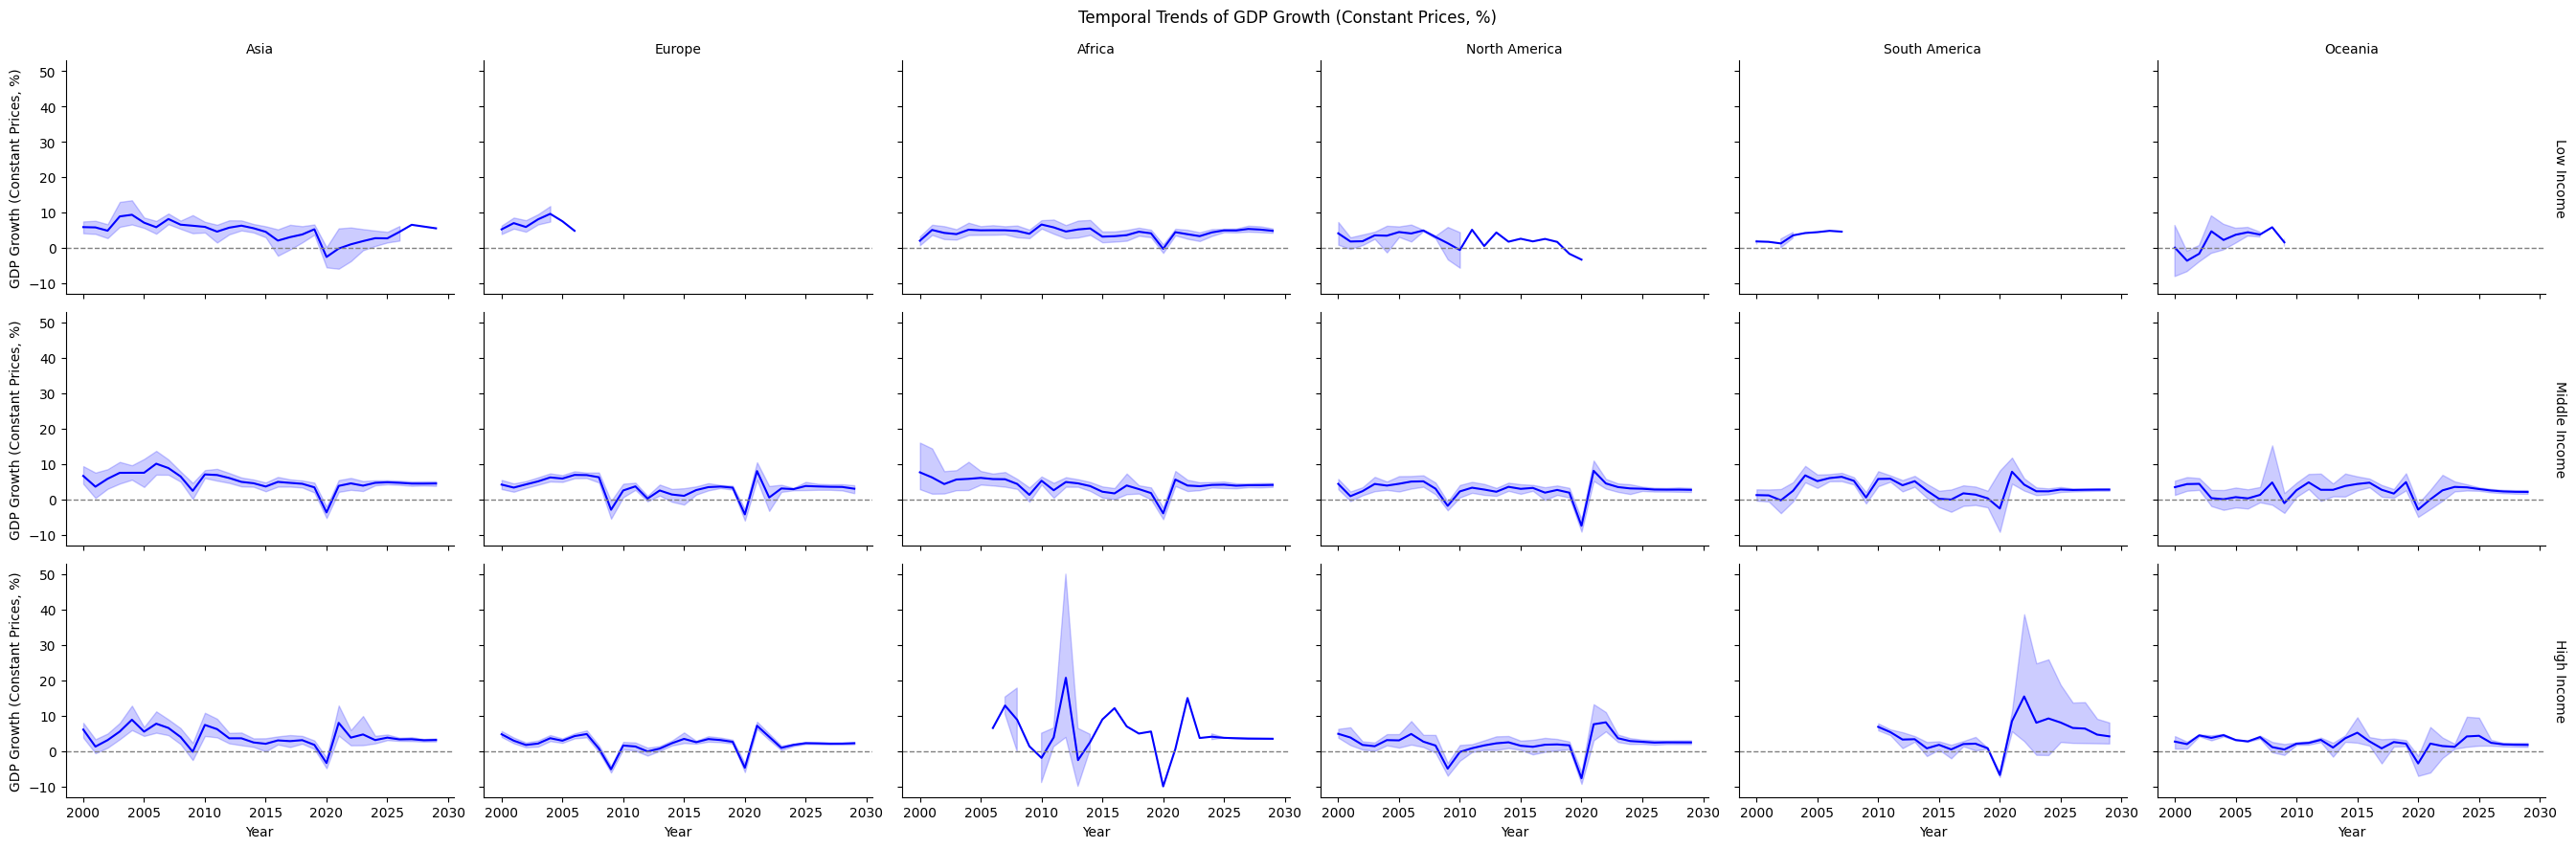

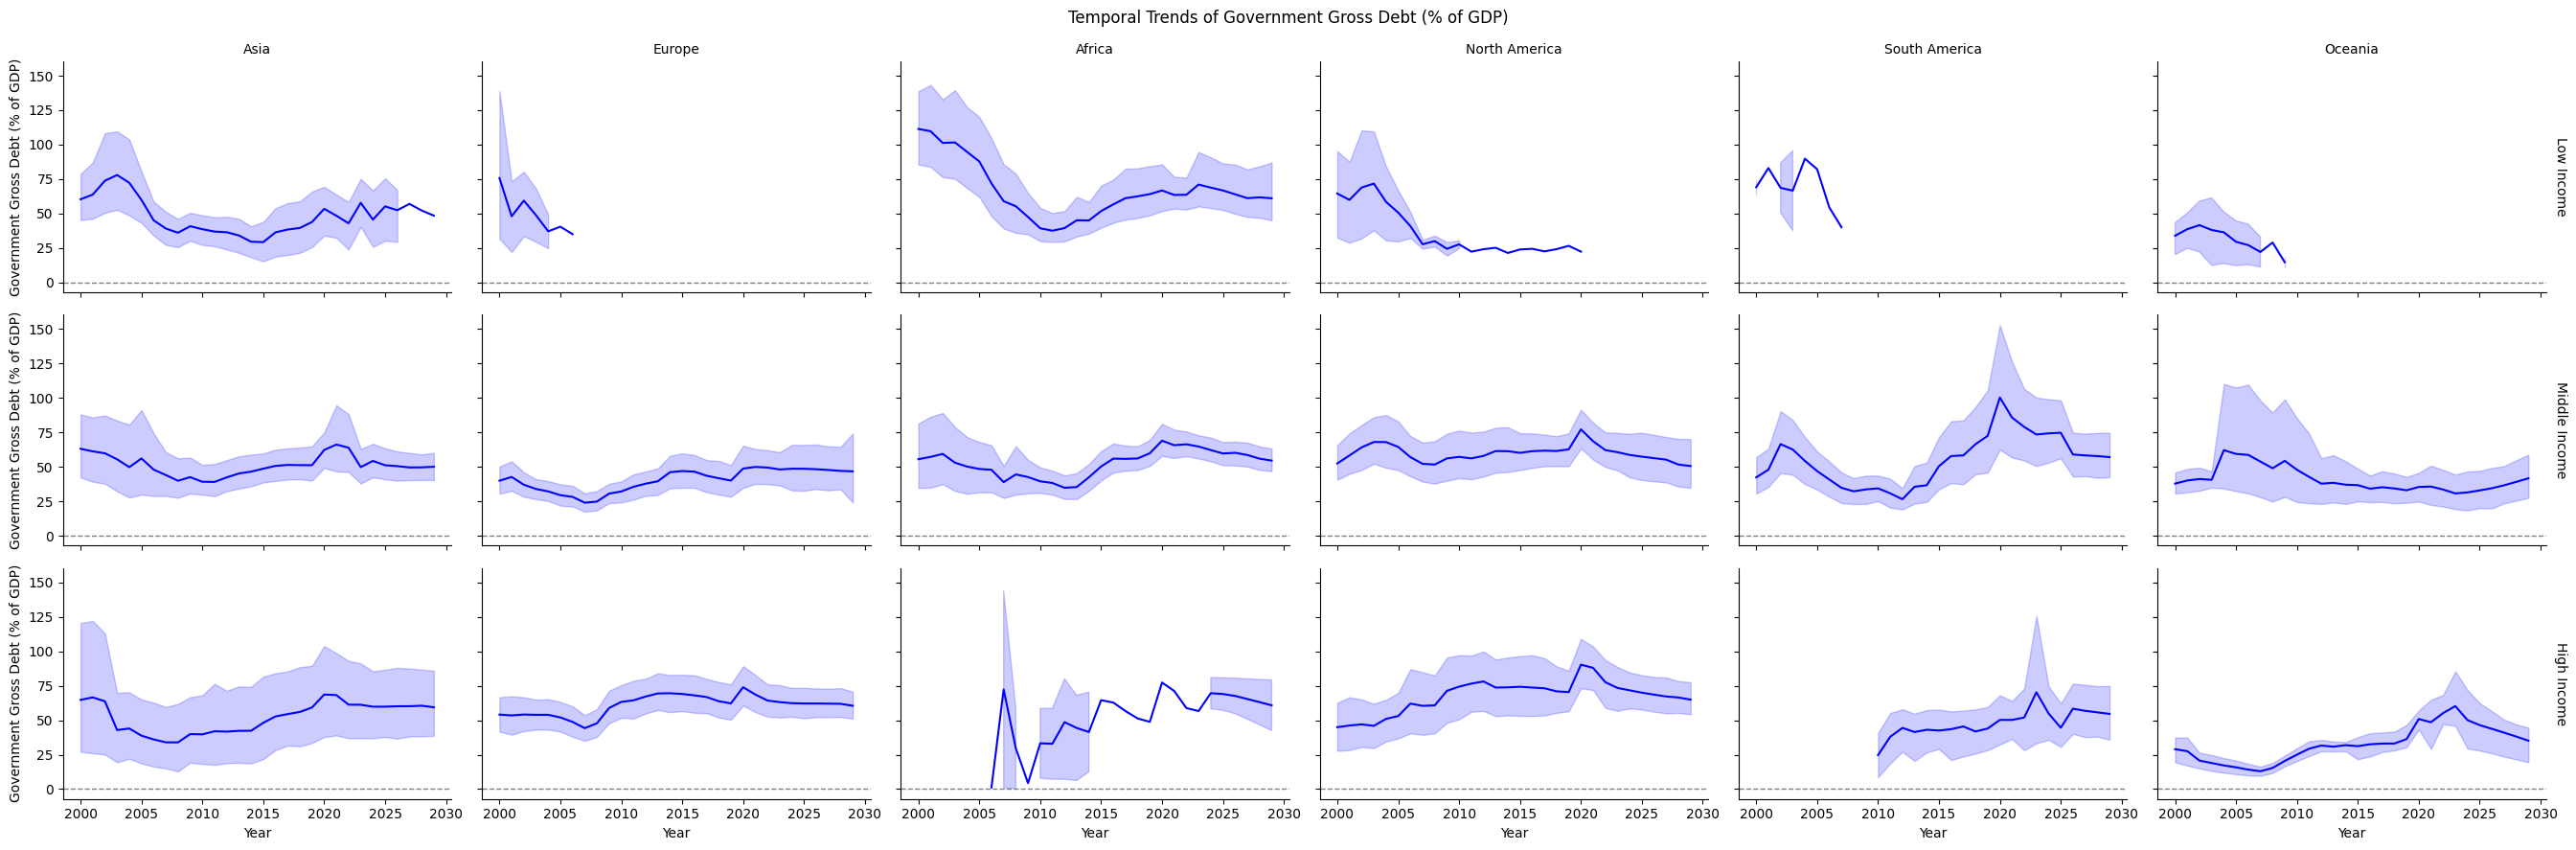

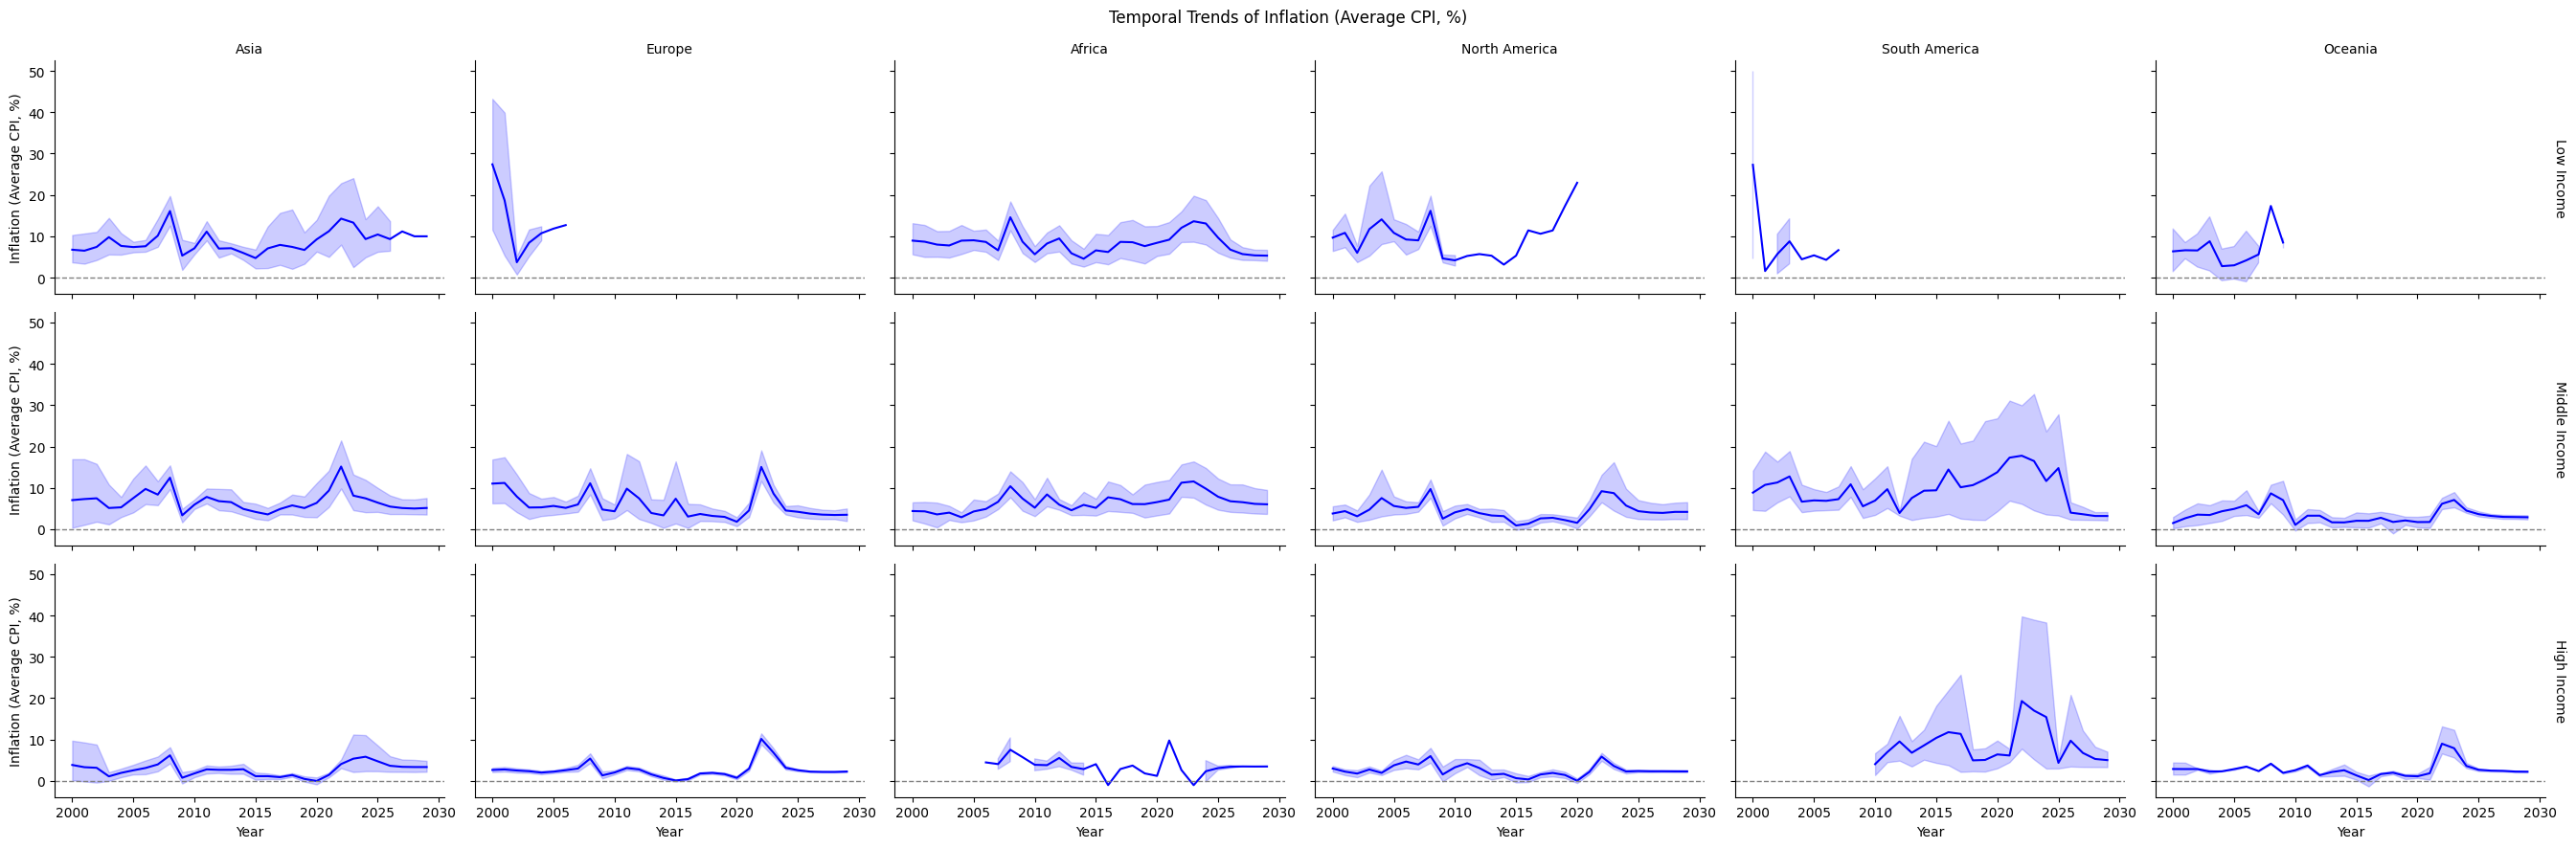

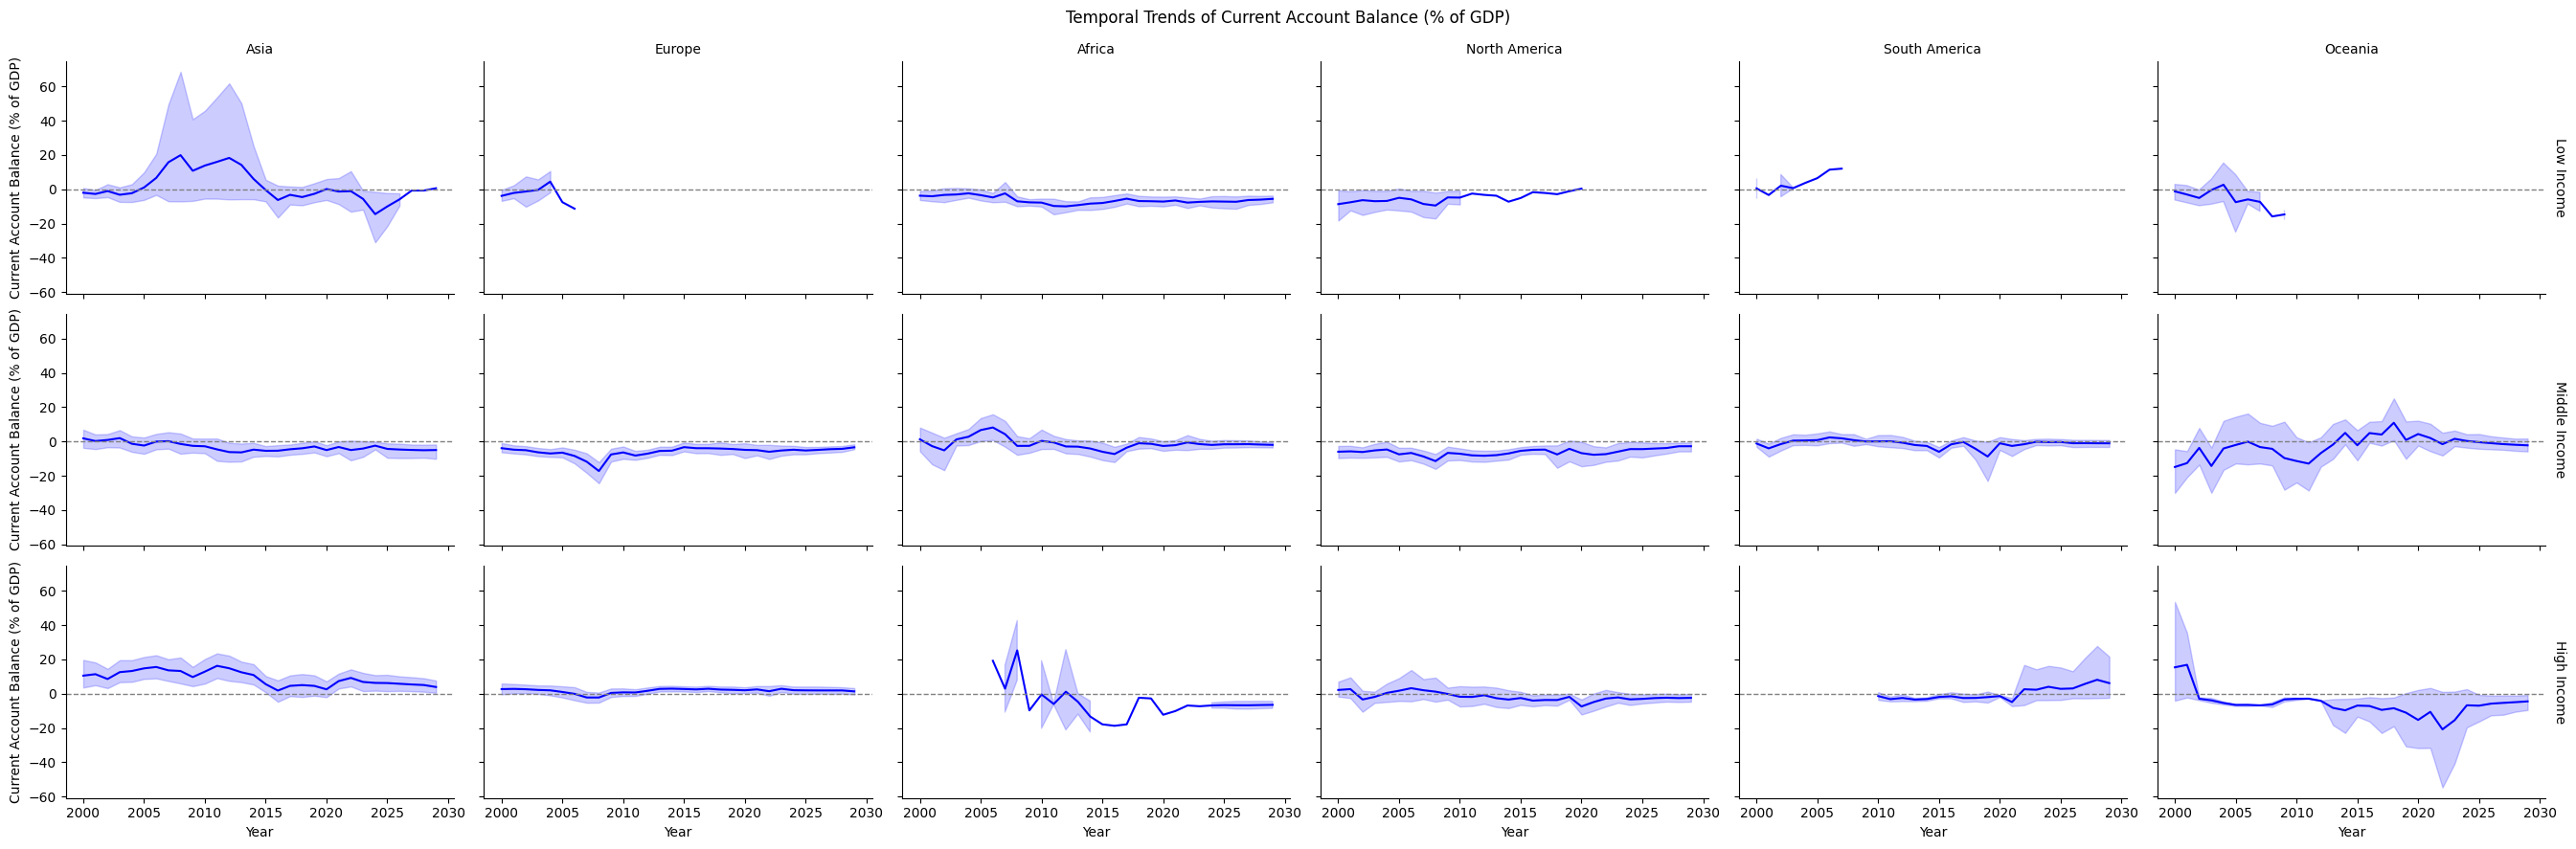

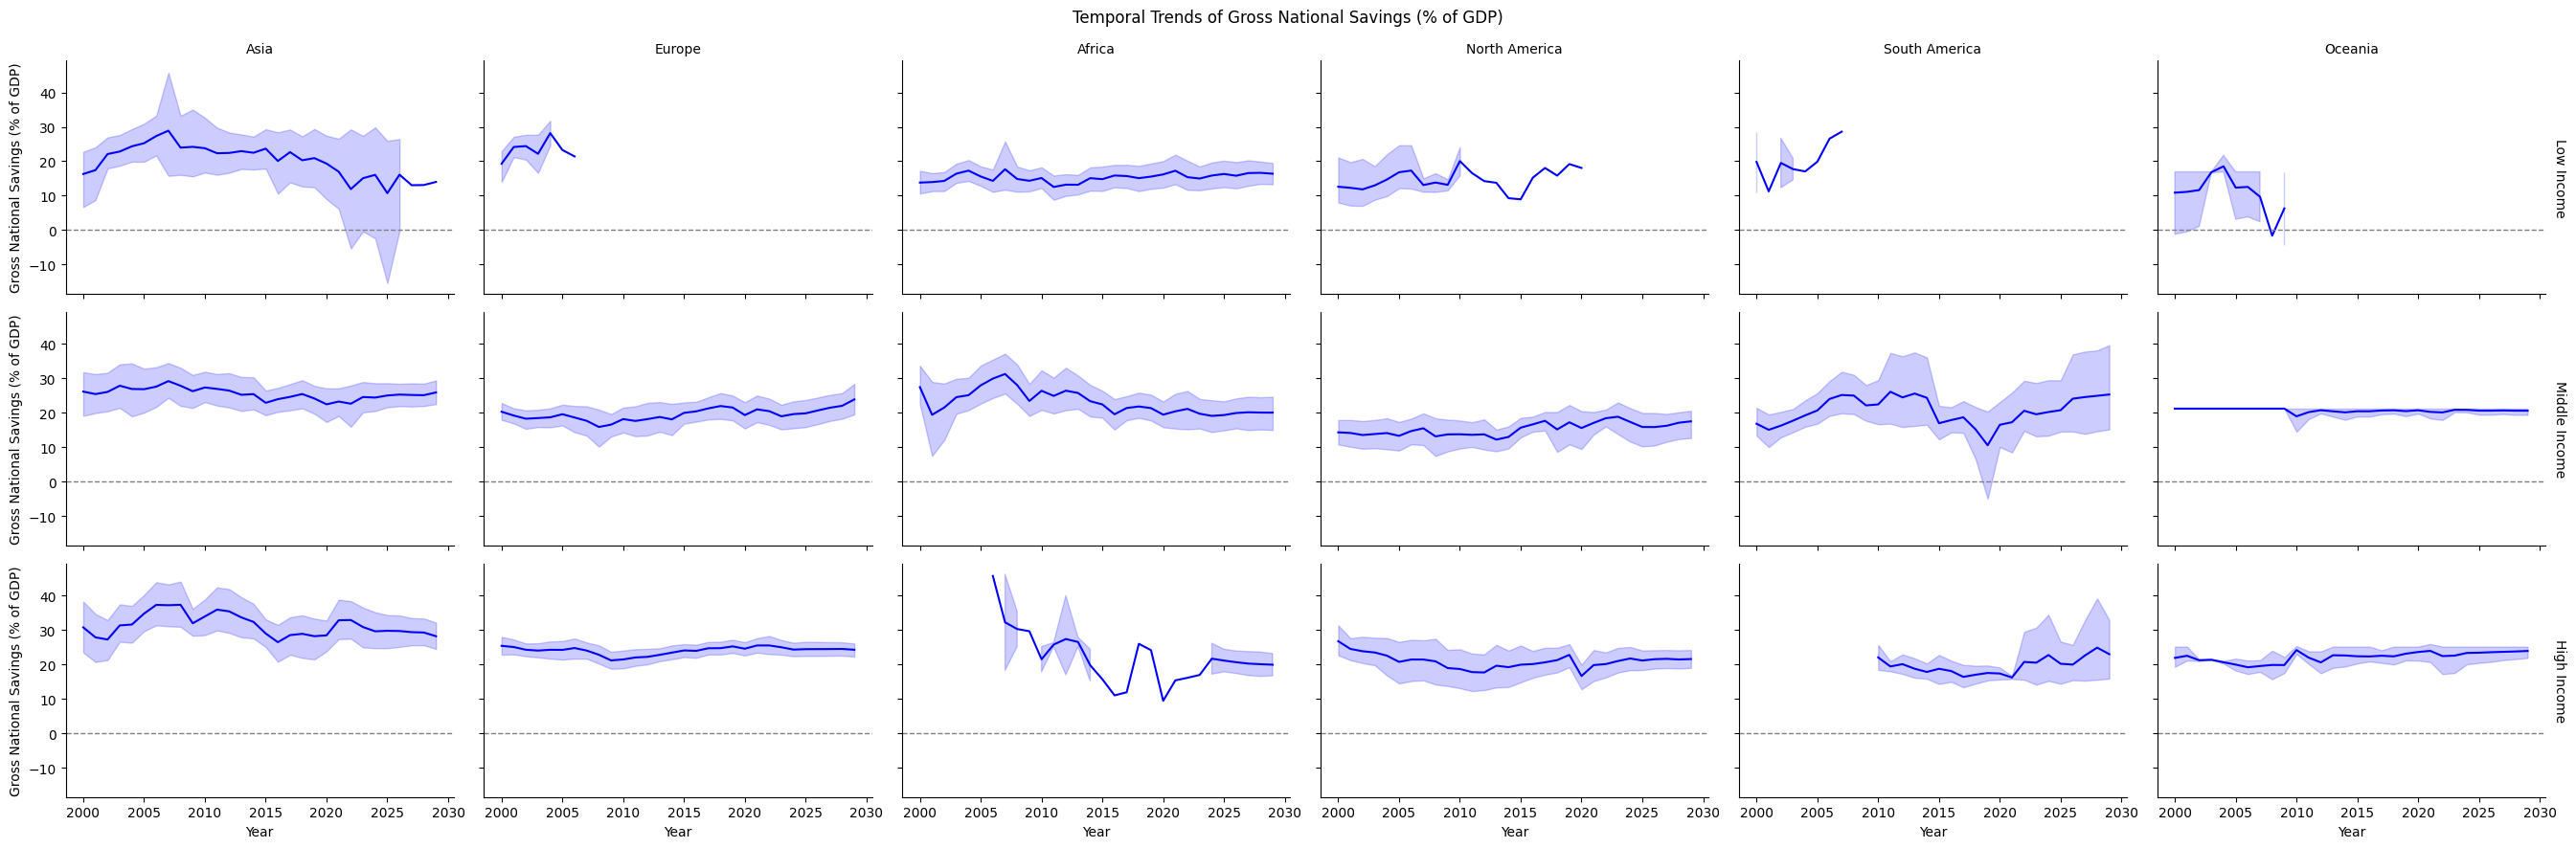

In [241]:
# Set up a grid for EWS indicators
ews_indicators = [
    "gdp_constant_prices_pct_change",
    "gov_gross_debt_gdp",
    "inflation_avg_cpi_pct_change",
    "current_account_balance_gdp",
    "gross_national_savings_gdp"
]

# Titles for EWS indicators
titles = {
    "gdp_constant_prices_pct_change": "GDP Growth (Constant Prices, %)",
    "gov_gross_debt_gdp": "Government Gross Debt (% of GDP)",
    "inflation_avg_cpi_pct_change": "Inflation (Average CPI, %)",
    "current_account_balance_gdp": "Current Account Balance (% of GDP)",
    "gross_national_savings_gdp": "Gross National Savings (% of GDP)"
}

for indicator in ews_indicators:
    g = sns.FacetGrid(
        cleaned_data,
        col="region",
        row="economic_group",
        margin_titles=True,
        height=3,
        aspect=1.5
    )
    g.map(sns.lineplot, "Year", indicator, color="blue")
    g.set_axis_labels("Year", titles.get(indicator, indicator.replace("_", " ").title()))
    g.set_titles(col_template="{col_name}", row_template="{row_name}")
    g.set(ylim=(None, None))  # Allow the y-axis to scale automatically with non-negative values
    # Add a horizontal line at y=0
    g.map(plt.axhline, y=0, color="gray", linestyle="--", linewidth=1)
    g.tight_layout()
    plt.subplots_adjust(top=0.92)  # Adjust top margin to fit suptitle
    g.fig.suptitle(f"Temporal Trends of {titles.get(indicator, indicator.replace('_', ' ').title())}")
    plt.show()


#### **Plot 1: Temporal Trends of GDP Growth (Constant Prices, %)**
This plot shows GDP growth trends across regions (Asia, Europe, Africa, North America, South America, and Oceania) and income groups (Low, Middle, and High Income) over time.
- **Key Observations**:
  - **Low-income countries**: High variability in GDP growth, reflecting economic instability and reliance on volatile external factors (e.g., commodity exports).
  - **Middle- and high-income countries**: More stable growth trajectories but notable dips during global recessions (e.g., 2008 and 2020).
  - **Regional trends**: Africa and South America experience higher fluctuations, potentially indicating exposure to external shocks.
- **Relevance to S&P EWS**:
  - Low and volatile GDP growth is a key risk indicator in the S&P framework, signaling weak economic fundamentals that exacerbate sovereign risk.
  - Declines during crises (e.g., 2020 pandemic) align with fiscal vulnerabilities as lower growth impacts revenue generation.

---

#### **Plot 2: Temporal Trends of Government Gross Debt (% of GDP)**
This plot depicts the trends in government gross debt across regions and income groups.
- **Key Observations**:
  - **Low-income countries**: Rapid debt accumulation, peaking in periods of global crisis, indicates higher fiscal stress.
  - **Middle- and high-income countries**: Gradual debt increases but more controlled levels compared to low-income economies.
  - Regional variations: Africa and South America show steeper debt increases, particularly post-2020.
- **Relevance to S&P EWS**:
  - High debt-to-GDP ratios, particularly in low-income countries, are a major factor in predicting sovereign defaults.
  - Regional debt accumulation reflects reliance on external borrowing, heightening vulnerability during economic downturns.

---

#### **Plot 3: Temporal Trends of Inflation (Average CPI, %)**
This plot presents inflation trends across regions and income groups over time.
- **Key Observations**:
  - **Low-income countries**: Persistent inflation volatility, reflecting weak monetary policy and external dependency.
  - Inflation spikes in Africa and South America during crises highlight structural weaknesses.
  - High-income countries show stable, controlled inflation trends.
- **Relevance to S&P EWS**:
  - Volatile inflation is a core metric in S&P’s EWS, signaling monetary instability and reduced fiscal flexibility.
  - Sustained inflation in low-income regions correlates with weaker institutional frameworks and fiscal policies.

---

#### **Plot 4: Temporal Trends of Current Account Balance (% of GDP)**
This plot tracks current account balance trends over time across regions and income groups.
- **Key Observations**:
  - Negative balances dominate in low-income countries, particularly in Africa and South America, reflecting heavy reliance on external financing.
  - High-income countries maintain more balanced or positive current accounts, indicating stronger trade positions and external resilience.
- **Relevance to S&P EWS**:
  - Persistent current account deficits signal external vulnerabilities and heightened sovereign risk.
  - Low-income countries with twin deficits (fiscal and current account) face compounded risks of default.

---

### Summary
The plots collectively reveal key early warning signals for sovereign risk:
1. **Low-income countries exhibit greater volatility** in GDP growth, inflation, debt accumulation, and current account balances, reflecting structural vulnerabilities.
2. **Regional disparities**: Africa and South America consistently show higher risks, aligning with their susceptibility to external shocks and weaker fiscal resilience.
3. **Alignment with S&P EWS**: These trends corroborate the critical risk indicators outlined in S&P’s framework, emphasizing the interplay of economic instability, fiscal imbalances, and external vulnerabilities.


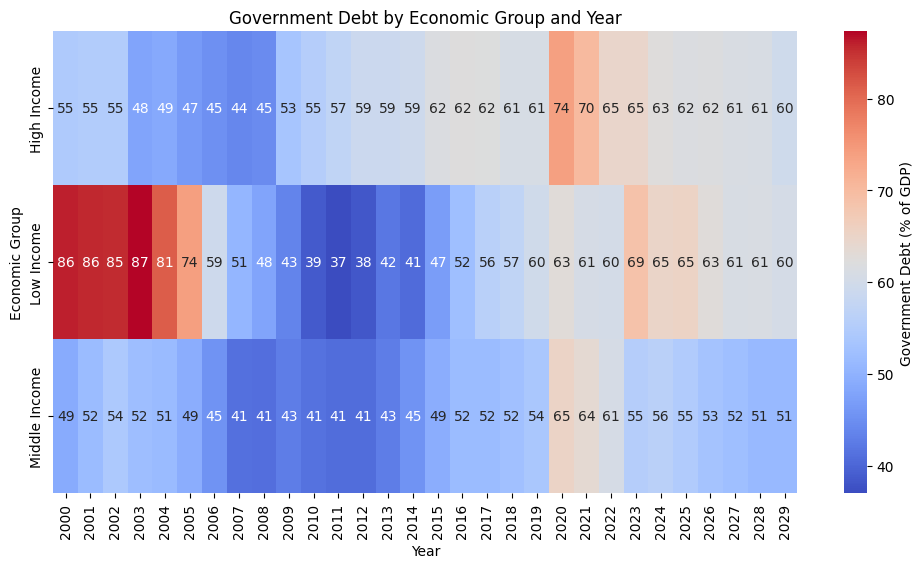

In [242]:
# Create pivot table for government debt heatmap
pivot_table = cleaned_data.pivot_table(
    index="economic_group",
    columns="Year",
    values="gov_gross_debt_gdp",
    aggfunc="mean"
)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    pivot_table, annot=True, fmt=".0f", cmap="coolwarm", cbar_kws={"label": "Government Debt (% of GDP)"}
)
plt.title("Government Debt by Economic Group and Year")
plt.xlabel("Year")
plt.ylabel("Economic Group")
plt.show()


### Plot: Government Debt by Economic Group and Year (Heatmap)

#### **Description**
This heatmap visualizes government debt as a percentage of GDP across income groups (Low, Middle, and High Income) and years (2000 to 2030). The color intensity represents the level of government debt, with red indicating higher debt ratios and blue indicating lower debt ratios.

#### **Key Observations**
1. **Low-Income Countries**:
   - **Pre-2009**: Debt-to-GDP ratios were significantly higher, peaking above 85%, reflecting structural fiscal challenges and high reliance on external debt.
   - **2009 Onwards**: Debt levels declined markedly, likely due to debt relief initiatives such as the HIPC Initiative and improved fiscal management. Post-2020, debt began increasing again, peaking during the COVID-19 pandemic at around 70%.

2. **Middle-Income Countries**:
   - Debt-to-GDP ratios remained relatively stable between 40% and 65%.
   - Increases were observed post-2020, highlighting fiscal stress from the pandemic.

3. **High-Income Countries**:
   - Debt ratios fluctuated within a narrower range (45% to 62%) and demonstrated more controlled increases during global crises (e.g., 2008 and 2020).

4. **Temporal Patterns**:
   - Sharp increases in debt are evident during global crises, such as the 2008 financial crisis and the 2020 COVID-19 pandemic.
   - Post-crisis recovery patterns vary by income group, with low-income countries showing slower recoveries due to constrained fiscal capacities.

#### **Relevance to S&P Early Warning Signals (EWS)**
- **Debt-to-GDP Ratios**:
  - High debt levels limit fiscal space and increase the likelihood of default, particularly for low-income countries with weaker revenue bases.
  - Post-2009 trends highlight the temporary benefits of debt relief programs, which were eventually offset by new debt accumulation during subsequent crises.

- **Crisis Vulnerabilities**:
  - Global crises exacerbate fiscal vulnerabilities, as seen in the sharp increases in debt across all income groups during 2008 and 2020.
  - Low-income countries face compounding challenges, including limited market access and high borrowing costs.

#### **Insights**
- The heatmap demonstrates how debt-to-GDP ratios for low-income countries evolved significantly post-2009 due to debt relief initiatives but remain a critical vulnerability during crises.
- S&P’s EWS highlights the importance of monitoring debt accumulation trends and fiscal resilience, particularly for countries with limited capacity to manage external shocks.


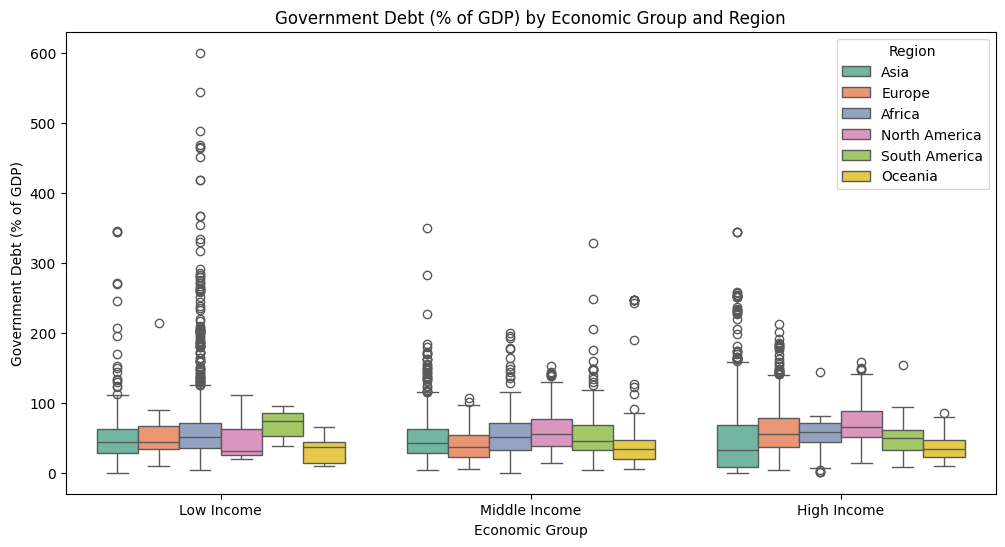

In [243]:
# Boxplot for government debt grouped by economic group and region
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=cleaned_data,
    x="economic_group",
    y="gov_gross_debt_gdp",
    hue="region",
    palette="Set2"
)
plt.title("Government Debt (% of GDP) by Economic Group and Region")
plt.ylabel("Government Debt (% of GDP)")
plt.xlabel("Economic Group")
plt.legend(title="Region", loc="upper right")
plt.show()


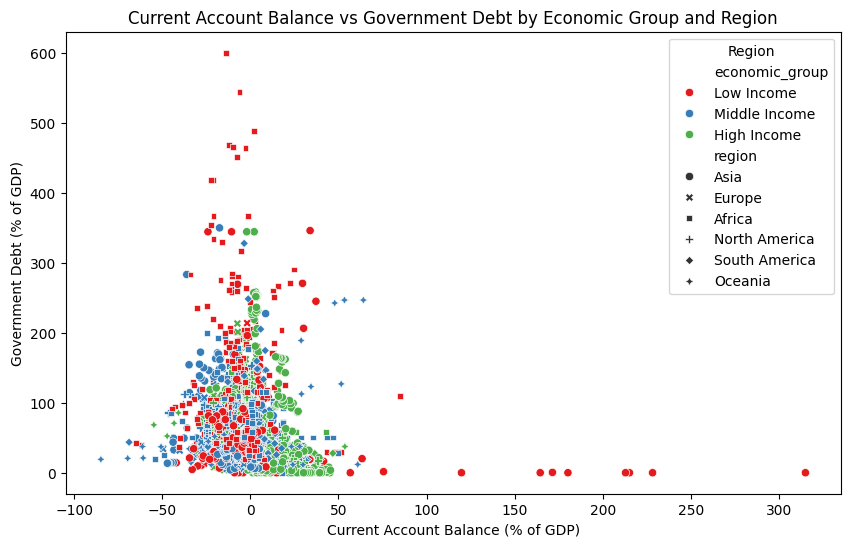

In [244]:
# Scatter plot to show relationship between current account balance and government debt
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=cleaned_data,
    x="current_account_balance_gdp",
    y="gov_gross_debt_gdp",
    hue="economic_group",
    style="region",
    palette="Set1"
)
plt.title("Current Account Balance vs Government Debt by Economic Group and Region")
plt.xlabel("Current Account Balance (% of GDP)")
plt.ylabel("Government Debt (% of GDP)")
plt.legend(title="Region", loc="upper right")
plt.show()


In [245]:
world_bank_data = pd.read_csv('/content/d7422167-9110-4618-ad08-92944c10708e_Data.csv')

In [246]:
world_bank_data.head(5)

Country Name Country Code Counterpart-Area Name Counterpart-Area Code  \
0  Afghanistan          AFG                 World                   WLD   
1  Afghanistan          AFG                 World                   WLD   
2  Afghanistan          AFG                 World                   WLD   
3  Afghanistan          AFG                 World                   WLD   
4  Afghanistan          AFG                 World                   WLD   

                                         Series Name        Series Code  \
0  Average grace period on new external debt comm...        DT.GPA.DPPG   
1  Average grant element on new external debt com...        DT.GRE.DPPG   
2  Average interest on new external debt commitme...        DT.INR.DPPG   
3  Average maturity on new external debt commitme...        DT.MAT.DPPG   
4                   CB, bilateral (AMT, current US$)  DT.AMT.BLAT.CB.CD   

  2031 [YR2031] 2030 [YR2030] 2029 [YR2029] 2028 [YR2028]  ... 2008 [YR2008]  \
0            ..            ..            ..            ..  ...        9.9575   
1            ..            ..            ..            ..  ...       58.0061   
2            ..            ..            ..            ..  ...        0.4823   
3            ..            ..            ..            ..  ...       34.6338   
4            ..            ..            ..            ..  ...            ..   

  2007 [YR2007] 2006 [YR2006] 2005 [YR2005] 2004 [YR2004] 2003 [YR2003]  \
0        8.0833         10.25            ..            ..            ..   
1       43.0248       50.6176            ..            ..            ..   
2        1.3852        1.2496            ..            ..            ..   
3       31.5833         39.75            ..            ..            ..   
4            ..            ..            ..            ..            ..   

  2002 [YR2002] 2001 [YR2001] 2000 [YR2000] exp  
0            ..            ..            ..  ..  
1            ..            ..            ..  ..  
2            ..            ..            ..  ..  
3            ..            ..            ..  ..  
4            ..            ..            ..  ..  

[5 rows x 39 columns]

In [247]:
world_bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74777 entries, 0 to 74776
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Country Name           74774 non-null  object
 1   Country Code           74772 non-null  object
 2   Counterpart-Area Name  74772 non-null  object
 3   Counterpart-Area Code  74772 non-null  object
 4   Series Name            74772 non-null  object
 5   Series Code            74772 non-null  object
 6   2031 [YR2031]          74772 non-null  object
 7   2030 [YR2030]          74772 non-null  object
 8   2029 [YR2029]          74772 non-null  object
 9   2028 [YR2028]          74772 non-null  object
 10  2027 [YR2027]          74772 non-null  object
 11  2026 [YR2026]          74772 non-null  object
 12  2025 [YR2025]          74772 non-null  object
 13  2024 [YR2024]          74772 non-null  object
 14  2023 [YR2023]          74772 non-null  object
 15  2022 [YR2022]      

In [248]:
world_bank_data['Series Name'].unique()

array(['Average grace period on new external debt commitments (years)',
       'Average grant element on new external debt commitments (%)',
       'Average interest on new external debt commitments (%)',
       'Average maturity on new external debt commitments (years)',
       'CB, bilateral (AMT, current US$)',
       'CB, bilateral (DIS, current US$)',
       'CB, bilateral (DOD, current US$)',
       'CB, bilateral (INT, current US$)',
       'CB, bilateral (NFL, current US$)',
       'CB, bilateral (NTR, current US$)',
       'CB, bilateral (TDS, current US$)',
       'CB, bilateral concessional (AMT, current US$)',
       'CB, bilateral concessional (DIS, current US$)',
       'CB, bilateral concessional (DOD, current US$)',
       'CB, bilateral concessional (INT, current US$)',
       'CB, bilateral concessional (NFL, current US$)',
       'CB, bilateral concessional (NTR, current US$)',
       'CB, bilateral concessional (TDS, current US$)',
       'CB, bonds (AMT, current US

In [249]:
# Step 1: Drop unnecessary columns
columns_to_drop = ['Country Code', 'Counterpart-Area Name', 'Counterpart-Area Code', 'Series Code', 'exp']
world_bank_data = world_bank_data.drop(columns=columns_to_drop)

# Step 2: Melt the dataset
# This converts year columns into a single column called 'Year'
year_columns = [col for col in world_bank_data.columns if '[YR' in col]  # Identify year columns
WB_melted_data = world_bank_data.melt(
    id_vars=['Country Name', 'Series Name'],  # Keep these columns fixed
    value_vars=year_columns,                 # Melt year columns
    var_name='Year',                         # New column name for years
    value_name='Value'                       # New column name for values
)

# Step 3: Clean up the 'Year' column
# Extract the year as an integer
WB_melted_data['Year'] = WB_melted_data['Year'].str.extract(r'\[YR(\d+)\]').astype(int)

# Step 4: Pivot the dataset
# Transform 'Series Name' into columns (features)
WB_pivoted_data = WB_melted_data.pivot_table(
    index=['Country Name', 'Year'],  # Set 'Country Name' and 'Year' as the index
    columns='Series Name',          # Turn 'Series Name' into feature columns
    values='Value',                 # Populate cells with values
    aggfunc='first'                 # Use the first non-null value (handles duplicates)
).reset_index()  # Reset index for a flat table

# Step 5: Save the cleaned dataset
WB_pivoted_data.to_csv('pivoted_world_bank_data.csv', index=False)

# Display the first few rows of the pivoted dataset
WB_pivoted_data.head()


Series Name Country Name  Year  \
0            Afghanistan  2000   
1            Afghanistan  2001   
2            Afghanistan  2002   
3            Afghanistan  2003   
4            Afghanistan  2004   

Series Name Average grace period on new external debt commitments (years)  \
0                                                           ..              
1                                                           ..              
2                                                           ..              
3                                                           ..              
4                                                           ..              

Series Name Average grant element on new external debt commitments (%)  \
0                                                           ..           
1                                                           ..           
2                                                           ..           
3                                                           ..           
4                                                           ..           

Series Name Average interest on new external debt commitments (%)  \
0                                                           ..      
1                                                           ..      
2                                                           ..      
3                                                           ..      
4                                                           ..      

Series Name Average maturity on new external debt commitments (years)  \
0                                                           ..          
1                                                           ..          
2                                                           ..          
3                                                           ..          
4                                                           ..          

Series Name CB, bilateral (AMT, current US$) CB, bilateral (DIS, current US$)  \
0                                         ..                               ..   
1                                         ..                               ..   
2                                         ..                               ..   
3                                         ..                               ..   
4                                         ..                               ..   

Series Name CB, bilateral (DOD, current US$) CB, bilateral (INT, current US$)  \
0                                         ..                               ..   
1                                         ..                               ..   
2                                         ..                               ..   
3                                         ..                               ..   
4                                         ..                               ..   

Series Name  ... Principal rescheduled (current US$)  \
0            ...                                  ..   
1            ...                                  ..   
2            ...                                  ..   
3            ...                                  ..   
4            ...                                  ..   

Series Name Principal rescheduled, official (current US$)  \
0                                                      ..   
1                                                      ..   
2                                                      ..   
3                                                      ..   
4                                                      ..   

Series Name Principal rescheduled, private (current US$)  \
0                                                     ..   
1                                                     ..   
2                                                     ..   
3                                                     ..   
4                                                     .

In [250]:
WB_pivoted_data.columns.to_list()

['Country Name',
 'Year',
 'Average grace period on new external debt commitments (years)',
 'Average grant element on new external debt commitments (%)',
 'Average interest on new external debt commitments (%)',
 'Average maturity on new external debt commitments (years)',
 'CB, bilateral (AMT, current US$)',
 'CB, bilateral (DIS, current US$)',
 'CB, bilateral (DOD, current US$)',
 'CB, bilateral (INT, current US$)',
 'CB, bilateral (NFL, current US$)',
 'CB, bilateral (NTR, current US$)',
 'CB, bilateral (TDS, current US$)',
 'CB, bilateral concessional (AMT, current US$)',
 'CB, bilateral concessional (DIS, current US$)',
 'CB, bilateral concessional (DOD, current US$)',
 'CB, bilateral concessional (INT, current US$)',
 'CB, bilateral concessional (NFL, current US$)',
 'CB, bilateral concessional (NTR, current US$)',
 'CB, bilateral concessional (TDS, current US$)',
 'CB, bonds (AMT, current US$)',
 'CB, bonds (DIS, current US$)',
 'CB, bonds (DOD, current US$)',
 'CB, bonds (INT,

In [251]:
# Load dataset
data = pd.read_csv('pivoted_world_bank_data.csv', low_memory=False)

# Step 1: Simplify Column Names
# Replace parentheses with underscores for readability
data.columns = data.columns.str.replace(r'\s\(([^)]*)\)', r'_\1', regex=True)

# Step 2: Define Creditor Groups
creditor_groups = {
    'Bilateral Debt': [col for col in data.columns if 'bilateral' in col],
    'Multilateral Debt': [col for col in data.columns if 'multilateral' in col],
    'Official Creditors': [col for col in data.columns if 'official creditors' in col],
    'Private Creditors': [col for col in data.columns if 'private creditors' in col]
}

# Step 3: Aggregate Creditor Types by Transaction Types
for creditor, columns in creditor_groups.items():
    for transaction_type in ['AMT', 'DIS', 'DOD', 'INT', 'NFL', 'NTR', 'TDS']:
        matching_columns = [col for col in columns if f'_{transaction_type}' in col]
        if matching_columns:
            # Aggregate and create new columns
            # Convert columns to numeric before summing to avoid TypeError
            data[matching_columns] = data[matching_columns].apply(pd.to_numeric, errors='coerce')
            data[f'{creditor}_{transaction_type}'] = data[matching_columns].sum(axis=1)

# Drop original columns used for aggregation
columns_to_drop = sum(creditor_groups.values(), [])  # Flatten the list
data = data.drop(columns=columns_to_drop, errors='ignore')

# Step 4: Retain Key Metrics
key_metrics = [
    'Country Name', 'Year',
    'Average grace period on new external debt commitments_years',
    'Average grant element on new external debt commitments_%',
    'Average interest on new external debt commitments_%',
    'Average maturity on new external debt commitments_years',
    'Concessional debt_% of total external debt',
    'Currency composition of PPG debt, U.S. dollars_%',
    'External debt stocks, total_DOD, current US$',
    'Total reserves_includes gold, current US$',
    'Total reserves_% of total external debt',
    'Total reserves in months of imports'
]

aggregated_columns = [
    col for col in data.columns if any(
        group in col for group in [
            'Bilateral Debt', 'Multilateral Debt', 'Official Creditors', 'Private Creditors'
        ]
    )
]

# Step 3: Select Relevant Columns
final_columns = key_metrics + aggregated_columns

# Ensure all selected columns exist in the dataset
refined_data = data[[col for col in final_columns if col in data.columns]]

# Step 4: Save the Refined Dataset
refined_data.to_csv('final_reduced_world_bank_data.csv', index=False)

# Display Summary of the Refined Dataset
print(f"Final dataset has {refined_data.shape[1]} columns and {refined_data.shape[0]} rows.")
refined_data.head()

<ipython-input-251-da10563ba7de>:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'{creditor}_{transaction_type}'] = data[matching_columns].sum(axis=1)
<ipython-input-251-da10563ba7de>:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'{creditor}_{transaction_type}'] = data[matching_columns].sum(axis=1)
<ipython-input-251-da10563ba7de>:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at 

Final dataset has 40 columns and 4288 rows.


Country Name  Year  \
0  Afghanistan  2000   
1  Afghanistan  2001   
2  Afghanistan  2002   
3  Afghanistan  2003   
4  Afghanistan  2004   

  Average grace period on new external debt commitments_years  \
0                                                 ..            
1                                                 ..            
2                                                 ..            
3                                                 ..            
4                                                 ..            

  Average grant element on new external debt commitments_%  \
0                                                 ..         
1                                                 ..         
2                                                 ..         
3                                                 ..         
4                                                 ..         

  Average interest on new external debt commitments_%  \
0                                                 ..    
1                                                 ..    
2                                                 ..    
3                                                 ..    
4                                                 ..    

  Average maturity on new external debt commitments_years  \
0                                                 ..        
1                                                 ..        
2                                                 ..        
3                                                 ..        
4                                                 ..        

  Concessional debt_% of total external debt  \
0                                         ..   
1                                         ..   
2                                         ..   
3                                         ..   
4                                         ..   

  Currency composition of PPG debt, U.S. dollars_%  \
0                                               ..   
1                                               ..   
2                                               ..   
3                                               ..   
4                                               ..   

  External debt stocks, total_DOD, current US$  \
0                                           ..   
1                                           ..   
2                                           ..   
3                                           ..   
4                                           ..   

  Total reserves_includes gold, current US$  ... Official Creditors_NFL  \
0                                        ..  ...                    0.0   
1                                        ..  ...                    0.0   
2                                        ..  ...                    0.0   
3                                        ..  ...                    0.0   
4                                        ..  ...                    0.0   

  Official Creditors_NTR  Official Creditors_TDS  Private Creditors_AMT  \
0                    0.0                     0.0                    0.0   
1                    0.0                     0.0                    0.0   
2                    0.0                     0.0                    0.0   
3                    0.0                     0.0                    0.0   
4                    0.0                     0.0                    0.0   

   Private Creditors_DIS  Private Creditors_DOD  Private Creditors_INT  \
0                    0.0                    0.0                    0.0   
1                    0.0                    0.0                    0.0   
2                    0.0                    0.0                    0.0   
3                    0.0                    0.0                    0.0   
4                    0.0                    0.0                    0.0   

   Private Creditors_NFL  Private Creditors_NTR  Private Creditors_TDS  
0                    0.0                    0.0 

In [252]:
for col in refined_data.columns:
  if col not in ['Year', 'Country Name']:
    refined_data[col] = pd.to_numeric(refined_data[col], errors='coerce')
refined_data.head()

<ipython-input-252-6b81eccea5e7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  refined_data[col] = pd.to_numeric(refined_data[col], errors='coerce')


Country Name  Year  \
0  Afghanistan  2000   
1  Afghanistan  2001   
2  Afghanistan  2002   
3  Afghanistan  2003   
4  Afghanistan  2004   

   Average grace period on new external debt commitments_years  \
0                                                NaN             
1                                                NaN             
2                                                NaN             
3                                                NaN             
4                                                NaN             

   Average grant element on new external debt commitments_%  \
0                                                NaN          
1                                                NaN          
2                                                NaN          
3                                                NaN          
4                                                NaN          

   Average interest on new external debt commitments_%  \
0                                                NaN     
1                                                NaN     
2                                                NaN     
3                                                NaN     
4                                                NaN     

   Average maturity on new external debt commitments_years  \
0                                                NaN         
1                                                NaN         
2                                                NaN         
3                                                NaN         
4                                                NaN         

   Concessional debt_% of total external debt  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4                                         NaN   

   Currency composition of PPG debt, U.S. dollars_%  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   

   External debt stocks, total_DOD, current US$  \
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                                           NaN   
4                                           NaN   

   Total reserves_includes gold, current US$  ...  Official Creditors_NFL  \
0                                        NaN  ...                     0.0   
1                                        NaN  ...                     0.0   
2                                        NaN  ...                     0.0   
3                                        NaN  ...                     0.0   
4                                        NaN  ...                     0.0   

   Official Creditors_NTR  Official Creditors_TDS  Private Creditors_AMT  \
0                     0.0                     0.0                    0.0   
1                     0.0                     0.0                    0.0   
2                     0.0                     0.0                    0.0   
3                     0.0                     0.0                    0.0   
4                     0.0                     0.0                    0.0   

   Private Creditors_DIS  Private Creditors_DOD  Private Creditors_INT  \
0                    0.0                    0.0                    0.0   
1                    0.0                    0.0                    0.0   
2                    0.0                    0.0                    0.0   
3                    0.0                    0.0                    0.0   
4                    0.0                    0.0                    0.0   

   Private Creditors_NFL  Private Creditors_NTR  Private Cred

In [253]:
refined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4288 entries, 0 to 4287
Data columns (total 40 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Country Name                                                 4288 non-null   object 
 1   Year                                                         4288 non-null   int64  
 2   Average grace period on new external debt commitments_years  3166 non-null   float64
 3   Average grant element on new external debt commitments_%     3166 non-null   float64
 4   Average interest on new external debt commitments_%          3166 non-null   float64
 5   Average maturity on new external debt commitments_years      3166 non-null   float64
 6   Concessional debt_% of total external debt                   3166 non-null   float64
 7   Currency composition of PPG debt, U.S. dollars_%             3166 non-null   f

In [254]:
columns_to_drop = ['Bilateral Debt_AMT','Bilateral Debt_DIS','Bilateral Debt_DOD',
  'Bilateral Debt_INT',
  'Bilateral Debt_NFL',
  'Bilateral Debt_NTR',
  'Bilateral Debt_TDS',
  'Multilateral Debt_AMT',
  'Multilateral Debt_DIS',
  'Multilateral Debt_DOD',
  'Multilateral Debt_INT',
  'Multilateral Debt_NFL',
  'Multilateral Debt_NTR',
  'Multilateral Debt_TDS',
  'Official Creditors_AMT',
  'Official Creditors_DIS',
  'Official Creditors_DOD',
  'Official Creditors_INT',
  'Official Creditors_NFL',
  'Official Creditors_NTR',
  'Official Creditors_TDS',
  'Private Creditors_AMT',
  'Private Creditors_DIS',
  'Private Creditors_DOD',
  'Private Creditors_INT',
  'Private Creditors_NFL',
  'Private Creditors_NTR',
  'Private Creditors_TDS']

cleaned_WB_data = refined_data.drop(columns=columns_to_drop)

In [255]:
cleaned_WB_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4288 entries, 0 to 4287
Data columns (total 12 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Country Name                                                 4288 non-null   object 
 1   Year                                                         4288 non-null   int64  
 2   Average grace period on new external debt commitments_years  3166 non-null   float64
 3   Average grant element on new external debt commitments_%     3166 non-null   float64
 4   Average interest on new external debt commitments_%          3166 non-null   float64
 5   Average maturity on new external debt commitments_years      3166 non-null   float64
 6   Concessional debt_% of total external debt                   3166 non-null   float64
 7   Currency composition of PPG debt, U.S. dollars_%             3166 non-null   f

In [256]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Country                                5791 non-null   object 
 1   Year                                   5791 non-null   int64  
 2   current_account_balance_gdp            5791 non-null   float64
 3   current_account_balance_usd            5791 non-null   float64
 4   gov_gross_debt_gdp                     5791 non-null   float64
 5   gov_net_lending_borrowing_gdp          5791 non-null   float64
 6   gov_primary_net_lending_borrowing_gdp  5791 non-null   float64
 7   gov_revenue_gdp                        5791 non-null   float64
 8   gov_total_expenditure_gdp              5791 non-null   float64
 9   gdp_ppp_share_world                    5791 non-null   float64
 10  gdp_constant_prices_pct_change         5791 non-null   float64
 11  gdp_

In [257]:
!pip install fuzzywuzzy

In [258]:
from fuzzywuzzy import process

# Step 1: Extract unique country names
wb_countries = cleaned_WB_data['Country Name'].unique()
data_countries = cleaned_data['Country'].unique()

# Step 2: Perform Fuzzy Matching
# Create a mapping of best matches for Country Name in cleaned_WB_data
country_mapping = {}
for country in data_countries:
    match, score = process.extractOne(country, wb_countries)  # Find the closest match
    if score > 70:  # Threshold for a good match
        country_mapping[country] = match
    else:
        country_mapping[country] = None  # No reliable match found

# Step 3: Map matched countries to cleaned_data
cleaned_data['Mapped Country Name'] = cleaned_data['Country'].map(country_mapping)

# Step 4: Merge datasets using the mapped country names
cleaned_WB_data.rename(columns={'Country Name': 'Mapped Country Name'}, inplace=True)
merged_WB_data = pd.merge(
    cleaned_WB_data,
    cleaned_data,
    on=['Mapped Country Name', 'Year'], how='left'
)

# Step 5: Handle Missing Matches
# For unmatched rows, you can decide to drop them or inspect them manually
print("Unmatched Countries in cleaned_data:")
print(cleaned_data[cleaned_data['Mapped Country Name'].isnull()]['Country'].unique())

# Step 6: Save the resulting dataset
merged_WB_data.to_csv('merged_cleaned_WB_data.csv', index=False)

# Display Summary
print(merged_WB_data.info())
merged_WB_data.head()


Unmatched Countries in cleaned_data:
['Andorra' 'Aruba' 'Australia' 'Austria' 'Bahrain' 'Barbados' 'Belgium'
 'Brunei Darussalam' 'Bulgaria' 'Canada' 'Chile' 'Croatia' 'Cyprus'
 'Denmark' 'Estonia' 'Finland' 'France' 'Germany' 'Greece' 'Hong Kong SAR'
 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy' 'Japan' 'Kiribati' 'Korea'
 'Kuwait' 'Latvia' 'Libya' 'Lithuania' 'Luxembourg' 'Macao SAR'
 'Marshall Islands' 'Nauru' 'Netherlands' 'New Zealand' 'Norway' 'Oman'
 'Palau' 'Panama' 'Poland' 'Portugal' 'Puerto Rico' 'Qatar' 'Russia'
 'San Marino' 'Saudi Arabia' 'Seychelles' 'Singapore' 'Slovenia' 'Spain'
 'Sweden' 'Switzerland' 'Tuvalu' 'United Arab Emirates' 'United Kingdom'
 'United States' 'Uruguay' 'Venezuela']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4751 entries, 0 to 4750
Data columns (total 40 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  ---

Mapped Country Name  Year  \
0         Afghanistan  2000   
1         Afghanistan  2001   
2         Afghanistan  2002   
3         Afghanistan  2003   
4         Afghanistan  2004   

   Average grace period on new external debt commitments_years  \
0                                                NaN             
1                                                NaN             
2                                                NaN             
3                                                NaN             
4                                                NaN             

   Average grant element on new external debt commitments_%  \
0                                                NaN          
1                                                NaN          
2                                                NaN          
3                                                NaN          
4                                                NaN          

   Average interest on new external debt commitments_%  \
0                                                NaN     
1                                                NaN     
2                                                NaN     
3                                                NaN     
4                                                NaN     

   Average maturity on new external debt commitments_years  \
0                                                NaN         
1                                                NaN         
2                                                NaN         
3                                                NaN         
4                                                NaN         

   Concessional debt_% of total external debt  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4                                         NaN   

   Currency composition of PPG debt, U.S. dollars_%  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   

   External debt stocks, total_DOD, current US$  \
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                                           NaN   
4                                           NaN   

   Total reserves_includes gold, current US$  ...  \
0                                        NaN  ...   
1                                        NaN  ...   
2                                        NaN  ...   
3                                        NaN  ...   
4                                        NaN  ...   

   inflation_end_cpi_pct_change  population_millions total_investment_gdp  \
0                           NaN                  NaN                  NaN   
1                           NaN                  NaN                  NaN   
2                         6.530               18.707               27.243   
3                         6.530               19.477               30.102   
4                        13.266               20.237               35.354   

   imports_goods_pct_change  exports_goods_pct_change  \
0                       NaN                       NaN   
1                       NaN                       NaN   
2                    34.048                    87.518   
3                    34.048                    87.518   
4                    -2.825                   -29.694   

   exports_goods_services_pct_change  imports_goods_services_pct_change  \
0                                NaN                                NaN   
1                                NaN                                NaN   
2                             49.5

In [259]:
unmatched_countries = cleaned_data[cleaned_data['Mapped Country Name'].isnull()]['Country'].unique()
unmatched_countries

array(['Andorra', 'Aruba', 'Australia', 'Austria', 'Bahrain', 'Barbados',
       'Belgium', 'Brunei Darussalam', 'Bulgaria', 'Canada', 'Chile',
       'Croatia', 'Cyprus', 'Denmark', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'Hong Kong SAR', 'Hungary', 'Iceland',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Kiribati', 'Korea',
       'Kuwait', 'Latvia', 'Libya', 'Lithuania', 'Luxembourg',
       'Macao SAR', 'Marshall Islands', 'Nauru', 'Netherlands',
       'New Zealand', 'Norway', 'Oman', 'Palau', 'Panama', 'Poland',
       'Portugal', 'Puerto Rico', 'Qatar', 'Russia', 'San Marino',
       'Saudi Arabia', 'Seychelles', 'Singapore', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'Tuvalu', 'United Arab Emirates',
       'United Kingdom', 'United States', 'Uruguay', 'Venezuela'],
      dtype=object)

In [260]:
excluded_countries = cleaned_data[cleaned_data['Mapped Country Name'].isnull()]['Country'].unique()
pd.DataFrame(excluded_countries, columns=['Excluded Country']).to_csv('excluded_countries.csv', index=False)

In [261]:
cleaned_merged_WB_data = cleaned_data[~cleaned_data['Mapped Country Name'].isnull()]


In [262]:
cleaned_merged_WB_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3970 entries, 0 to 5790
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Country                                3970 non-null   object 
 1   Year                                   3970 non-null   int64  
 2   current_account_balance_gdp            3970 non-null   float64
 3   current_account_balance_usd            3970 non-null   float64
 4   gov_gross_debt_gdp                     3970 non-null   float64
 5   gov_net_lending_borrowing_gdp          3970 non-null   float64
 6   gov_primary_net_lending_borrowing_gdp  3970 non-null   float64
 7   gov_revenue_gdp                        3970 non-null   float64
 8   gov_total_expenditure_gdp              3970 non-null   float64
 9   gdp_ppp_share_world                    3970 non-null   float64
 10  gdp_constant_prices_pct_change         3970 non-null   float64
 11  gdp_curre

In [263]:
cleaned_merged_WB_data.to_csv('cleaned_merged_WB_data.csv', index=False)

In [264]:
cleaned_merged_WB_data = cleaned_merged_WB_data.dropna()

In [265]:
cleaned_merged_WB_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3970 entries, 0 to 5790
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Country                                3970 non-null   object 
 1   Year                                   3970 non-null   int64  
 2   current_account_balance_gdp            3970 non-null   float64
 3   current_account_balance_usd            3970 non-null   float64
 4   gov_gross_debt_gdp                     3970 non-null   float64
 5   gov_net_lending_borrowing_gdp          3970 non-null   float64
 6   gov_primary_net_lending_borrowing_gdp  3970 non-null   float64
 7   gov_revenue_gdp                        3970 non-null   float64
 8   gov_total_expenditure_gdp              3970 non-null   float64
 9   gdp_ppp_share_world                    3970 non-null   float64
 10  gdp_constant_prices_pct_change         3970 non-null   float64
 11  gdp_curre

In [266]:
for col in cleaned_merged_WB_data.columns:
    if col not in ['Year', 'Country Name', 'Country', 'Mapped Country Name', 'region', 'economic_group']:
        cleaned_merged_WB_data[col] = cleaned_merged_WB_data[col].replace(0, np.nan)

In [267]:
cleaned_merged_WB_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3970 entries, 0 to 5790
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Country                                3970 non-null   object 
 1   Year                                   3970 non-null   int64  
 2   current_account_balance_gdp            3970 non-null   float64
 3   current_account_balance_usd            3970 non-null   float64
 4   gov_gross_debt_gdp                     3957 non-null   float64
 5   gov_net_lending_borrowing_gdp          3970 non-null   float64
 6   gov_primary_net_lending_borrowing_gdp  3970 non-null   float64
 7   gov_revenue_gdp                        3970 non-null   float64
 8   gov_total_expenditure_gdp              3970 non-null   float64
 9   gdp_ppp_share_world                    3970 non-null   float64
 10  gdp_constant_prices_pct_change         3970 non-null   float64
 11  gdp_curre

In [268]:
dropped_WB_data = cleaned_merged_WB_data.dropna()
dropped_WB_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3947 entries, 0 to 5790
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Country                                3947 non-null   object 
 1   Year                                   3947 non-null   int64  
 2   current_account_balance_gdp            3947 non-null   float64
 3   current_account_balance_usd            3947 non-null   float64
 4   gov_gross_debt_gdp                     3947 non-null   float64
 5   gov_net_lending_borrowing_gdp          3947 non-null   float64
 6   gov_primary_net_lending_borrowing_gdp  3947 non-null   float64
 7   gov_revenue_gdp                        3947 non-null   float64
 8   gov_total_expenditure_gdp              3947 non-null   float64
 9   gdp_ppp_share_world                    3947 non-null   float64
 10  gdp_constant_prices_pct_change         3947 non-null   float64
 11  gdp_curre

In [269]:
dropped_WB_data.to_csv('dropped_WB_data.csv', index=False)

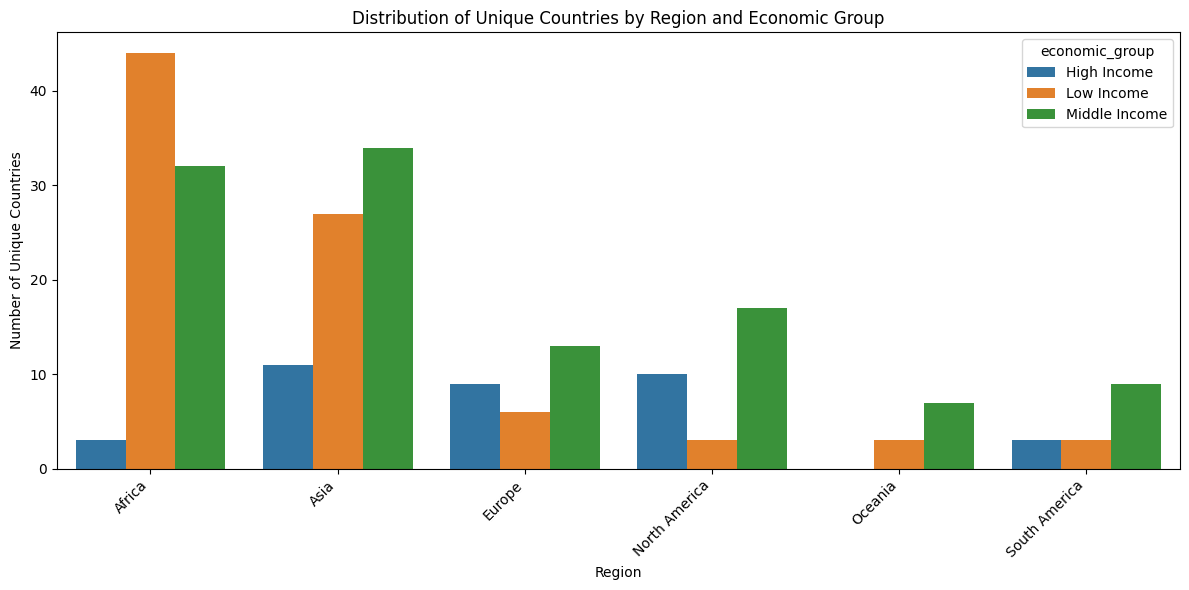

In [270]:
dropped_WB_data = pd.read_csv('dropped_WB_data.csv')

# Group data by region and economic group, then count unique countries
country_distribution = dropped_WB_data.groupby(['region', 'economic_group'])['Country'].nunique().reset_index()

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='Country', hue='economic_group', data=country_distribution)
plt.title('Distribution of Unique Countries by Region and Economic Group')
plt.xlabel('Region')
plt.ylabel('Number of Unique Countries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [271]:
WB_dev_ind_data = pd.read_csv('/content/08f770f4-23df-4e47-9b00-0aeca13b6cb3_Data.csv')
WB_dev_ind_data.head()

Country Name Country Code  \
0  Afghanistan          AFG   
1  Afghanistan          AFG   
2  Afghanistan          AFG   
3  Afghanistan          AFG   
4  Afghanistan          AFG   

                                         Series Name        Series Code  \
0  Access to clean fuels and technologies for coo...     EG.CFT.ACCS.ZS   
1            Access to electricity (% of population)     EG.ELC.ACCS.ZS   
2  Account ownership at a financial institution o...     FX.OWN.TOTL.ZS   
3  Account ownership at a financial institution o...  FX.OWN.TOTL.FE.ZS   
4  Adjusted net enrollment rate, primary (% of pr...        SE.PRM.TENR   

  2000 [YR2000] 2001 [YR2001] 2002 [YR2002] 2003 [YR2003] 2004 [YR2004]  \
0           5.5           6.6           7.7             9          10.5   
1           4.4           9.3          14.1            19          23.8   
2            ..            ..            ..            ..            ..   
3            ..            ..            ..            ..            ..   
4            ..            ..            ..            ..            ..   

  2005 [YR2005]  ... 2014 [YR2014] 2015 [YR2015] 2016 [YR2016] 2017 [YR2017]  \
0          11.9  ...          26.1          27.6          28.8          30.3   
1          28.7  ...          89.5          71.5          97.7          97.7   
2            ..  ...          9.96            ..            ..         14.89   
3            ..  ...          3.81            ..            ..          7.16   
4            ..  ...            ..            ..            ..            ..   

  2018 [YR2018] 2019 [YR2019] 2020 [YR2020] 2021 [YR2021] 2022 [YR2022]  \
0          31.4          32.6          33.8          34.9          36.1   
1          93.4          97.7          97.7          97.7          85.3   
2            ..            ..            ..          9.65            ..   
3            ..            ..            ..           4.7            ..   
4            ..            ..            ..            ..            ..   

  2023 [YR2023]  
0            ..  
1            ..  
2            ..  
3            ..  
4            ..  

[5 rows x 28 columns]

In [272]:
WB_dev_ind_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33787 entries, 0 to 33786
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country Name   33784 non-null  object
 1   Country Code   33782 non-null  object
 2   Series Name    33782 non-null  object
 3   Series Code    33782 non-null  object
 4   2000 [YR2000]  33782 non-null  object
 5   2001 [YR2001]  33782 non-null  object
 6   2002 [YR2002]  33782 non-null  object
 7   2003 [YR2003]  33782 non-null  object
 8   2004 [YR2004]  33782 non-null  object
 9   2005 [YR2005]  33782 non-null  object
 10  2006 [YR2006]  33782 non-null  object
 11  2007 [YR2007]  33782 non-null  object
 12  2008 [YR2008]  33782 non-null  object
 13  2009 [YR2009]  33782 non-null  object
 14  2010 [YR2010]  33782 non-null  object
 15  2011 [YR2011]  33782 non-null  object
 16  2012 [YR2012]  33782 non-null  object
 17  2013 [YR2013]  33782 non-null  object
 18  2014 [YR2014]  33782 non-n

In [273]:
#drop unnecessary columns
columns_to_drop = ['Country Code', 'Series Code']
WB_dev_ind_data = WB_dev_ind_data.drop(columns=columns_to_drop)

# Melt the dataset
# This converts year columns into a single column called 'Year'
year_columns = [col for col in WB_dev_ind_data.columns if '[YR' in col]  # Identify year columns
WB_dev_ind_melted_data = WB_dev_ind_data.melt(
    id_vars=['Country Name', 'Series Name'],  # Keep these columns fixed
    value_vars=year_columns,                 # Melt year columns
    var_name='Year',                         # New column name for years
    value_name='Value'                       # New column name for values
)

# Clean up the 'Year' column
# Extract the year as an integer
WB_dev_ind_melted_data['Year'] = WB_dev_ind_melted_data['Year'].str.extract(r'\[YR(\d+)\]').astype(int)

# Pivot the dataset
# Transform 'Series Name' into columns (features)
WB_dev_ind_pivoted_data = WB_dev_ind_melted_data.pivot_table(
    index=['Country Name', 'Year'],  # Set 'Country Name' and 'Year' as the index
    columns='Series Name',          # Turn 'Series Name' into feature columns
    values='Value',                 # Populate cells with values
    aggfunc='first'                 # Use the first non-null value (handles duplicates)
).reset_index()  # Reset index for a flat table

WB_dev_ind_pivoted_data.to_csv('WB_dev_ind_pivoted_data.csv', index=False)
WB_dev_ind_pivoted_data.head()

Series Name Country Name  Year  \
0            Afghanistan  2000   
1            Afghanistan  2001   
2            Afghanistan  2002   
3            Afghanistan  2003   
4            Afghanistan  2004   

Series Name Access to clean fuels and technologies for cooking (% of population)  \
0                                                          5.5                     
1                                                          6.6                     
2                                                          7.7                     
3                                                            9                     
4                                                         10.5                     

Series Name Access to electricity (% of population)  \
0                                               4.4   
1                                               9.3   
2                                              14.1   
3                                                19   
4                                              23.8   

Series Name Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+)  \
0                                                           ..                                                                
1                                                           ..                                                                
2                                                           ..                                                                
3                                                           ..                                                                
4                                                           ..                                                                

Series Name Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)  \
0                                                           ..                                                                        
1                                                           ..                                                                        
2                                                           ..                                                                        
3                                                           ..                                                                        
4                                                           ..                                                                        

Series Name Adjusted net enrollment rate, primary (% of primary school age children)  \
0                                                           ..                         
1                                                           ..                         
2                                                           ..                         
3                                                           ..                         
4                                                           ..                         

Series Name Adjusted savings: energy depletion (% of GNI)  \
0                                                      ..   
1                                                      ..   
2                                                      ..   
3                                                      ..   
4                                                      ..   

Series Name Adjusted savings: particulate emission damage (% of GNI)  \
0                                                           ..         
1                                                           ..         
2                                                           ..         
3                                                           ..         
4                                                           ..         

Series Name Adolescents out of school (% of lower second

In [274]:
WB_dev_ind_pivoted_data.columns.to_list()

['Country Name',
 'Year',
 'Access to clean fuels and technologies for cooking (% of population)',
 'Access to electricity (% of population)',
 'Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+)',
 'Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)',
 'Adjusted net enrollment rate, primary (% of primary school age children)',
 'Adjusted savings: energy depletion (% of GNI)',
 'Adjusted savings: particulate emission damage (% of GNI)',
 'Adolescents out of school (% of lower secondary school age)',
 'Adolescents out of school, female (% of female lower secondary school age)',
 'Age dependency ratio (% of working-age population)',
 'Agricultural irrigated land (% of total agricultural land)',
 'Agricultural land (% of land area)',
 'Agricultural raw materials exports (% of merchandise exports)',
 'Agricultural raw materials imports (% of merchandise imports)

In [275]:
WB_dev_ind_pivoted_data._get_numeric_data().columns.to_list()

['Year']

In [276]:
# Replace '..' with NaN
WB_dev_ind_pivoted_data.replace('..', np.nan, inplace=True)

# Get a list of numeric columns (excluding 'Country Name')
numeric_cols = WB_dev_ind_pivoted_data.select_dtypes(include=np.number).columns.tolist()

# Convert numeric columns to their proper types
WB_dev_ind_pivoted_data[numeric_cols] = WB_dev_ind_pivoted_data[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Standardize column names for easier access
WB_dev_ind_pivoted_data.columns = WB_dev_ind_pivoted_data.columns.str.replace(' ', '_')

# Summarize missing values
missing_summary = WB_dev_ind_pivoted_data.isnull().sum()

# Drop columns with excessive missing values (>50% missing), excluding 'Country Name'
threshold = len(WB_dev_ind_pivoted_data) * 0.5
columns_to_keep = missing_summary[(missing_summary <= threshold) | (missing_summary.index == 'Country_Name')].index
WB_dev_ind_pivoted_data = WB_dev_ind_pivoted_data[columns_to_keep]

summary = WB_dev_ind_pivoted_data.info()

missing_summary_cleaned = missing_summary[missing_summary <= threshold]

WB_dev_ind_pivoted_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6384 entries, 0 to 6383
Data columns (total 81 columns):
 #   Column                                                                                           Non-Null Count  Dtype 
---  ------                                                                                           --------------  ----- 
 0   Country_Name                                                                                     6384 non-null   object
 1   Year                                                                                             6384 non-null   int64 
 2   Access_to_clean_fuels_and_technologies_for_cooking_(%_of_population)                             5451 non-null   object
 3   Access_to_electricity_(%_of_population)                                                          6024 non-null   object
 4   Adjusted_savings:_energy_depletion_(%_of_GNI)                                                    5227 non-null   object
 5   Adjusted_savi

Series Name Country_Name  Year  \
0            Afghanistan  2000   
1            Afghanistan  2001   
2            Afghanistan  2002   
3            Afghanistan  2003   
4            Afghanistan  2004   

Series Name Access_to_clean_fuels_and_technologies_for_cooking_(%_of_population)  \
0                                                          5.5                     
1                                                          6.6                     
2                                                          7.7                     
3                                                            9                     
4                                                         10.5                     

Series Name Access_to_electricity_(%_of_population)  \
0                                               4.4   
1                                               9.3   
2                                              14.1   
3                                                19   
4                                              23.8   

Series Name Adjusted_savings:_energy_depletion_(%_of_GNI)  \
0                                                     NaN   
1                                                     NaN   
2                                                     NaN   
3                                                     NaN   
4                                                     NaN   

Series Name Adjusted_savings:_particulate_emission_damage_(%_of_GNI)  \
0                                                          NaN         
1                                                          NaN         
2                                                          NaN         
3                                                          NaN         
4                                                          NaN         

Series Name Age_dependency_ratio_(%_of_working-age_population)  \
0                                             109.586047730495   
1                                             110.219341359285   
2                                             110.534611030603   
3                                             110.557539565476   
4                                             110.285308007212   

Series Name Agricultural_land_(%_of_land_area)  \
0                             57.9458166597673   
1                             57.9473498612453   
2                             57.9396838538552   
3                             58.0838047927878   
4                             58.1512656578201   

Series Name Agricultural_raw_materials_exports_(%_of_merchandise_exports)  \
0                                                          NaN              
1                                                          NaN              
2                                                          NaN              
3                                                          NaN              
4                                                          NaN              

Series Name Agricultural_raw_materials_imports_(%_of_merchandise_imports)  \
0                                                          NaN              
1                                                          NaN              
2                                                          NaN              
3                                                          NaN              
4                                                          NaN              

Series Name  ... Services,_value_added_(%_of_GDP)  \
0            ...                              NaN   
1            ...                              NaN   
2            ...                 36.1511545995992   
3            ...                 37.4448038407261   
4            ...                 41.1108953364243   

Series Name Survival_to_age_65,_female_(%_of_cohort)  \
0                                          52.865939   
1                                          53.684696   
2                                          54.20

In [277]:
WB_dev_ind_pivoted_data.isnull().sum().sum()

94830

In [278]:
WB_dev_ind_pivoted_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6384 entries, 0 to 6383
Data columns (total 81 columns):
 #   Column                                                                                           Non-Null Count  Dtype 
---  ------                                                                                           --------------  ----- 
 0   Country_Name                                                                                     6384 non-null   object
 1   Year                                                                                             6384 non-null   int64 
 2   Access_to_clean_fuels_and_technologies_for_cooking_(%_of_population)                             5451 non-null   object
 3   Access_to_electricity_(%_of_population)                                                          6024 non-null   object
 4   Adjusted_savings:_energy_depletion_(%_of_GNI)                                                    5227 non-null   object
 5   Adjusted_savi

In [279]:
missing_summary_cleaned.info()

<class 'pandas.core.series.Series'>
Index: 81 entries, Country_Name to Urban_population_(%_of_total_population)
Series name: None
Non-Null Count  Dtype
--------------  -----
81 non-null     int64
dtypes: int64(1)
memory usage: 1.3+ KB


In [280]:
dropped_WB_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3947 entries, 0 to 3946
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Country                                3947 non-null   object 
 1   Year                                   3947 non-null   int64  
 2   current_account_balance_gdp            3947 non-null   float64
 3   current_account_balance_usd            3947 non-null   float64
 4   gov_gross_debt_gdp                     3947 non-null   float64
 5   gov_net_lending_borrowing_gdp          3947 non-null   float64
 6   gov_primary_net_lending_borrowing_gdp  3947 non-null   float64
 7   gov_revenue_gdp                        3947 non-null   float64
 8   gov_total_expenditure_gdp              3947 non-null   float64
 9   gdp_ppp_share_world                    3947 non-null   float64
 10  gdp_constant_prices_pct_change         3947 non-null   float64
 11  gdp_

In [281]:
WB_dev_ind_pivoted_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6384 entries, 0 to 6383
Data columns (total 81 columns):
 #   Column                                                                                           Non-Null Count  Dtype 
---  ------                                                                                           --------------  ----- 
 0   Country_Name                                                                                     6384 non-null   object
 1   Year                                                                                             6384 non-null   int64 
 2   Access_to_clean_fuels_and_technologies_for_cooking_(%_of_population)                             5451 non-null   object
 3   Access_to_electricity_(%_of_population)                                                          6024 non-null   object
 4   Adjusted_savings:_energy_depletion_(%_of_GNI)                                                    5227 non-null   object
 5   Adjusted_savi

In [282]:
from fuzzywuzzy import process

# Step 1: Extract unique country names
dropped_WB_data_countries = WB_dev_ind_pivoted_data['Country_Name'].unique()
cleaned_data_countries = dropped_WB_data['Country'].unique()

# Step 2: Perform Fuzzy Matching
country_mapping = {}
for country in cleaned_data_countries:
    match, score = process.extractOne(country, dropped_WB_data_countries)
    if score > 70:  # Threshold for a good match
        country_mapping[country] = match
    else:
        country_mapping[country] = None  # No reliable match found

# Step 3: Map matched countries to dropped_WB_data
dropped_WB_data['Mapped Country Name'] = dropped_WB_data['Country'].map(country_mapping)

# Step 4: Merge datasets using mapped country names and Year
WB_dev_ind_pivoted_data.rename(columns={'Country_Name': 'Mapped Country Name'}, inplace=True)

dropped_WB_data = pd.merge(
    dropped_WB_data,
    WB_dev_ind_pivoted_data,
    on=['Mapped Country Name', 'Year'],
    how='left'
)

# Step 5: Handle Missing Matches
unmatched_countries = dropped_WB_data[dropped_WB_data['Mapped Country Name'].isnull()]['Country'].unique()
print("Unmatched Countries in dropped_WB_data:")
print(unmatched_countries)

# Step 6: Save the Resulting Dataset
dropped_WB_data.to_csv('dropped_WB_data_ind.csv', index=False)

# Step 7: Display Summary
print(dropped_WB_data.info())
dropped_WB_data.head()


Unmatched Countries in dropped_WB_data:
[]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3947 entries, 0 to 3946
Columns: 109 entries, Country to Urban_population_(%_of_total_population)
dtypes: float64(25), int64(1), object(83)
memory usage: 3.3+ MB
None


Country  Year  current_account_balance_gdp  \
0  Afghanistan  2002                       33.908   
1  Afghanistan  2003                       29.616   
2  Afghanistan  2004                       37.216   
3  Afghanistan  2005                       30.226   
4  Afghanistan  2006                       20.844   

   current_account_balance_usd  gov_gross_debt_gdp  \
0                        1.481             345.977   
1                        1.348             270.602   
2                        1.915             244.967   
3                        1.864             206.356   
4                        1.444              22.985   

   gov_net_lending_borrowing_gdp  gov_primary_net_lending_borrowing_gdp  \
0                         -0.098                                 -0.870   
1                         -2.102                                 -0.870   
2                         -2.393                                 -0.870   
3                         -0.917                                 -0.870   
4                          0.684                                  0.724   

   gov_revenue_gdp  gov_total_expenditure_gdp  gdp_ppp_share_world  ...  \
0            6.845                      6.943                0.035  ...   
1            9.826                     11.927                0.037  ...   
2           12.676                     15.069                0.035  ...   
3           14.733                     15.651                0.038  ...   
4           18.946                     18.262                0.038  ...   

   Services,_value_added_(%_of_GDP)  Survival_to_age_65,_female_(%_of_cohort)  \
0                  36.1511545995992                                 54.202323   
1                  37.4448038407261                                 55.854743   
2                  41.1108953364243                                 56.786512   
3                  39.0077871841904                                 57.582783   
4                  39.8310243252872                                  58.39886   

   Survival_to_age_65,_male_(%_of_cohort)  Tax_revenue_(%_of_GDP)  \
0                               48.174265                     NaN   
1                               49.564073                     NaN   
2                               50.651593                     NaN   
3                               51.161977                     NaN   
4                               51.113939        6.96759757507017   

   Total_natural_resources_rents_(%_of_GDP)  \
0                          1.27614880703829   
1                         0.731312589343673   
2                         0.458919792113206   
3                         0.393192771402782   
4                         0.504174403493816   

   Total_reserves_(%_of_total_external_debt)  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   Unemployment,_female_(%_of_female_labor_force)_(modeled_ILO_estimate)  \
0                                             10.442                       
1                                             10.416                       
2                                             10.402                       
3                                             10.396                       
4                                             10.409                       

   Unemployment,_male_(%_of_male_labor_force)_(modeled_ILO_estimate)  \
0                                              7.435                   
1                                              7.414                   
2                                              7.402                   
3                                              7.398                   
4                                              7.408                   

   Unemployment,_total_(%_of_total_labor_force)_(modeled_ILO_estimate)  \
0                      

In [283]:
dropped_WB_data.shape

(3947, 109)

In [284]:
# Create a summary of missing values and their data types
missing_summary = dropped_WB_data.isnull().sum().to_frame(name='Missing Values')
missing_summary['Data Type'] = dropped_WB_data.dtypes
missing_summary = missing_summary[missing_summary['Missing Values'] > 0]  # Only include columns with missing values

missing_summary.sort_values(by='Missing Values', ascending=False, inplace=True)
missing_summary.to_csv('missing_summary.csv')
missing_summary

Missing Values Data Type
Intentional_homicides_(per_100,000_people)                    2241    object
Grants_and_other_revenue_(%_of_revenue)                       2223    object
Tax_revenue_(%_of_GDP)                                        2125    object
Hospital_beds_(per_1,000_people)                              2106    object
Profit_tax_(%_of_commercial_profits)                          2090    object
...                                                            ...       ...
Population,_male_(%_of_total_population)                       772    object
Net_migration                                                  772    object
Population_growth_(annual_%)                                   772    object
Age_dependency_ratio_(%_of_working-age_population)             772    object
Population,_female_(%_of_total_population)                     772    object

[79 rows x 2 columns]

In [285]:
# Identify columns to drop based on missing value threshold
columns_to_drop = missing_summary[missing_summary['Missing Values'] > 1200].index.tolist()

# Drop the identified columns
dropped_WB_data = dropped_WB_data.drop(columns=columns_to_drop, errors='ignore')

# Group data by 'region' and 'economic_group'
grouped = dropped_WB_data.groupby(['region', 'economic_group'])

# Interpolate missing values using appropriate methods
for col in dropped_WB_data.columns:
    if col not in ['Year', 'Country Name', 'Country', 'Mapped Country Name', 'region', 'economic_group']:
        if dropped_WB_data[col].dtype in [np.float64, np.int64]:
            # Fill numeric columns with the mean within groups
            dropped_WB_data[col] = grouped[col].transform(lambda x: x.fillna(x.mean()))
        elif dropped_WB_data[col].dtype == 'object':
            # Fill categorical columns with the mode within groups, handling empty modes
            dropped_WB_data[col] = grouped[col].transform(
                lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown') # Replace None with a placeholder like 'Unknown'
            )

# Save the updated DataFrame
dropped_WB_data.to_csv('dropped_WB_data_interpolated.csv', index=False)

# Validate the result
print("Remaining missing values:", dropped_WB_data.isna().sum().sum())

Remaining missing values: 0


In [286]:
dropped_WB_data.duplicated().sum()

0

In [287]:
final_dataset = dropped_WB_data.drop('Mapped Country Name', axis=1)
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3947 entries, 0 to 3946
Data columns (total 82 columns):
 #   Column                                                                                           Non-Null Count  Dtype  
---  ------                                                                                           --------------  -----  
 0   Country                                                                                          3947 non-null   object 
 1   Year                                                                                             3947 non-null   int64  
 2   current_account_balance_gdp                                                                      3947 non-null   float64
 3   current_account_balance_usd                                                                      3947 non-null   float64
 4   gov_gross_debt_gdp                                                                               3947 non-null   float64
 5   gov_ne

In [288]:
final_dataset.to_csv('final_dataset.csv', index=False)

In [289]:
final_dataset.columns.to_list()

['Country',
 'Year',
 'current_account_balance_gdp',
 'current_account_balance_usd',
 'gov_gross_debt_gdp',
 'gov_net_lending_borrowing_gdp',
 'gov_primary_net_lending_borrowing_gdp',
 'gov_revenue_gdp',
 'gov_total_expenditure_gdp',
 'gdp_ppp_share_world',
 'gdp_constant_prices_pct_change',
 'gdp_current_ppp',
 'gdp_current_usd',
 'gdp_deflator',
 'gross_national_savings_gdp',
 'implied_ppp_conversion_rate',
 'inflation_avg_cpi',
 'inflation_avg_cpi_pct_change',
 'inflation_end_cpi',
 'inflation_end_cpi_pct_change',
 'population_millions',
 'total_investment_gdp',
 'imports_goods_pct_change',
 'exports_goods_pct_change',
 'exports_goods_services_pct_change',
 'imports_goods_services_pct_change',
 'region',
 'gdp_per_capita_usd',
 'economic_group',
 'Access_to_clean_fuels_and_technologies_for_cooking_(%_of_population)',
 'Access_to_electricity_(%_of_population)',
 'Adjusted_savings:_energy_depletion_(%_of_GNI)',
 'Age_dependency_ratio_(%_of_working-age_population)',
 'Agricultural_land

In [290]:
from sklearn.preprocessing import StandardScaler

# Load the user's dataset
file_path = '/content/final_dataset.csv'  # Replace with the correct path to the uploaded file
df = pd.read_csv(file_path)

# Define the subcategories and their respective columns
subcategories = {
    "Energy and Emissions": [
        "Access_to_clean_fuels_and_technologies_for_cooking_(%_of_population)",
        "Access_to_electricity_(%_of_population)",
        "Carbon_dioxide_(CO2)_emissions_(total)_excluding_LULUCF_(%_change_from_1990)",
        "Carbon_intensity_of_GDP_(kg_CO2e_per_constant_2015_US$_of_GDP)"
    ],
    "Natural Resources and Land Use": [
        "Agricultural_land_(%_of_land_area)",
        "Forest_area_(%_of_land_area)",
        "Total_natural_resources_rents_(%_of_GDP)",
        "Mineral_rents_(%_of_GDP)",
        "Oil_rents_(%_of_GDP)",
        "Natural_gas_rents_(%_of_GDP)",
        "Average_precipitation_in_depth_(mm_per_year)"
    ],
    "Water and Agriculture": [
        "Agriculture,_forestry,_and_fishing,_value_added_(%_of_GDP)"
    ],
    "Health and Demographics": [
        "Birth_rate,_crude_(per_1,000_people)",
        "Death_rate,_crude_(per_1,000_people)",
        "Life_expectancy_at_birth,_female_(years)",
        "Life_expectancy_at_birth,_male_(years)",
        "Survival_to_age_65,_female_(%_of_cohort)",
        "Survival_to_age_65,_male_(%_of_cohort)",
        "Number_of_infant_deaths",

    ],
    "Employment and Labor": [
        "Employment_in_agriculture_(%_of_total_employment)_(modeled_ILO_estimate)",
        "Labor_force_participation_rate,_female_(%_of_female_population_ages_15+)_(modeled_ILO_estimate)",
        "Ratio_of_female_to_male_labor_force_participation_rate_(%)_(modeled_ILO_estimate)",
        "Unemployment,_female_(%_of_female_labor_force)_(modeled_ILO_estimate)",
        "Unemployment,_male_(%_of_male_labor_force)_(modeled_ILO_estimate)",
        "Unemployment,_total_(%_of_total_labor_force)_(modeled_ILO_estimate)"
    ],
    "Education and Connectivity": [
        "Mobile_cellular_subscriptions_(per_100_people)",
        "Fixed_telephone_subscriptions_(per_100_people)",
        "Urban_population_(%_of_total_population)"
    ],
    "Government and Institutions": [
        "Control_of_Corruption:_Percentile_Rank",
        "Government_Effectiveness:_Percentile_Rank",
        "Political_Stability_and_Absence_of_Violence/Terrorism:_Percentile_Rank",
        "Rule_of_Law:_Percentile_Rank"
    ],
    "Economic Governance": [
        "Domestic_credit_to_private_sector_by_banks_(%_of_GDP)",
        "Foreign_direct_investment,_net_inflows_(%_of_GDP)",
        "Merchandise_trade_(%_of_GDP)"
    ]
}

# Reverse sign for negative indicators (e.g., emissions, unemployment)
negative_indicators = [
    "Carbon_dioxide_(CO2)_emissions_(total)_excluding_LULUCF_(%_change_from_1990)",
    "Carbon_intensity_of_GDP_(kg_CO2e_per_constant_2015_US$_of_GDP)",
    "Death_rate,_crude_(per_1,000_people)",
    "Number_of_infant_deaths",
    "Number_of_maternal_deaths",
    "Unemployment,_female_(%_of_female_labor_force)_(modeled_ILO_estimate)",
    "Unemployment,_male_(%_of_male_labor_force)_(modeled_ILO_estimate)",
    "Unemployment,_total_(%_of_total_labor_force)_(modeled_ILO_estimate)"
]

for col in negative_indicators:
    if col in df.columns:
        df[col] = -df[col]

# Identify numeric columns only
numeric_columns = df.select_dtypes(include=['number']).columns

# Standardize only numeric columns
scaler = StandardScaler()
standardized_numeric_df = pd.DataFrame(scaler.fit_transform(df[numeric_columns]), columns=numeric_columns)

# Retain non-numeric columns
non_numeric_df = df.drop(columns=numeric_columns)

# Compute subcategory scores
aggregated_data = {}

for subcategory, columns in subcategories.items():
    valid_columns = [col for col in columns if col in standardized_numeric_df.columns]
    if valid_columns:  # Ensure there are valid columns before computing mean
        aggregated_data[subcategory] = standardized_numeric_df[valid_columns].mean(axis=1)

# Create a new DataFrame with the aggregated scores and non-numeric data
aggregated_df = pd.concat([non_numeric_df.reset_index(drop=True), pd.DataFrame(aggregated_data)], axis=1)



# Extract subcategory score columns from aggregated_df
subcategory_score_cols = list(subcategories.keys())
subcategory_scores_df = aggregated_df[subcategory_score_cols]

# Merge with original DataFrame (df) using a common key (e.g., 'Country', 'Year')
updated_df = pd.merge(df, subcategory_scores_df, left_index=True, right_index=True)
cols_to_drop = [col for sublist in subcategories.values() for col in sublist]
updated_df = updated_df.drop(columns=cols_to_drop)
# Save the updated DataFrame
updated_df.to_csv('updated_dataset_with_scores.csv', index=False)

print("Original DataFrame updated with subcategory scores.")

updated_df.head()



Original DataFrame updated with subcategory scores.


Country  Year  current_account_balance_gdp  \
0  Afghanistan  2002                       33.908   
1  Afghanistan  2003                       29.616   
2  Afghanistan  2004                       37.216   
3  Afghanistan  2005                       30.226   
4  Afghanistan  2006                       20.844   

   current_account_balance_usd  gov_gross_debt_gdp  \
0                        1.481             345.977   
1                        1.348             270.602   
2                        1.915             244.967   
3                        1.864             206.356   
4                        1.444              22.985   

   gov_net_lending_borrowing_gdp  gov_primary_net_lending_borrowing_gdp  \
0                         -0.098                                 -0.870   
1                         -2.102                                 -0.870   
2                         -2.393                                 -0.870   
3                         -0.917                                 -0.870   
4                          0.684                                  0.724   

   gov_revenue_gdp  gov_total_expenditure_gdp  gdp_ppp_share_world  ...  \
0            6.845                      6.943                0.035  ...   
1            9.826                     11.927                0.037  ...   
2           12.676                     15.069                0.035  ...   
3           14.733                     15.651                0.038  ...   
4           18.946                     18.262                0.038  ...   

   Rural_population_(%_of_total_population)  Services,_value_added_(%_of_GDP)  \
0                                    77.739                         36.151155   
1                                    77.647                         37.444804   
2                                    77.500                         41.110895   
3                                    77.297                         39.007787   
4                                    77.093                         39.831024   

   Energy and Emissions  Natural Resources and Land Use  \
0             -0.626340                       -0.369496   
1             -0.578431                       -0.387696   
2             -0.520532                       -0.391860   
3             -0.490113                       -0.393245   
4             -0.445378                       -0.392024   

   Water and Agriculture  Health and Demographics  Employment and Labor  \
0               2.437901                -0.377431             -0.413874   
1               2.327585                -0.310628             -0.413632   
2               1.625217                -0.271283             -0.413862   
3               1.752390                -0.243656             -0.417725   
4               1.526210                -0.220062             -0.427698   

   Education and Connectivity  Government and Institutions  \
0                   -1.013611                    -1.372007   
1                   -1.006807                    -1.272669   
2                   -0.879915                    -1.182450   
3                   -0.860721                    -1.316596   
4                   -0.823903                    -1.397630   

   Economic Governance  
0            -0.194034  
1            -0.463798  
2            -0.497887  
3            -0.521290  
4            -0.508826  

[5 rows x 55 columns]

In [291]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3947 entries, 0 to 3946
Data columns (total 55 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   Country                                                                           3947 non-null   object 
 1   Year                                                                              3947 non-null   int64  
 2   current_account_balance_gdp                                                       3947 non-null   float64
 3   current_account_balance_usd                                                       3947 non-null   float64
 4   gov_gross_debt_gdp                                                                3947 non-null   float64
 5   gov_net_lending_borrowing_gdp                                                     3947 non-null   float64
 6   

In [292]:
updated_df['Country'].nunique()

135

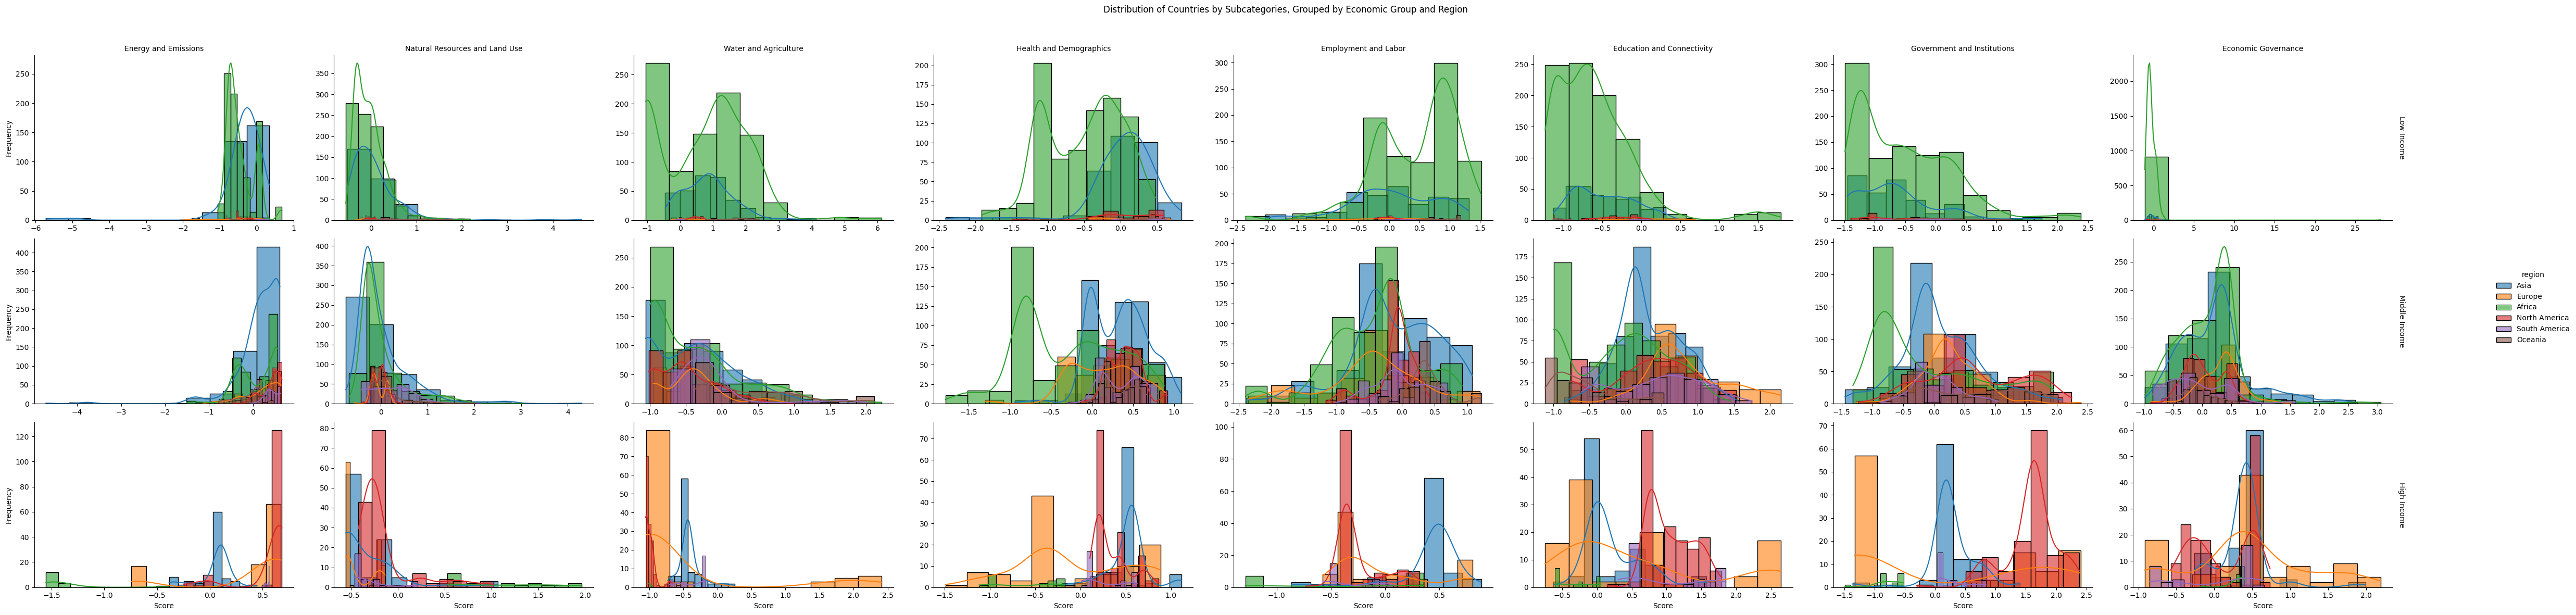

In [293]:

# Ensure 'economic_group' and 'region' columns are present in the dataset
if 'economic_group' in updated_df.columns and 'region' in updated_df.columns:
    # Melt the DataFrame to make it suitable for plotting
    melted_df = updated_df.melt(
        id_vars=['economic_group', 'region'],
        value_vars=list(subcategories.keys()),
        var_name='Subcategory',
        value_name='Score'
    )

    # Set up the seaborn grid for visualization
    g = sns.FacetGrid(
        melted_df,
        col="Subcategory",
        row="economic_group",
        hue="region",
        margin_titles=True,
        sharex=False,
        sharey=False,
        height=4,
        aspect=1.5
    )
    g.map(sns.histplot, "Score", kde=True, bins=10, alpha=0.6)
    g.add_legend()

    # Adjust the plot
    g.set_axis_labels("Score", "Frequency")
    g.set_titles(col_template="{col_name}", row_template="{row_name}")
    plt.subplots_adjust(top=0.9)
    g.fig.suptitle("Distribution of Countries by Subcategories, Grouped by Economic Group and Region")

    plt.show()
else:
    print("The columns 'economic_group' and/or 'region' are not present in the dataset.")


In [294]:
updated_df.columns

Index(['Country', 'Year', 'current_account_balance_gdp',
       'current_account_balance_usd', 'gov_gross_debt_gdp',
       'gov_net_lending_borrowing_gdp',
       'gov_primary_net_lending_borrowing_gdp', 'gov_revenue_gdp',
       'gov_total_expenditure_gdp', 'gdp_ppp_share_world',
       'gdp_constant_prices_pct_change', 'gdp_current_ppp', 'gdp_current_usd',
       'gdp_deflator', 'gross_national_savings_gdp',
       'implied_ppp_conversion_rate', 'inflation_avg_cpi',
       'inflation_avg_cpi_pct_change', 'inflation_end_cpi',
       'inflation_end_cpi_pct_change', 'population_millions',
       'total_investment_gdp', 'imports_goods_pct_change',
       'exports_goods_pct_change', 'exports_goods_services_pct_change',
       'imports_goods_services_pct_change', 'region', 'gdp_per_capita_usd',
       'economic_group', 'Adjusted_savings:_energy_depletion_(%_of_GNI)',
       'Age_dependency_ratio_(%_of_working-age_population)',
       'Current_health_expenditure_(%_of_GDP)',
       'Indust

## Key Indicators from the EWS Article: Feature Engineering Overview

In this section, we will systematically engineer features based on the **key indicators highlighted in the Early Warning Signals (EWS) article** to predict sovereign defaults.
The EWS article provides crucial insights into economic, fiscal, and external conditions that lead to an elevated risk of sovereign default. Our goal is to:

1. Extract and transform data from the **IMF dataset** to create features that align with the risk indicators mentioned in the EWS article.
2. Use **proxy features** where direct indicators are not available, combining multiple data points to approximate the risk factors.
3. Comment on the feature creation step-by-step, making it easy to follow the rationale behind each metric.

## Key Early Warning Signals (EWS) and Corresponding Features
The EWS article identifies a range of economic indicators that signal heightened risk of default. We will address each of these indicators as follows:

### 1. **Net External Liability (NEL) Positions**
- **Description**: Net External Liabilities (NEL) positions are a critical determinant of sovereign default risk. High NEL indicates that liabilities significantly exceed external assets, often leading to vulnerability to external shocks.
- **Proxy Feature**: We will use a combination of **fiscal deficit**, **low savings**, and **current account deficits** to estimate NEL.

In [295]:
updated_df[updated_df['Year'].isin(range(2019,2024))][['Country','gov_primary_net_lending_borrowing_gdp','current_account_balance_gdp','gross_national_savings_gdp','economic_group','region']]

Country  gov_primary_net_lending_borrowing_gdp  \
17    Afghanistan                                 -1.019   
18    Afghanistan                                 -2.206   
19    Afghanistan                                 -0.462   
20    Afghanistan                                 -0.989   
40        Albania                                  0.211   
...           ...                                    ...   
3936     Zimbabwe                                 -0.545   
3937     Zimbabwe                                  0.885   
3938     Zimbabwe                                 -1.741   
3939     Zimbabwe                                 -5.726   
3940     Zimbabwe                                 -7.651   

      current_account_balance_gdp  gross_national_savings_gdp economic_group  \
17                         11.705                   29.897000     Low Income   
18                         13.974                   30.985000     Low Income   
19                         13.974                   10.578000     Low Income   
20                         13.974                  -13.612000     Low Income   
40                         -7.571                   14.742000  Middle Income   
...                           ...                         ...            ...   
3936                        3.536                   21.235227  Middle Income   
3937                        2.524                   21.235227  Middle Income   
3938                        0.967                   21.235227  Middle Income   
3939                        0.975                   21.235227  Middle Income   
3940                        0.419                   21.235227  Middle Income   

      region  
17      Asia  
18      Asia  
19      Asia  
20      Asia  
40    Europe  
...      ...  
3936  Africa  
3937  Africa  
3938  Africa  
3939  Africa  
3940  Africa  

[663 rows x 6 columns]

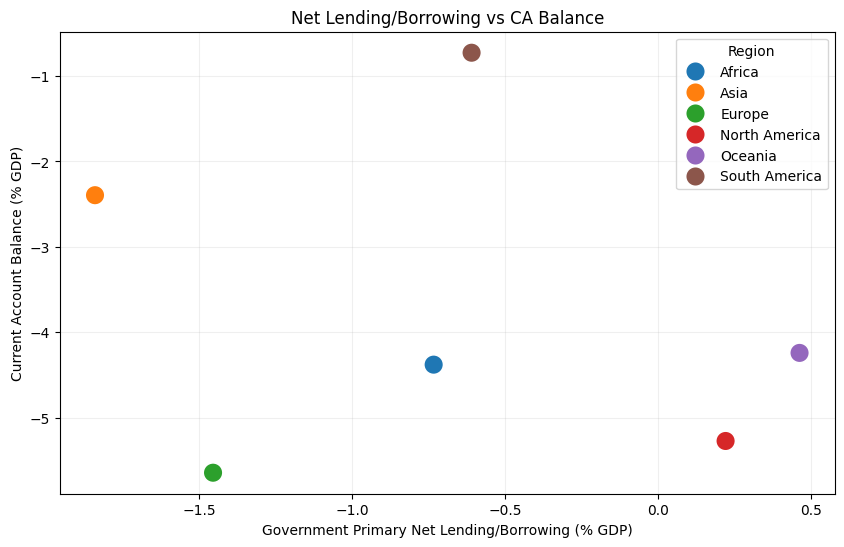

In [296]:
# Calculate one centroid per region
region_centroids = updated_df.groupby('region')[['gov_primary_net_lending_borrowing_gdp', 'current_account_balance_gdp']].mean().reset_index()

# Plot the centroids
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=region_centroids,
    x='gov_primary_net_lending_borrowing_gdp',
    y='current_account_balance_gdp',
    hue='region',
    palette='tab10',
    s=200,  # Larger size for centroids
    legend=True
)

# Customize plot
plt.title('Net Lending/Borrowing vs CA Balance')
plt.xlabel('Government Primary Net Lending/Borrowing (% GDP)')
plt.ylabel('Current Account Balance (% GDP)')
plt.grid(alpha=0.2)
plt.legend(title='Region')
plt.show()




#### Net Lending/Borrowing vs. Current Account Balance by Region

#### Key Learnings:
1. **Fiscal Deficits**:
   - Africa, Asia and Europe show significant fiscal deficits, increasing reliance on borrowing.
   - North America and Oceania demonstrates fiscal surpluses, reducing NEL vulnerability.

2. **Current Account Deficits**:
   - All regions excluding Asia exhibit Current Account Deficits (CAD) with Africa having only a mild CAD which may signal positive BOP, and low level of imports due to limited economic capacity.
   - Asia shows surpluses, reflecting robust trade balances and lower NEL risks.

3. **Regional Dynamics**:
   - Africa: High fiscal and current account deficits amplify NEL exposure. A dynamic not captured by this plot is that most of Africa's exports tend to be commodities in raw or crude format.
   - Asia: Strong savings and trade balances mitigate NEL risks.

#### Impact on NEL:
Regions with persistent fiscal and current account deficits (e.g., Africa, Oceania) are at higher risk of accumulating unsustainable external liabilities, driven by reliance on external financing to fill fiscal and trade gaps.


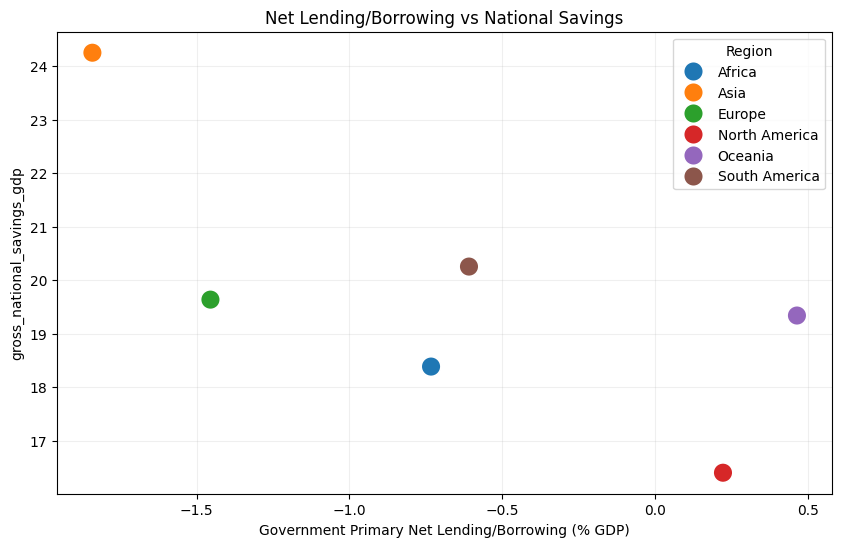

In [297]:
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for better color palettes


# Calculate one centroid per region
region_centroids = updated_df.groupby('region')[['gov_primary_net_lending_borrowing_gdp', 'gross_national_savings_gdp']].mean().reset_index()

# Plot the centroids
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=region_centroids,
    x='gov_primary_net_lending_borrowing_gdp',
    y='gross_national_savings_gdp',
    hue='region',
    palette='tab10',
    s=200,  # Larger size for centroids
    legend=True
)

# Customize plot
plt.title('Net Lending/Borrowing vs National Savings')
plt.xlabel('Government Primary Net Lending/Borrowing (% GDP)')
plt.ylabel('gross_national_savings_gdp')
plt.grid(alpha=0.2)
plt.legend(title='Region')
plt.show()




#### Net Lending/Borrowing vs. National Savings by Region

#### Key Learnings:
1. **National Savings**:
   - Asia shows the highest gross national savings (>25% of GDP), significantly reducing NEL risks.
   - Africa and Oceania have the lowest savings levels (~18% of GDP), exacerbating reliance on external financing.

2. **Fiscal Deficits**:
   - Africa and Oceania combine low national savings with large fiscal deficits, intensifying external vulnerabilities.
   - South America demonstrates fiscal surpluses but maintains relatively low savings (~20% of GDP), limiting self-financing capacity.

3. **Regional Dynamics**:
   - **Asia**: High savings and moderate fiscal deficits create a robust buffer against external liabilities.
   - **Africa & Oceania**: Dual challenges of low savings and fiscal deficits heighten NEL risks.
   - **Europe**: Balanced fiscal positions supported by moderate savings (~22% of GDP) mitigate risks.

#### Impact on NEL:
Regions with low national savings, particularly Africa and Oceania, are more exposed to external liabilities due to limited domestic resources to fund fiscal and trade imbalances. Conversely, regions with higher savings like Asia are better equipped to self-finance and avoid external debt accumulation.


In [298]:
updated_df.columns

Index(['Country', 'Year', 'current_account_balance_gdp',
       'current_account_balance_usd', 'gov_gross_debt_gdp',
       'gov_net_lending_borrowing_gdp',
       'gov_primary_net_lending_borrowing_gdp', 'gov_revenue_gdp',
       'gov_total_expenditure_gdp', 'gdp_ppp_share_world',
       'gdp_constant_prices_pct_change', 'gdp_current_ppp', 'gdp_current_usd',
       'gdp_deflator', 'gross_national_savings_gdp',
       'implied_ppp_conversion_rate', 'inflation_avg_cpi',
       'inflation_avg_cpi_pct_change', 'inflation_end_cpi',
       'inflation_end_cpi_pct_change', 'population_millions',
       'total_investment_gdp', 'imports_goods_pct_change',
       'exports_goods_pct_change', 'exports_goods_services_pct_change',
       'imports_goods_services_pct_change', 'region', 'gdp_per_capita_usd',
       'economic_group', 'Adjusted_savings:_energy_depletion_(%_of_GNI)',
       'Age_dependency_ratio_(%_of_working-age_population)',
       'Current_health_expenditure_(%_of_GDP)',
       'Indust

In [299]:
from sklearn.cluster import KMeans

# Step 1: Flexible Flags with Adjustable Thresholds
# Fiscal Deficit Flag: Negative values indicate fiscal deficits
updated_df['Fiscal_Deficit_Flag'] = (updated_df['gov_net_lending_borrowing_gdp'] < 0).astype(int)

# Low Savings Flag: Savings below a customizable threshold (default: 10%)
low_savings_threshold = 10  # Adjusted threshold to capture more savings vulnerabilities
updated_df['Low_Savings_Flag'] = (updated_df['gross_national_savings_gdp'] < low_savings_threshold).astype(int)

# Current Account Deficit Flag: Negative current account balance indicates a deficit
updated_df['Current_Account_Deficit_Flag'] = (updated_df['current_account_balance_gdp'] < 0).astype(int)

# Step 2: Weighted NEL Scoring System
# Assign weights to each flag based on its relative importance to NEL risk
fiscal_weight = 0.4
savings_weight = 0.3
current_account_weight = 0.3

# Compute a weighted NEL score
updated_df['NEL_Score'] = (
    fiscal_weight * (updated_df['gov_net_lending_borrowing_gdp'].clip(upper=0).abs()) +
    savings_weight * (low_savings_threshold - updated_df['gross_national_savings_gdp']).clip(lower=0) +
    current_account_weight * (updated_df['current_account_balance_gdp'].clip(upper=0).abs())
)

# Step 3: Risk Clustering (Optional)
# Cluster countries based on NEL_Score and related metrics
clustering_data = updated_df[['NEL_Score',
                 'gov_net_lending_borrowing_gdp',
                 'gross_national_savings_gdp',
                 'current_account_balance_gdp']].dropna()
kmeans = KMeans(n_clusters=10, random_state=42)
clustering_data['NEL_Risk_Cluster'] = kmeans.fit_predict(clustering_data)

# Reassign the cluster labels back to the original dataset
# Use the original index from the clustering dataset
updated_df['NEL_Risk_Cluster'] = np.nan
updated_df.loc[clustering_data.index, 'NEL_Risk_Cluster'] = clustering_data['NEL_Risk_Cluster']

# Step 4: Classification Based on Risk Levels
# Assign categorical risk levels based on NEL_Score
updated_df['NEL_Risk_Level'] = pd.cut(
    updated_df['NEL_Score'],
    bins=[-np.inf, 5, 10, np.inf],
    labels=['Low', 'Medium', 'High']
)

# Step 5: Inspect the Results
# View the updated dataset with the new proxy and risk classification
updated_df[['Country', 'Year', 'gov_net_lending_borrowing_gdp',
                   'gross_national_savings_gdp',
                   'current_account_balance_gdp',
                   'NEL_Score', 'NEL_Risk_Level', 'NEL_Risk_Cluster']]


Country  Year  gov_net_lending_borrowing_gdp  \
0     Afghanistan  2002                         -0.098   
1     Afghanistan  2003                         -2.102   
2     Afghanistan  2004                         -2.393   
3     Afghanistan  2005                         -0.917   
4     Afghanistan  2006                          0.684   
...           ...   ...                            ...   
3942     Zimbabwe  2025                         -9.784   
3943     Zimbabwe  2026                         -9.727   
3944     Zimbabwe  2027                         -9.784   
3945     Zimbabwe  2028                         -9.804   
3946     Zimbabwe  2029                         -9.734   

      gross_national_savings_gdp  current_account_balance_gdp  NEL_Score  \
0                      61.151000                       33.908     0.0392   
1                      59.718000                       29.616     0.8408   
2                      72.570000                       37.216     0.9572   
3                      67.274000                       30.226     0.3668   
4                      50.333000                       20.844     0.0000   
...                          ...                          ...        ...   
3942                   21.235227                        0.982     3.9136   
3943                   21.235227                        1.113     3.8908   
3944                   21.235227                        1.242     3.9136   
3945                   21.235227                        1.371     3.9216   
3946                   21.235227                        1.133     3.8936   

     NEL_Risk_Level  NEL_Risk_Cluster  
0               Low               8.0  
1               Low               8.0  
2               Low               8.0  
3               Low               8.0  
4               Low               8.0  
...             ...               ...  
3942            Low               2.0  
3943            Low               2.0  
3944            Low               2.0  
3945            Low               2.0  
3946            Low               2.0  

[3947 rows x 8 columns]

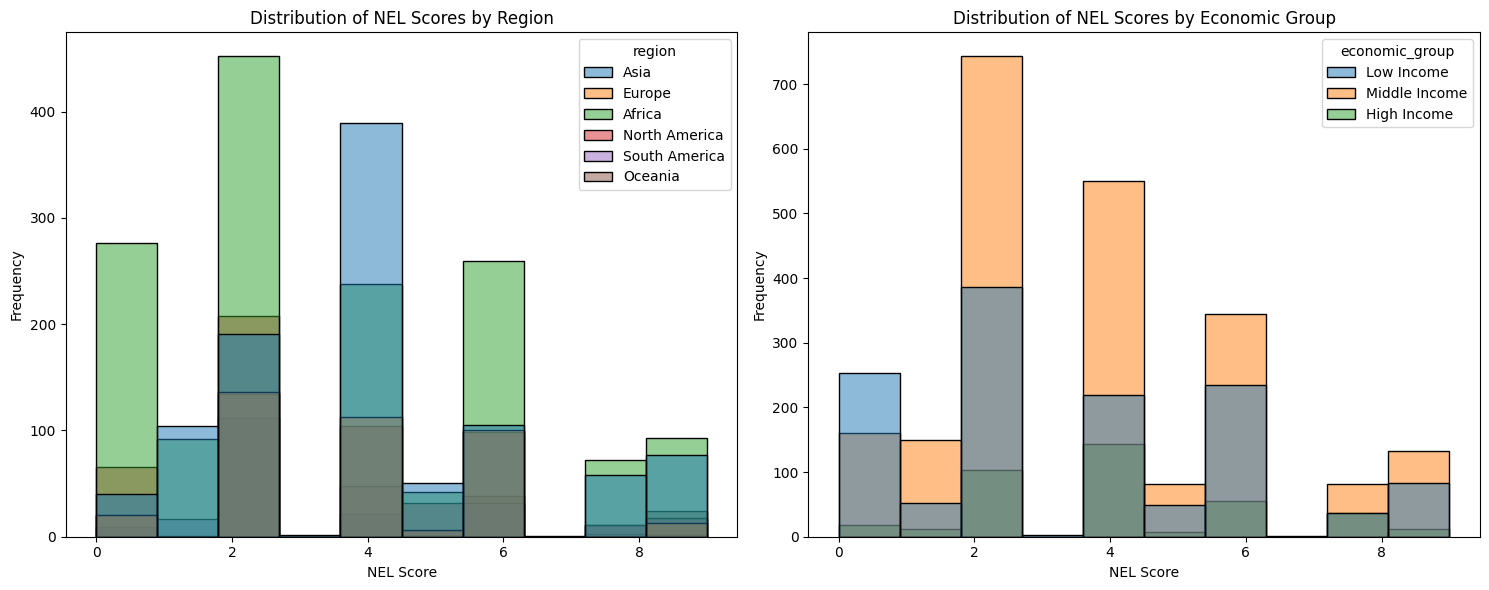

In [300]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # 1 row, 2 columns

# Plot distribution by region
sns.histplot(data=updated_df, x='NEL_Risk_Cluster', hue='region', bins=10, ax=axes[0])
axes[0].set_title('Distribution of NEL Scores by Region')
axes[0].set_xlabel('NEL Score')
axes[0].set_ylabel('Frequency')

# Plot distribution by economic group
sns.histplot(data=updated_df, x='NEL_Risk_Cluster', hue='economic_group', bins=10, ax=axes[1])
axes[1].set_title('Distribution of NEL Scores by Economic Group')
axes[1].set_xlabel('NEL Score')
axes[1].set_ylabel('Frequency')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

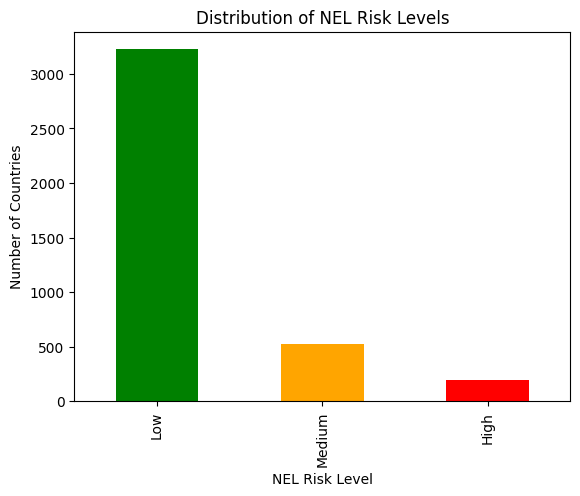

In [301]:
updated_df['NEL_Risk_Level'].value_counts().plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('Distribution of NEL Risk Levels')
plt.xlabel('NEL Risk Level')
plt.ylabel('Number of Countries')
plt.show()


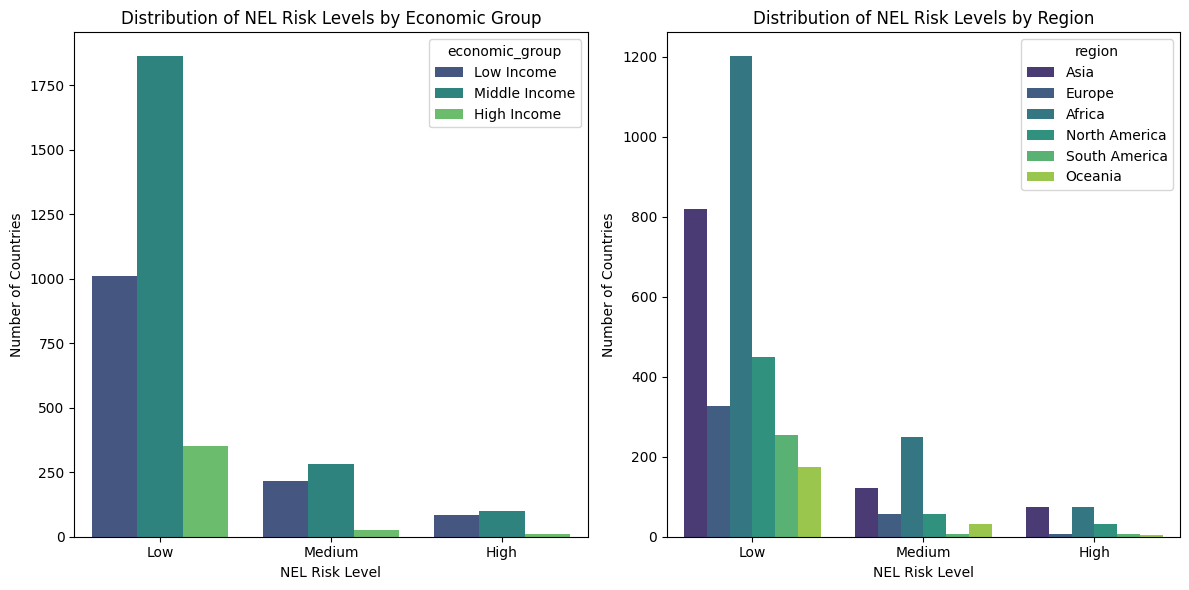

In [302]:
# Create a figure with two subplots arranged horizontally
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Subplot 1: Distribution by economic_group
sns.countplot(
    data=updated_df,
    x='NEL_Risk_Level',
    hue='economic_group',
    palette='viridis',  # Custom colors
    ax=axes[0]  # Plot on the first subplot
)
axes[0].set_title('Distribution of NEL Risk Levels by Economic Group')
axes[0].set_xlabel('NEL Risk Level')
axes[0].set_ylabel('Number of Countries')

# Subplot 2: Distribution by region
sns.countplot(
    data=updated_df,
    x='NEL_Risk_Level',
    hue='region',
    palette='viridis',  # Different color palette for region
    ax=axes[1]  # Plot on the second subplot
)
axes[1].set_title('Distribution of NEL Risk Levels by Region')
axes[1].set_xlabel('NEL Risk Level')
axes[1].set_ylabel('Number of Countries')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

## Integrating Credit Rating Data from S&P below

First, we load the data into a dataframe

In [303]:
credit_rating_data = pd.read_excel('/content/RatingsDirect_16027839_2025_1_6.xls', skiprows=2)
credit_rating_data.head()

Sovereign/date ISO code Foreign currency rating (LT/outlook/ST)  \
0      Abu Dhabi       AE                                     NaN   
1  Jul. 02, 2007      NaN                          AA/Stable/A-1+   
2        Albania       AL                                     NaN   
3  Mar. 22, 2024      NaN                            BB-/Stable/B   
4  Sep. 22, 2023      NaN                           B+/Positive/B   

  Local currency rating (LT/outlook/ST) Country T&C assessment  
0                                   NaN                    NaN  
1                        AA/Stable/A-1+                   AA+*  
2                                   NaN                    NaN  
3                          BB-/Stable/B                    BB+  
4                         B+/Positive/B                     BB

In [304]:
credit_rating_data.shape

(2760, 5)

In [305]:
credit_rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2760 entries, 0 to 2759
Data columns (total 5 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Sovereign/date                           2760 non-null   object
 1   ISO code                                 151 non-null    object
 2   Foreign currency rating (LT/outlook/ST)  2598 non-null   object
 3   Local currency rating (LT/outlook/ST)    2383 non-null   object
 4   Country T&C assessment                   1758 non-null   object
dtypes: object(5)
memory usage: 107.9+ KB


In [306]:
# Step 1: Parse Year from the Date
credit_rating_data['Sovereign'] = credit_rating_data['Sovereign/date'].where(credit_rating_data['ISO code'].notnull()).ffill()
credit_rating_data['Date'] = credit_rating_data['Sovereign/date'].where(credit_rating_data['ISO code'].isnull())
credit_rating_data['Date'] = pd.to_datetime(credit_rating_data['Date'], format='%b. %d, %Y', errors='coerce')
credit_rating_data['Year'] = credit_rating_data['Date'].dt.year

# Step 2: Parse Credit Ratings into Components (LT, Outlook, ST)
credit_rating_data[['Foreign LT', 'Foreign Outlook', 'Foreign ST']] = credit_rating_data['Foreign currency rating (LT/outlook/ST)'].str.split('/', expand=True)
credit_rating_data[['Local LT', 'Local Outlook', 'Local ST']] = credit_rating_data['Local currency rating (LT/outlook/ST)'].str.split('/', expand=True)

# Step 3: Aggregate Ratings to Sovereign-Year Level (Textual Format)
credit_rating_summary = credit_rating_data.groupby(['Sovereign', 'Year']).agg({
    'Foreign LT': 'first',
    'Local LT': 'first',
    'Foreign Outlook': 'first',
    'Local Outlook': 'first',
    'Foreign ST': 'first',
    'Local ST': 'first'
}).reset_index()

# Save and Display Results
credit_rating_summary.to_csv('credit_ratings_textual_format.csv', index=False)
credit_rating_summary


Sovereign    Year Foreign LT Local LT Foreign Outlook Local Outlook  \
0     Abu Dhabi  2007.0         AA       AA          Stable        Stable   
1       Albania  2010.0         B+       B+          Stable        Stable   
2       Albania  2013.0          B        B        Negative      Negative   
3       Albania  2014.0          B        B        Positive      Positive   
4       Albania  2016.0         B+       B+          Stable        Stable   
...         ...     ...        ...      ...             ...           ...   
1852     Zambia  2017.0          B        B          Stable        Stable   
1853     Zambia  2018.0         B-       B-          Stable        Stable   
1854     Zambia  2019.0       CCC+     CCC+          Stable        Stable   
1855     Zambia  2020.0         SD     CCC-              --      Negative   
1856     Zambia  2022.0         SD     CCC+              --        Stable   

     Foreign ST Local ST  
0          A-1+     A-1+  
1             B        B  
2             B        B  
3             B        B  
4             B        B  
...         ...      ...  
1852          B        B  
1853          B        B  
1854          C        C  
1855         SD        C  
1856         SD        C  

[1857 rows x 8 columns]

In [307]:
# Step 1: Parse Year from the Date
credit_rating_data['Sovereign'] = credit_rating_data['Sovereign/date'].where(credit_rating_data['ISO code'].notnull()).ffill()
credit_rating_data['Date'] = credit_rating_data['Sovereign/date'].where(credit_rating_data['ISO code'].isnull())
credit_rating_data['Date'] = pd.to_datetime(credit_rating_data['Date'], format='%b. %d, %Y', errors='coerce')
credit_rating_data['Year'] = credit_rating_data['Date'].dt.year

# Step 2: Parse Credit Ratings into Components (LT, Outlook, ST)
credit_rating_data[['Foreign LT', 'Foreign Outlook', 'Foreign ST']] = credit_rating_data['Foreign currency rating (LT/outlook/ST)'].str.split('/', expand=True)
credit_rating_data[['Local LT', 'Local Outlook', 'Local ST']] = credit_rating_data['Local currency rating (LT/outlook/ST)'].str.split('/', expand=True)

# Step 3: Aggregate Ratings to Sovereign-Year Level (Textual Format)
credit_rating_summary = credit_rating_data.groupby(['Sovereign', 'Year']).agg({
    'Foreign LT': 'first',
    'Local LT': 'first',
    'Foreign Outlook': 'first',
    'Local Outlook': 'first',
    'Foreign ST': 'first',
    'Local ST': 'first'
}).reset_index()

# Save and Display Results
credit_rating_summary.to_csv('credit_ratings_textual_format.csv', index=False)
credit_rating_summary


Sovereign    Year Foreign LT Local LT Foreign Outlook Local Outlook  \
0     Abu Dhabi  2007.0         AA       AA          Stable        Stable   
1       Albania  2010.0         B+       B+          Stable        Stable   
2       Albania  2013.0          B        B        Negative      Negative   
3       Albania  2014.0          B        B        Positive      Positive   
4       Albania  2016.0         B+       B+          Stable        Stable   
...         ...     ...        ...      ...             ...           ...   
1852     Zambia  2017.0          B        B          Stable        Stable   
1853     Zambia  2018.0         B-       B-          Stable        Stable   
1854     Zambia  2019.0       CCC+     CCC+          Stable        Stable   
1855     Zambia  2020.0         SD     CCC-              --      Negative   
1856     Zambia  2022.0         SD     CCC+              --        Stable   

     Foreign ST Local ST  
0          A-1+     A-1+  
1             B        B  
2             B        B  
3             B        B  
4             B        B  
...         ...      ...  
1852          B        B  
1853          B        B  
1854          C        C  
1855         SD        C  
1856         SD        C  

[1857 rows x 8 columns]

In [308]:
credit_rating_summary_cleaned = credit_rating_summary.copy()
credit_rating_summary_cleaned.dropna(inplace = True)

In [309]:
print(updated_df.info())
updated_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3947 entries, 0 to 3946
Data columns (total 61 columns):
 #   Column                                                                            Non-Null Count  Dtype   
---  ------                                                                            --------------  -----   
 0   Country                                                                           3947 non-null   object  
 1   Year                                                                              3947 non-null   int64   
 2   current_account_balance_gdp                                                       3947 non-null   float64 
 3   current_account_balance_usd                                                       3947 non-null   float64 
 4   gov_gross_debt_gdp                                                                3947 non-null   float64 
 5   gov_net_lending_borrowing_gdp                                                     3947 non-null   float6

Country  Year  current_account_balance_gdp  \
0  Afghanistan  2002                       33.908   
1  Afghanistan  2003                       29.616   
2  Afghanistan  2004                       37.216   
3  Afghanistan  2005                       30.226   
4  Afghanistan  2006                       20.844   

   current_account_balance_usd  gov_gross_debt_gdp  \
0                        1.481             345.977   
1                        1.348             270.602   
2                        1.915             244.967   
3                        1.864             206.356   
4                        1.444              22.985   

   gov_net_lending_borrowing_gdp  gov_primary_net_lending_borrowing_gdp  \
0                         -0.098                                 -0.870   
1                         -2.102                                 -0.870   
2                         -2.393                                 -0.870   
3                         -0.917                                 -0.870   
4                          0.684                                  0.724   

   gov_revenue_gdp  gov_total_expenditure_gdp  gdp_ppp_share_world  ...  \
0            6.845                      6.943                0.035  ...   
1            9.826                     11.927                0.037  ...   
2           12.676                     15.069                0.035  ...   
3           14.733                     15.651                0.038  ...   
4           18.946                     18.262                0.038  ...   

   Employment and Labor  Education and Connectivity  \
0             -0.413874                   -1.013611   
1             -0.413632                   -1.006807   
2             -0.413862                   -0.879915   
3             -0.417725                   -0.860721   
4             -0.427698                   -0.823903   

   Government and Institutions  Economic Governance  Fiscal_Deficit_Flag  \
0                    -1.372007            -0.194034                    1   
1                    -1.272669            -0.463798                    1   
2                    -1.182450            -0.497887                    1   
3                    -1.316596            -0.521290                    1   
4                    -1.397630            -0.508826                    0   

   Low_Savings_Flag  Current_Account_Deficit_Flag  NEL_Score  \
0                 0                             0     0.0392   
1                 0                             0     0.8408   
2                 0                             0     0.9572   
3                 0                             0     0.3668   
4                 0                             0     0.0000   

   NEL_Risk_Cluster  NEL_Risk_Level  
0               8.0             Low  
1               8.0             Low  
2               8.0             Low  
3               8.0             Low  
4               8.0             Low  

[5 rows x 61 columns]

In [310]:
print(credit_rating_data_cleaned.info())
credit_rating_data_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1698 entries, 0 to 1856
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sovereign        1698 non-null   object 
 1   Year             1698 non-null   float64
 2   Foreign LT       1698 non-null   object 
 3   Local LT         1698 non-null   object 
 4   Foreign Outlook  1698 non-null   object 
 5   Local Outlook    1698 non-null   object 
 6   Foreign ST       1698 non-null   object 
 7   Local ST         1698 non-null   object 
dtypes: float64(1), object(7)
memory usage: 119.4+ KB
None


Sovereign    Year Foreign LT Local LT Foreign Outlook Local Outlook  \
0  Abu Dhabi  2007.0         AA       AA          Stable        Stable   
1    Albania  2010.0         B+       B+          Stable        Stable   
2    Albania  2013.0          B        B        Negative      Negative   
3    Albania  2014.0          B        B        Positive      Positive   
4    Albania  2016.0         B+       B+          Stable        Stable   

  Foreign ST Local ST  
0       A-1+     A-1+  
1          B        B  
2          B        B  
3          B        B  
4          B        B

In [311]:
from nltk.metrics import edit_distance

# Step 1: Calculate Edit Distances
def calculate_edit_distances(primary, secondary, threshold=0):
    """
    Calculate edit distances between two lists of names.
    Args:
        primary: List of names from the primary dataset (e.g., `updated_df`).
        secondary: List of names to match against (e.g., `credit_rating_summary_cleaned`).
        threshold: Maximum edit distance for a match to be considered high-confidence.
    Returns:
        low_confidence_matches: DataFrame of countries with high edit distances.
        mapping_dict: Dictionary of low edit distance matches.
    """
    low_confidence_matches = []
    mapping_dict = {}

    for name in primary:
        distances = [(candidate, edit_distance(name, candidate)) for candidate in secondary]
        best_match, best_distance = min(distances, key=lambda x: x[1])

        if best_distance > threshold:
            low_confidence_matches.append({'Name': name, 'Match': best_match, 'Edit Distance': best_distance})
        else:
            mapping_dict[name] = best_match

    return pd.DataFrame(low_confidence_matches), mapping_dict

# Extract unique country names
primary_names = updated_df['Country'].unique()
secondary_names = credit_rating_summary_cleaned['Sovereign'].unique()

# Perform edit distance matching
low_confidence_matches, mapping_dict = calculate_edit_distances(primary_names, secondary_names)

# Save low-confidence matches for manual review
low_confidence_matches.to_csv('low_confidence_edit_distance.csv', index=False)
print("Low-confidence matches saved to 'low_confidence_edit_distance.csv'. Review and update.")
low_confidence_matches

Low-confidence matches saved to 'low_confidence_edit_distance.csv'. Review and update.


Name                                   Match  \
0                        Afghanistan                                Pakistan   
1                            Algeria                                 Nigeria   
2                Antigua and Barbuda                     Trinidad and Tobago   
3                             Bhutan                                   Aruba   
4                            Burundi                                 Bermuda   
5                         Cabo Verde                              Cape Verde   
6           Central African Republic                      Dominican Republic   
7                            Comoros                                Cameroon   
8                      Côte d'Ivoire                           Cote d’Ivoire   
9   Democratic Republic of the Congo  Congo (the Democratic Republic of the)   
10                          Djibouti                                Cambodia   
11                          Dominica                                 Romania   
12                 Equatorial Guinea                        Papua New Guinea   
13                           Eritrea                                 Austria   
14                          Eswatini                                 Estonia   
15                            Guinea                                   China   
16                     Guinea-Bissau                                 Tunisia   
17                            Guyana                                   Ghana   
18                             Haiti                                    Fiji   
19          Islamic Republic of Iran                             Isle of Man   
20                            Kosovo                                 Morocco   
21                   Kyrgyz Republic                          Czech Republic   
22                        Lao P.D.R.                                  Latvia   
23                           Lesotho                                 Lebanon   
24                           Liberia                                 Nigeria   
25                            Malawi                                    Mali   
26                          Maldives                                    Mali   
27                        Mauritania                               Mauritius   
28                        Micronesia                               Indonesia   
29                           Moldova                                 Bolivia   
30                           Myanmar                                 Denmark   
31                           Namibia                                  Zambia   
32                             Nepal                                   Japan   
33                             Niger                                 Nigeria   
34                 Republic of Congo                             Isle of Man   
35                             Samoa                                   Gabon   
36                      Sierra Leone                               Singapore   
37                   Slovak Republic                          Czech Republic   
38                   Solomon Islands                            Cook Islands   
39                           Somalia                                 Romania   
40                       South Sudan                            South Africa   
41               St. Kitts and Nevis                            Cook Islands   
42                         St. Lucia                               Sri Lanka   
43    St. Vincent and the Grenadines                  Bosnia and Herzegovina   
44                             Sudan                                   Japan   
45                             Syria                                  Serbia   
46             São Tomé and Príncipe                  Bosnia and Herzegovina   
47          Taiwan Province of China                        Papua New Guinea   
48                          Tanzania                                 Albania   
49                       The Bah

In [312]:
countries_to_drop = low_confidence_matches['Match'].tolist()

In [313]:
countries_to_drop = [country for country in countries_to_drop if country not in ["Cape Verde", "Congo (the Democratic Republic of the)", "Turkiye"]]
credit_rating_summary_cleaned_updated = credit_rating_summary_cleaned[~credit_rating_summary_cleaned['Sovereign'].isin(countries_to_drop)]


In [314]:
# Rename specific countries in the 'Sovereign' column
replacements = {
    "Cape Verde": "Cabo Verde",
    "Congo (the Democratic Republic of the)": "Democratic Republic of the Congo",
    "Turkiye": "Türkiye"
}
credit_rating_summary_cleaned_updated['Sovereign'].replace(replacements, inplace=True)

<ipython-input-314-e293a3b1b57f>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  credit_rating_summary_cleaned_updated['Sovereign'].replace(replacements, inplace=True)
<ipython-input-314-e293a3b1b57f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_rating_summary_cleaned_updated['Sovereign'].replace(replacements, inplace=True)


In [315]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3947 entries, 0 to 3946
Data columns (total 61 columns):
 #   Column                                                                            Non-Null Count  Dtype   
---  ------                                                                            --------------  -----   
 0   Country                                                                           3947 non-null   object  
 1   Year                                                                              3947 non-null   int64   
 2   current_account_balance_gdp                                                       3947 non-null   float64 
 3   current_account_balance_usd                                                       3947 non-null   float64 
 4   gov_gross_debt_gdp                                                                3947 non-null   float64 
 5   gov_net_lending_borrowing_gdp                                                     3947 non-null   float6

In [316]:
# Extract unique country names
primary_names = updated_df['Country'].unique()
secondary_names = credit_rating_summary_cleaned_updated['Sovereign'].unique()

# Perform edit distance matching
low_confidence_matches, mapping_dict = calculate_edit_distances(primary_names, secondary_names)

# Save low-confidence matches for manual review
low_confidence_matches.to_csv('low_confidence_edit_distance.csv', index=False)
print("Low-confidence matches saved to 'low_confidence_edit_distance.csv'. Review and update.")
low_confidence_matches

Low-confidence matches saved to 'low_confidence_edit_distance.csv'. Review and update.


Name         Match  Edit Distance
0           Afghanistan    Kazakhstan              6
1               Albania      Bulgaria              4
2               Algeria      Bulgaria              3
3   Antigua and Barbuda     Abu Dhabi             14
4               Armenia     Argentina              3
..                  ...           ...            ...
81              Vanuatu        Panama              4
82   West Bank and Gaza  Burkina Faso             13
83                Yemen          Oman              3
84               Zambia       Jamaica              3
85             Zimbabwe      Barbados              6

[86 rows x 3 columns]

Below we clean up the dataframe for userbility and deal with duplicates

In [317]:
# Step 1: Ensure Year compatibility
updated_df['Year'] = updated_df['Year'].astype(int)
credit_rating_summary_cleaned_updated['Year'] = credit_rating_summary_cleaned_updated['Year'].astype(int)

# Step 2: Apply the final mapping
updated_df['Mapped Sovereign'] = updated_df['Country'].map(mapping_dict)

# Step 3: Merge the datasets
merged_df = pd.merge(
    updated_df,
    credit_rating_summary_cleaned_updated,
    left_on=['Mapped Sovereign', 'Year'],
    right_on=['Sovereign', 'Year'],
    how='left'  # Retain all rows from updated_df
)

# Step 4: Save the merged dataset
merged_df.to_csv('final_merged_dataset.csv', index=False)
print("Final merged dataset saved to 'final_merged_dataset.csv'.")

# Display a sample of the merged dataset
merged_df

<ipython-input-317-4059d1dfcd01>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_rating_summary_cleaned_updated['Year'] = credit_rating_summary_cleaned_updated['Year'].astype(int)


Final merged dataset saved to 'final_merged_dataset.csv'.


Country  Year  current_account_balance_gdp  \
0     Afghanistan  2002                       33.908   
1     Afghanistan  2003                       29.616   
2     Afghanistan  2004                       37.216   
3     Afghanistan  2005                       30.226   
4     Afghanistan  2006                       20.844   
...           ...   ...                          ...   
3942     Zimbabwe  2025                        0.982   
3943     Zimbabwe  2026                        1.113   
3944     Zimbabwe  2027                        1.242   
3945     Zimbabwe  2028                        1.371   
3946     Zimbabwe  2029                        1.133   

      current_account_balance_usd  gov_gross_debt_gdp  \
0                           1.481             345.977   
1                           1.348             270.602   
2                           1.915             244.967   
3                           1.864             206.356   
4                           1.444              22.985   
...                           ...                 ...   
3942                        0.347              86.801   
3943                        0.405              80.413   
3944                        0.466              73.896   
3945                        0.531              69.798   
3946                        0.452              70.575   

      gov_net_lending_borrowing_gdp  gov_primary_net_lending_borrowing_gdp  \
0                            -0.098                                 -0.870   
1                            -2.102                                 -0.870   
2                            -2.393                                 -0.870   
3                            -0.917                                 -0.870   
4                             0.684                                  0.724   
...                             ...                                    ...   
3942                         -9.784                                 -9.547   
3943                         -9.727                                 -9.550   
3944                         -9.784                                 -9.629   
3945                         -9.804                                 -9.629   
3946                         -9.734                                 -9.602   

      gov_revenue_gdp  gov_total_expenditure_gdp  gdp_ppp_share_world  ...  \
0               6.845                      6.943                0.035  ...   
1               9.826                     11.927                0.037  ...   
2              12.676                     15.069                0.035  ...   
3              14.733                     15.651                0.038  ...   
4              18.946                     18.262                0.038  ...   
...               ...                        ...                  ...  ...   
3942           16.465                     26.249                0.026  ...   
3943           16.462                     26.189                0.026  ...   
3944           16.380                     26.165                0.026  ...   
3945           16.381                     26.185                0.026  ...   
3946           16.407                     26.141                0.026  ...   

      NEL_Risk_Cluster  NEL_Risk_Level  Mapped Sovereign  Sovereign  \
0                  8.0             Low               NaN        NaN   
1                  8.0             Low               NaN        NaN   
2                  8.0             Low               NaN        NaN   
3                  8.0             Low               NaN        NaN   
4                  8.0             Low               NaN        NaN   
...                ...             ...               ...        ...   
3942               2.0             Low               NaN        NaN   
3943               2.0             Low               NaN        NaN   
3944               2.0             Low               NaN        NaN   
3945               2.0             Low               NaN        NaN 

In [318]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3947 entries, 0 to 3946
Data columns (total 69 columns):
 #   Column                                                                            Non-Null Count  Dtype   
---  ------                                                                            --------------  -----   
 0   Country                                                                           3947 non-null   object  
 1   Year                                                                              3947 non-null   int64   
 2   current_account_balance_gdp                                                       3947 non-null   float64 
 3   current_account_balance_usd                                                       3947 non-null   float64 
 4   gov_gross_debt_gdp                                                                3947 non-null   float64 
 5   gov_net_lending_borrowing_gdp                                                     3947 non-null   float6

In [319]:
merged_df.columns

Index(['Country', 'Year', 'current_account_balance_gdp',
       'current_account_balance_usd', 'gov_gross_debt_gdp',
       'gov_net_lending_borrowing_gdp',
       'gov_primary_net_lending_borrowing_gdp', 'gov_revenue_gdp',
       'gov_total_expenditure_gdp', 'gdp_ppp_share_world',
       'gdp_constant_prices_pct_change', 'gdp_current_ppp', 'gdp_current_usd',
       'gdp_deflator', 'gross_national_savings_gdp',
       'implied_ppp_conversion_rate', 'inflation_avg_cpi',
       'inflation_avg_cpi_pct_change', 'inflation_end_cpi',
       'inflation_end_cpi_pct_change', 'population_millions',
       'total_investment_gdp', 'imports_goods_pct_change',
       'exports_goods_pct_change', 'exports_goods_services_pct_change',
       'imports_goods_services_pct_change', 'region', 'gdp_per_capita_usd',
       'economic_group', 'Adjusted_savings:_energy_depletion_(%_of_GNI)',
       'Age_dependency_ratio_(%_of_working-age_population)',
       'Current_health_expenditure_(%_of_GDP)',
       'Indust

In [320]:
columns_to_drop = ['Energy and Emissions','Natural Resources and Land Use', 'Water and Agriculture',
       'Health and Demographics', 'Employment and Labor',
       'Education and Connectivity', 'Government and Institutions',
       'Economic Governance', 'Fiscal_Deficit_Flag', 'Low_Savings_Flag',
       'Current_Account_Deficit_Flag', 'NEL_Score', 'NEL_Risk_Cluster',
       'NEL_Risk_Level']
full_dataset = merged_df.drop(columns_to_drop, axis =1).dropna()

In [321]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 546 entries, 91 to 3825
Data columns (total 55 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   Country                                                                           546 non-null    object 
 1   Year                                                                              546 non-null    int64  
 2   current_account_balance_gdp                                                       546 non-null    float64
 3   current_account_balance_usd                                                       546 non-null    float64
 4   gov_gross_debt_gdp                                                                546 non-null    float64
 5   gov_net_lending_borrowing_gdp                                                     546 non-null    float64
 6   gov_p

In [322]:
# Check for exact matches
exact_matches = full_dataset[full_dataset['Mapped Sovereign'] == full_dataset['Country']]

# Identify mismatches
mismatches = full_dataset[full_dataset['Mapped Sovereign'] != full_dataset['Country']]

# Summarize the comparison
total_rows = len(full_dataset)
matched_count = len(exact_matches)
mismatched_count = len(mismatches)

summary = {
    "Total Rows": total_rows,
    "Matched Rows": matched_count,
    "Mismatched Rows": mismatched_count,
    "Match Percentage": (matched_count / total_rows) * 100,
    "Mismatch Percentage": (mismatched_count / total_rows) * 100,
}



# Output the summary
print("Comparison Summary:")
print(summary)

# Display sample mismatches
print("\nSample Mismatches:")
mismatches


Comparison Summary:
{'Total Rows': 546, 'Matched Rows': 546, 'Mismatched Rows': 0, 'Match Percentage': 100.0, 'Mismatch Percentage': 0.0}

Sample Mismatches:


Empty DataFrame
Columns: [Country, Year, current_account_balance_gdp, current_account_balance_usd, gov_gross_debt_gdp, gov_net_lending_borrowing_gdp, gov_primary_net_lending_borrowing_gdp, gov_revenue_gdp, gov_total_expenditure_gdp, gdp_ppp_share_world, gdp_constant_prices_pct_change, gdp_current_ppp, gdp_current_usd, gdp_deflator, gross_national_savings_gdp, implied_ppp_conversion_rate, inflation_avg_cpi, inflation_avg_cpi_pct_change, inflation_end_cpi, inflation_end_cpi_pct_change, population_millions, total_investment_gdp, imports_goods_pct_change, exports_goods_pct_change, exports_goods_services_pct_change, imports_goods_services_pct_change, region, gdp_per_capita_usd, economic_group, Adjusted_savings:_energy_depletion_(%_of_GNI), Age_dependency_ratio_(%_of_working-age_population), Current_health_expenditure_(%_of_GDP), Industry_(including_construction),_value_added_(%_of_GDP), Labor_force_participation_rate_for_ages_15-24,_female_(%)_(modeled_ILO_estimate), Labor_force_participation_rate_for_ages_15-24,_total_(%)_(modeled_ILO_estimate), Labor_force,_female_(%_of_total_labor_force), Land_area_(sq._km), Life_expectancy_at_birth,_total_(years), Manufacturing,_value_added_(%_of_GDP), Net_domestic_credit_(current_LCU), Net_migration, Personal_remittances,_received_(%_of_GDP), Population_growth_(annual_%), Population,_female_(%_of_total_population), Population,_male_(%_of_total_population), Rural_population_(%_of_total_population), Services,_value_added_(%_of_GDP), Mapped Sovereign, Sovereign, Foreign LT, Local LT, Foreign Outlook, Local Outlook, Foreign ST, Local ST]
Index: []

[0 rows x 55 columns]

In [209]:
full_dataset.to_csv('full_dataset.csv', index=False)

Next, we match country names in our IMF data to the S&P data using Levenshtein string matching and deal with exceptions manually

Below, we match the relevant credit rating period to actual years. This is important for when we aggregate the imf_data_renamed and credit_rating_data_cleaned

We can finally merge the two datasets below

### Insights from NEL Score vs Credit Rating Charts

#### NEL Score vs Credit Rating by Region
1. **Regional Trends**:
   - **Africa** and **Oceania**:
     - Generally, countries with higher NEL Scores (e.g., >10) are associated with lower credit ratings (e.g., `CCC`, `CC`, or `SD`).
     - This indicates higher NEL risks (fiscal deficits, low savings, current account deficits) correlate with poor creditworthiness.
   - **Europe** and **Asia**:
     - Countries in these regions tend to have lower NEL Scores (<5), often associated with higher credit ratings (e.g., `AA`, `AAA`).
     - Suggests that stronger fiscal and economic positions are reflected in their better credit standings.

2. **Correlation Between NEL Score and Credit Ratings**:
   - A clear inverse relationship exists:
     - Higher NEL Scores align with weaker credit ratings.
     - Lower NEL Scores (<5) align with stronger credit ratings (investment-grade levels: `BBB` and above).

3. **Outliers**:
   - Certain countries with low NEL Scores (<5) still have poor credit ratings (`CCC` or below), possibly due to non-economic factors like political instability or past defaults.



<ipython-input-40-7db3b2fb7056>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_previous_ratings['Previous_Credit_Rating_Score'] = filtered_previous_ratings['Credit_Rating'].map(credit_rating_order)
<ipython-input-40-7db3b2fb7056>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_previous_ratings['Previous_Credit_Rating_Score'] = filtered_previous_ratings['Credit_Rating'].map(credit_rating_order)
<ipython-input-40-7db3b2fb7056>:10: SettingWithCopyWarning: 
A value is trying to be set on 

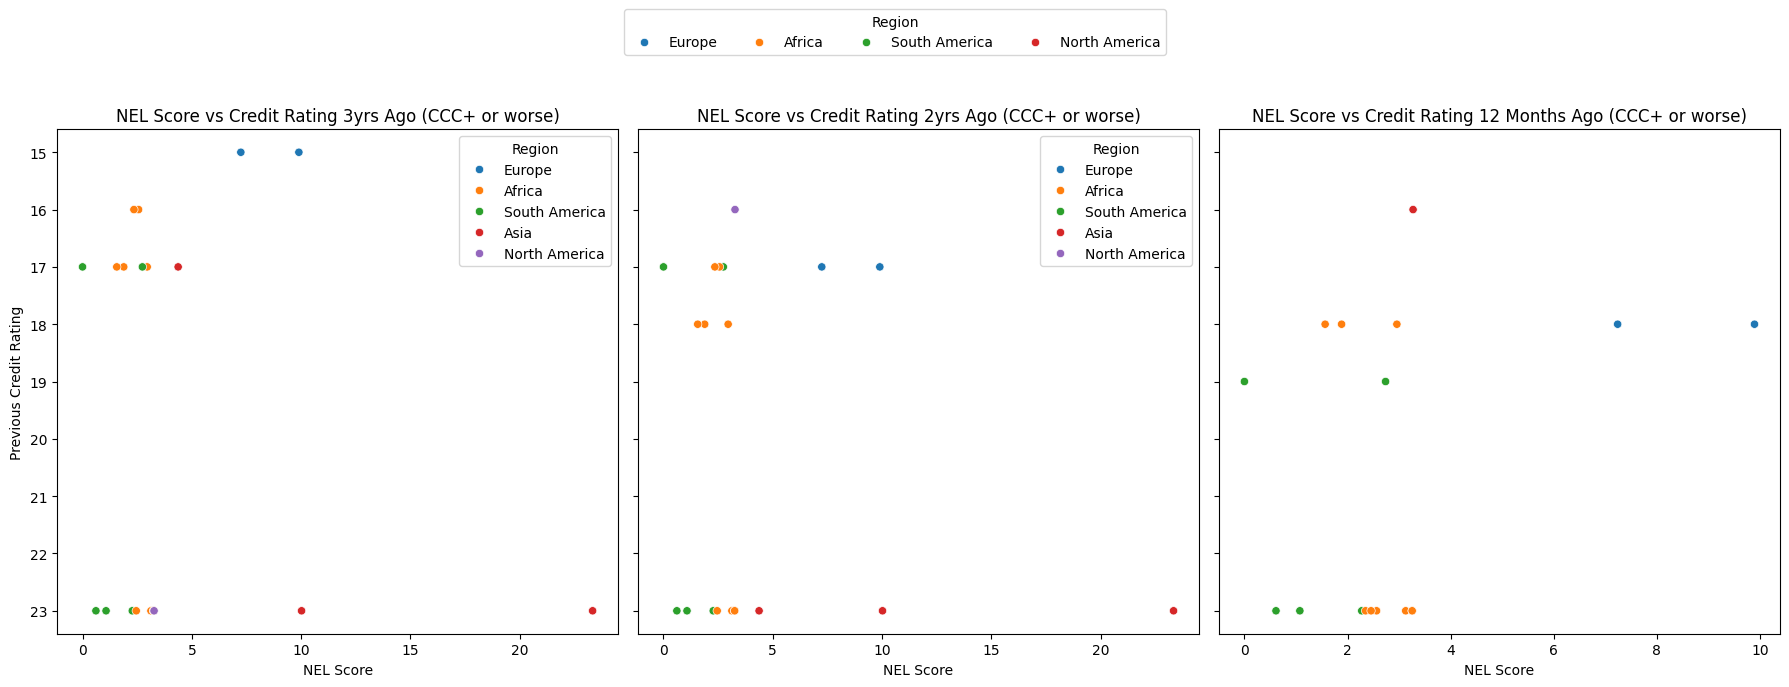

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to prepare the filtered dataset for each time period
def prepare_filtered_data(time_period, combined_data, credit_rating_order):
    # Filter data for the specific time period
    filtered_previous_ratings = combined_data[combined_data['Rating_Time_Period'].str.contains(time_period)]

    # Map credit ratings to numerical scores
    filtered_previous_ratings['Previous_Credit_Rating_Score'] = filtered_previous_ratings['Credit_Rating'].map(credit_rating_order)

    # Filter for countries with current ratings worse than 'CCC+'
    filtered_worse_ratings = combined_data[combined_data['Credit_Rating_Score'] > 17]

    # Merge current and previous data to align NEL Score with previous ratings
    filtered_combined = pd.merge(
        filtered_worse_ratings[['Country', 'NEL_Score', 'Region']],
        filtered_previous_ratings[['Country', 'Previous_Credit_Rating_Score']],
        on='Country',
        how='inner'
    )
    return filtered_combined

# Prepare data for each time period
data_3yrs = prepare_filtered_data("3 Years Ago", combined_data, credit_rating_order)
data_2yrs = prepare_filtered_data("2 Years Ago", combined_data, credit_rating_order)
data_1yr = prepare_filtered_data("12 Months Ago", combined_data, credit_rating_order)

# Create a figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Chart 1: NEL Score vs Credit Rating (3 Years Ago)
sns.scatterplot(
    data=data_3yrs,
    x='NEL_Score',
    y='Previous_Credit_Rating_Score',
    hue='Region',
    palette='tab10',
    ax=axes[0]
)
axes[0].set_title('NEL Score vs Credit Rating 3yrs Ago (CCC+ or worse)')
axes[0].set_xlabel('NEL Score')
axes[0].set_ylabel('Previous Credit Rating')
axes[0].invert_yaxis()

# Chart 2: NEL Score vs Credit Rating (2 Years Ago)
sns.scatterplot(
    data=data_2yrs,
    x='NEL_Score',
    y='Previous_Credit_Rating_Score',
    hue='Region',
    palette='tab10',
    ax=axes[1]
)
axes[1].set_title('NEL Score vs Credit Rating 2yrs Ago (CCC+ or worse)')
axes[1].set_xlabel('NEL Score')
axes[1].set_ylabel('')  # Shared y-axis

# Chart 3: NEL Score vs Credit Rating (12 Months Ago)
sns.scatterplot(
    data=data_1yr,
    x='NEL_Score',
    y='Previous_Credit_Rating_Score',
    hue='Region',
    palette='tab10',
    ax=axes[2]
)
axes[2].set_title('NEL Score vs Credit Rating 12 Months Ago (CCC+ or worse)')
axes[2].set_xlabel('NEL Score')
axes[2].set_ylabel('')  # Shared y-axis

# Adjust the legend position
handles, labels = axes[2].get_legend_handles_labels()  # Get legend from the last plot
fig.legend(handles, labels, loc='lower center', ncol=6, title="Region", bbox_to_anchor=(0.5, 1.05))
axes[2].get_legend().remove()  # Remove legends from individual subplots

# Tight layout for spacing
plt.tight_layout()
plt.show()


#### Insights from Aggregated NEL Score vs Credit Rating by Region

#### Key Observations

#### 1. **Three Years Ago**
   - **Regional Spread**:
     - Most countries with poor credit ratings (`CCC+` or worse) already exhibited moderate to high NEL Scores (5–10).
     - Regions like **Africa**, **South America**, and **Europe** dominate this range, indicating persistent vulnerabilities in fiscal and external metrics.
   - **Outliers**:
     - A few countries with very low NEL Scores (<2) had `SD` ratings, suggesting that external shocks or non-NEL factors (e.g., political instability, debt defaults) contributed significantly to downgrades.

#### 2. **Two Years Ago**
   - **Progression of NEL Risks**:
     - For most regions, the clustering of NEL Scores and poor credit ratings remained consistent with the patterns observed three years ago, highlighting the persistence of fiscal risks.
   - **Notable Regions**:
     - **North America** appears in the analysis, indicating worsening NEL risks during this period, especially for countries with high scores (>10).
   - **Tight Clusters**:
     - **Africa** and **South America** exhibit tight clusters of countries with moderate NEL Scores (2–5) and credit ratings around `CCC`.

#### 3. **Twelve Months Ago**
   - **Worsening Fiscal Positions**:
     - Higher NEL Scores (>8) correspond to extremely poor credit ratings (`CCC` or `SD`), suggesting a lagged impact of fiscal and external vulnerabilities on creditworthiness.
   - **New Risks in Asia**:
     - **Asia** emerges more prominently in the last 12 months, showing increased fiscal stress for countries with moderate NEL Scores (~5).

---

## Temporal Patterns and Regional Insights
1. **Persistence of NEL Risks**:
   - Countries with poor credit ratings consistently exhibit moderate to high NEL Scores over time, indicating the long-term effects of fiscal and external imbalances.

2. **Lagged Relationship**:
   - Higher NEL Scores from earlier years often correspond to deteriorating credit ratings in subsequent years, supporting the predictive value of NEL metrics.

3. **Regional Vulnerabilities**:
   - **Africa** and **South America** show consistent clustering of countries with moderate NEL Scores and poor ratings, indicating systemic challenges.
   - **Asia** and **North America** appear intermittently, reflecting emerging or transient fiscal pressures.




<ipython-input-41-f0ec3cc3268e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  africa_data['Credit_Rating_Score'] = africa_data['Credit_Rating'].map(credit_rating_order)


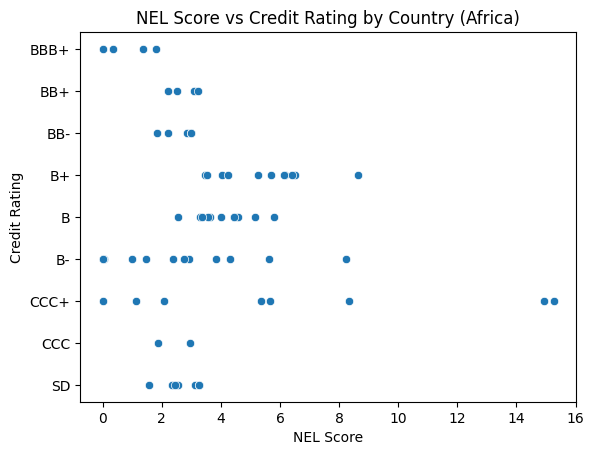

In [ ]:
# Define a mapping for credit ratings to numerical values for sorting
credit_rating_order = {
    'AAA': 1, 'AA+': 2, 'AA': 3, 'AA-': 4,
    'A+': 5, 'A': 6, 'A-': 7,
    'BBB+': 8, 'BBB': 9, 'BBB-': 10,
    'BB+': 11, 'BB': 12, 'BB-': 13,
    'B+': 14, 'B': 15, 'B-': 16,
    'CCC+': 17, 'CCC': 18, 'CCC-': 19,
    'CC': 20, 'C': 21, 'D': 22, 'SD': 23
}

africa_data = combined_data[combined_data['Region'] == 'Africa']
# Map credit ratings to their corresponding numerical values
africa_data['Credit_Rating_Score'] = africa_data['Credit_Rating'].map(credit_rating_order)

# Sort data by Credit_Rating_Score
africa_data = africa_data.sort_values(by='Credit_Rating_Score', ascending=True)

# Plot the sorted scatter plot
sns.scatterplot(
    data=africa_data,
    x='NEL_Score',
    y='Credit_Rating',
    #hue='Country',
    #palette='tab10'
)
plt.title('NEL Score vs Credit Rating by Country (Africa)')
plt.xlabel('NEL Score')
plt.ylabel('Credit Rating')
#plt.legend(title='Country')
plt.show()



#### NEL Score vs Credit Rating (Africa Only)
1. **Key Observations for Africa**:
   - Most African countries cluster around NEL Scores between 3 and 8, with credit ratings ranging from `B+` to `CCC-`.
   - Countries with higher NEL Scores (>10) are almost exclusively in the `CCC` or `SD` rating categories, signaling extreme fiscal and external vulnerabilities.

2. **Spread of Ratings**:
   - African countries rarely achieve investment-grade ratings (`BBB+` or higher), even with lower NEL Scores.
   - Indicates that other structural challenges (e.g., governance, policy effectiveness) might hinder creditworthiness.

3. **Implications**:
   - For Africa, reducing NEL risks (e.g., improving savings, reducing fiscal deficits) could help countries avoid speculative-grade ratings (`B-` and below).
   - However, broader reforms beyond NEL-related metrics are likely required to move toward investment-grade ratings.

---


## Implications for Early Warning Systems (EWS)
- The persistent relationship between NEL Scores and worsening credit ratings reinforces the utility of NEL as a key indicator in EWS frameworks.
- Combining NEL with other structural and political risk metrics can improve predictive accuracy for sovereign defaults or downgrades.
---



## 2. Sovereign Debt Sustainability

Understanding the fiscal health of a sovereign state is crucial for assessing its debt sustainability. The following fiscal indicators provide insights into various aspects of fiscal performance and are aligned with the S&P framework:

#### a. Debt_to_GDP
**Definition:**  
Measures the level of fiscal strain and reliance on borrowing by comparing gross government debt to the country's GDP. A higher ratio indicates greater fiscal stress and potentially lower sustainability.

**Purpose and Relevance:**  
Debt-to-GDP highlights the extent of a government's indebtedness relative to the size of its economy. This ratio is a key metric for determining a country's ability to service its debt without compromising economic growth.



#### b. Primary_Deficit_to_GDP
**Definition:**  
Reflects the fiscal balance, excluding interest payments, by comparing net lending/borrowing to GDP. A negative ratio indicates a primary deficit, while a positive ratio suggests a surplus.

**Purpose and Relevance:**  
This indicator emphasizes the structural aspects of fiscal policy by isolating the government's operational fiscal position from debt servicing costs. It is essential for evaluating whether fiscal policies are sustainable over the long term.



#### c. Expenditure_to_GDP
**Definition:**  
Represents the ratio of total government expenditure to GDP, providing insights into the size and scale of government activity relative to the economy.

**Purpose and Relevance:**  
Expenditure-to-GDP serves as a proxy for potential overexpenditure and fiscal imbalances. Higher values may signal excessive government spending, often necessitating fiscal adjustments or reforms.


In [ ]:
# Calculate 3-Year Averages for Key Metrics
# Ensure no division by zero issues or NaN values
combined_data['Primary_Deficit_3_Year_Avg'] = (
    combined_data.groupby('Country')['gov_net_lending_borrowing_gdp']
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

combined_data['Debt_to_GDP_3_Year_Avg'] = (
    combined_data.groupby('Country')['Govt_Gross_Debt_Percent_GDP']
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

# Trends for Debt-to-GDP and Primary Deficit
combined_data['Debt_to_GDP_Trend'] = combined_data['Debt_to_GDP_3_Year_Avg'] - combined_data['Govt_Gross_Debt_Percent_GDP']
combined_data['Primary_Deficit_Trend'] = combined_data['Primary_Deficit_3_Year_Avg'] - combined_data['gov_net_lending_borrowing_gdp']

# Calculate Fiscal Risk Index
combined_data['Fiscal_Risk_Index'] = (
    0.6 * combined_data['Govt_Gross_Debt_Percent_GDP'] +   # Weight for Debt-to-GDP
    0.3 * combined_data['Primary_Deficit_3_Year_Avg'] +    # Weight for Primary Deficit
    0.1 * combined_data['Debt_to_GDP_Trend']              # Weight for Debt-to-GDP Trend
)

# Normalize Fiscal Risk Index between 0 and 100
combined_data['Fiscal_Risk_Index'] = (
    (combined_data['Fiscal_Risk_Index'] - combined_data['Fiscal_Risk_Index'].min()) /
    (combined_data['Fiscal_Risk_Index'].max() - combined_data['Fiscal_Risk_Index'].min())
) * 100

# Additional features related to fiscal risk
# Debt Risk Level based on Debt-to-GDP thresholds
def classify_debt_risk(debt_to_gdp):
    if debt_to_gdp >= 100:
        return 'High'
    elif 60 <= debt_to_gdp < 100:
        return 'Medium'
    else:
        return 'Low'

combined_data['Debt_Risk_Level'] = combined_data['Govt_Gross_Debt_Percent_GDP'].apply(classify_debt_risk)

# Simulate a Debt Shock as 10% of the current Govt_Gross_Debt_Percent_GDP
combined_data['Debt_Shock'] = 0.1 * combined_data['Govt_Gross_Debt_Percent_GDP']

# Handle any missing or invalid values
combined_data['Debt_Shock'].fillna(0, inplace=True)


# Simulate Shocks in Fiscal Risk Index (e.g., Debt Shocks)
combined_data['Fiscal_Risk_Index_Shock'] = (
    combined_data['Fiscal_Risk_Index'] + 0.1 * combined_data['Debt_Shock']
)

# Handle any missing values created during transformations
for column in combined_data.select_dtypes(include=np.number):
    combined_data[column].fillna(0, inplace=True)


<ipython-input-45-b68d04f16edb>:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data['Debt_Shock'].fillna(0, inplace=True)
<ipython-input-45-b68d04f16edb>:56: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

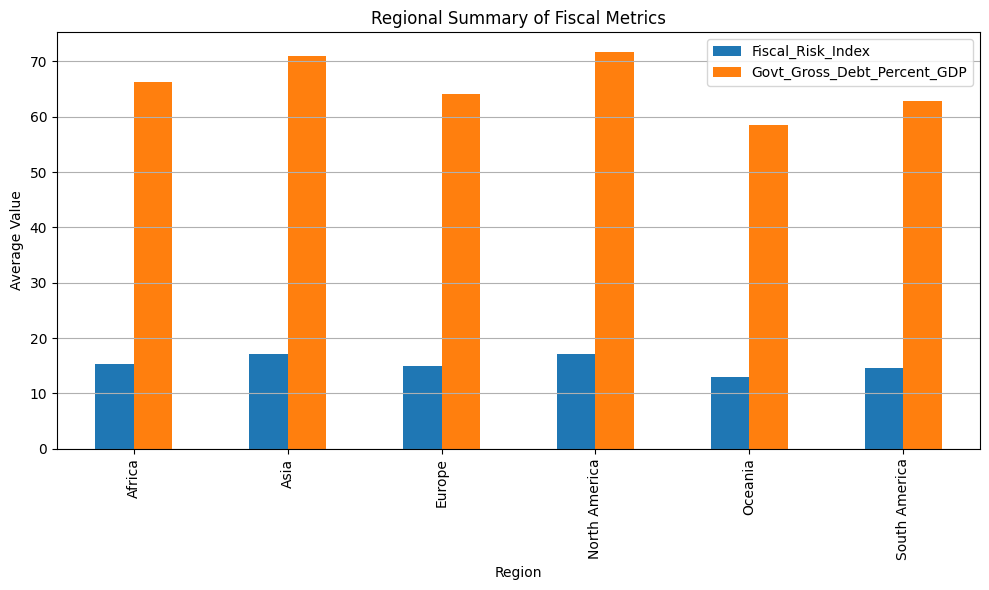

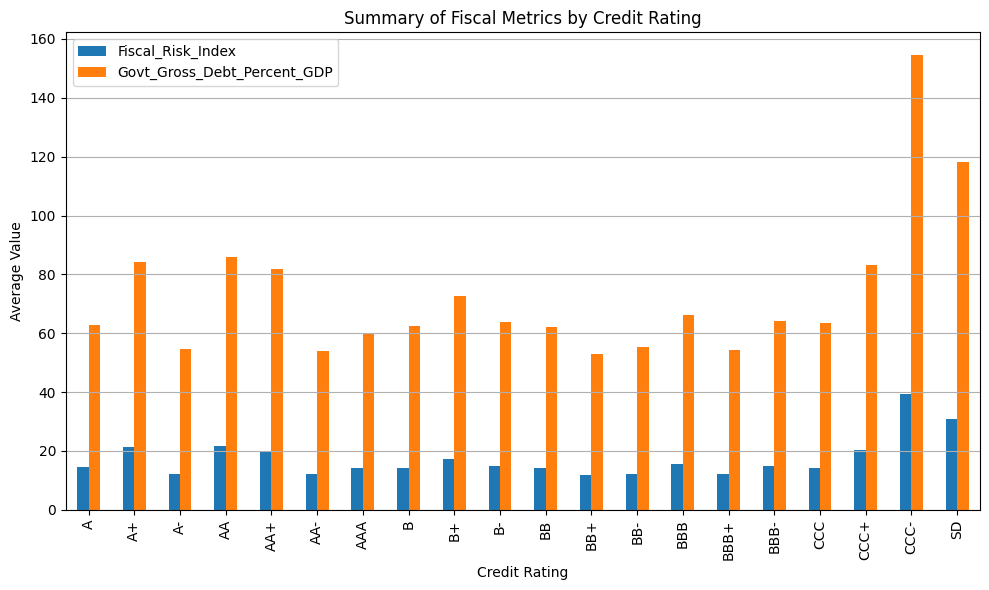

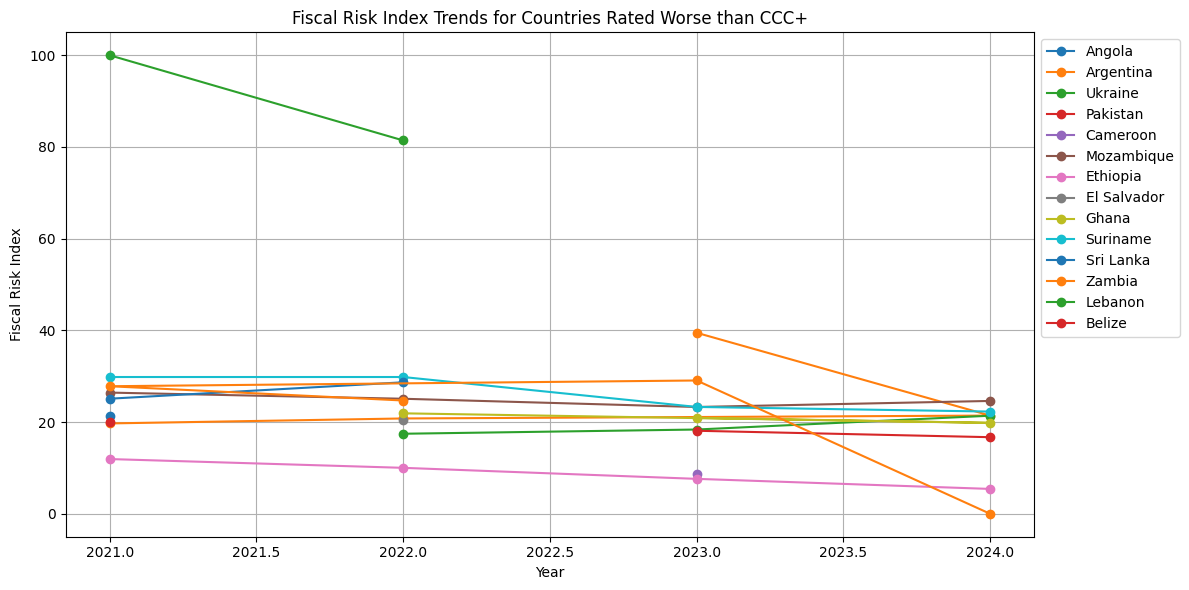

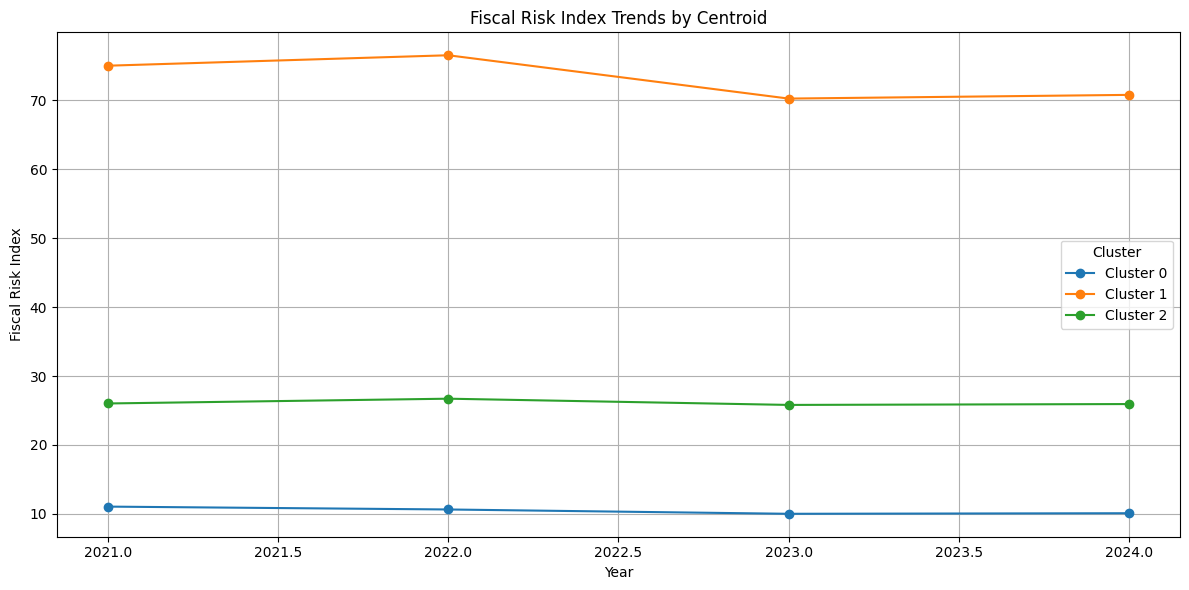

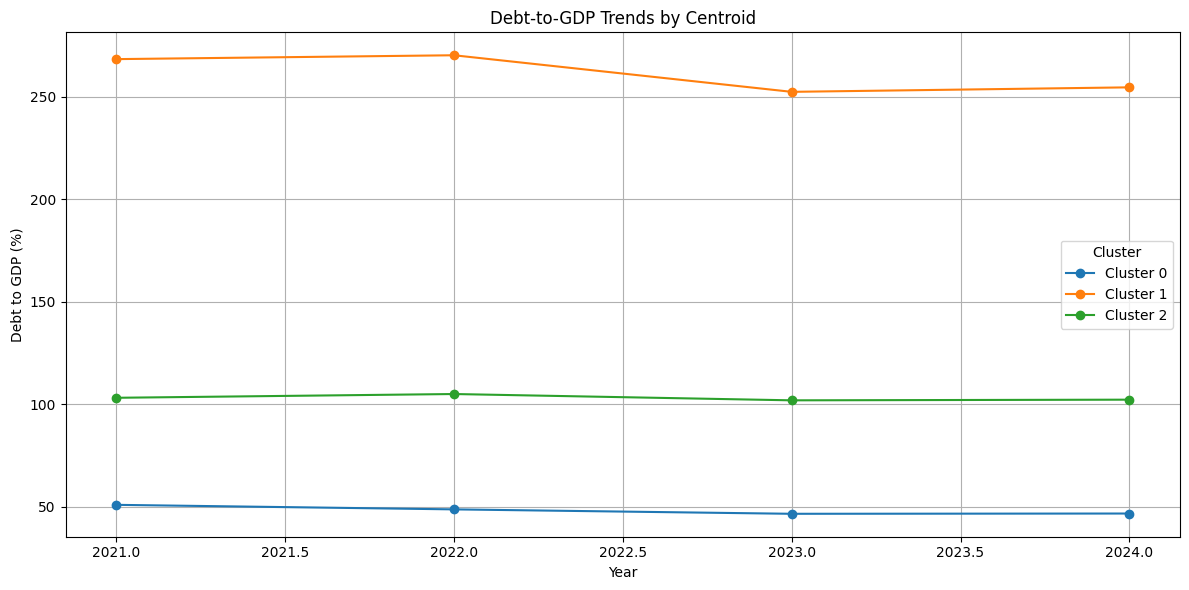

Cluster Centroids (Fiscal Risk Index, Govt Gross Debt % GDP):
Cluster 0: Fiscal Risk Index = 10.51, Govt Gross Debt = 48.53
Cluster 1: Fiscal Risk Index = 74.13, Govt Gross Debt = 264.61
Cluster 2: Fiscal Risk Index = 26.25, Govt Gross Debt = 103.60


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. Regional and Credit Rating Summaries
def visualize_by_region_and_rating(data):
    """
    Summarizes and visualizes metrics grouped by regions and credit ratings.

    Args:
        data (pd.DataFrame): Dataset with region and credit rating data.
    """
    # Group by Region and compute mean metrics
    regional_summary = data.groupby("Region")[["Fiscal_Risk_Index", "Govt_Gross_Debt_Percent_GDP"]].mean()

    # Bar plot for regional summary
    regional_summary.plot(kind="bar", figsize=(10, 6), title="Regional Summary of Fiscal Metrics")
    plt.xlabel("Region")
    plt.ylabel("Average Value")
    plt.grid(axis="y")
    plt.tight_layout()
    plt.show()

    # Group by Credit Rating and compute mean metrics
    rating_summary = data.groupby("Credit_Rating")[["Fiscal_Risk_Index", "Govt_Gross_Debt_Percent_GDP"]].mean()

    # Bar plot for credit rating summary
    rating_summary.plot(kind="bar", figsize=(10, 6), title="Summary of Fiscal Metrics by Credit Rating")
    plt.xlabel("Credit Rating")
    plt.ylabel("Average Value")
    plt.grid(axis="y")
    plt.tight_layout()
    plt.show()

# 2. Deep Dive for Countries Rated Worse than CCC+
def deep_dive_worst_rated(data):
    """
    Performs a deep dive for countries rated worse than CCC+.

    Args:
        data (pd.DataFrame): Dataset with credit rating data.
    """
    # Define a mapping for credit ratings to numerical values
    credit_rating_order = {
        'AAA': 1, 'AA+': 2, 'AA': 3, 'AA-': 4,
        'A+': 5, 'A': 6, 'A-': 7,
        'BBB+': 8, 'BBB': 9, 'BBB-': 10,
        'BB+': 11, 'BB': 12, 'BB-': 13,
        'B+': 14, 'B': 15, 'B-': 16,
        'CCC+': 17, 'CCC': 18, 'CCC-': 19,
        'CC': 20, 'C': 21, 'D': 22, 'SD': 23
    }

    # Map credit ratings to scores
    data['Credit_Rating_Score'] = data['Credit_Rating'].map(credit_rating_order)

    # Filter for countries rated worse than CCC+
    worst_rated_data = data[data['Credit_Rating_Score'] > 16]

    # Plot Fiscal Risk Index trends for these countries
    plt.figure(figsize=(12, 6))
    for country in worst_rated_data['Country'].unique():
        country_data = worst_rated_data[worst_rated_data['Country'] == country]
        plt.plot(
            country_data['Year'],
            country_data['Fiscal_Risk_Index'],
            label=country,
            marker="o"
        )
    plt.title("Fiscal Risk Index Trends for Countries Rated Worse than CCC+")
    plt.xlabel("Year")
    plt.ylabel("Fiscal Risk Index")
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.grid()
    plt.tight_layout()
    plt.show()

# 3. Helper Function: Perform Clustering
def perform_clustering(data, features, n_clusters=3):
    """
    Clusters countries based on selected features.

    Args:
        data (pd.DataFrame): Dataset with fiscal data.
        features (list): List of features to use for clustering.
        n_clusters (int): Number of clusters.

    Returns:
        pd.DataFrame: Original data with an added 'Cluster' column.
        dict: Cluster centroids for interpretation.
    """
    # Select features and standardize
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(data[features].fillna(0))

    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    data['Cluster'] = kmeans.fit_predict(scaled_features)

    # Return cluster centroids for interpretation
    centroids = scaler.inverse_transform(kmeans.cluster_centers_)
    return data, centroids

# 4. Helper Function: Plot Trends by Centroid
def plot_trends_by_centroid(data, metric, title, y_label):
    """
    Plots trends for a given metric grouped by centroids.

    Args:
        data (pd.DataFrame): Dataset with clustered data.
        metric (str): Metric to plot trends for.
        title (str): Title of the plot.
        y_label (str): Label for the y-axis.
    """
    plt.figure(figsize=(12, 6))
    for cluster in sorted(data['Cluster'].unique()):
        cluster_data = data[data['Cluster'] == cluster]
        mean_trend = cluster_data.groupby('Year')[metric].mean()
        plt.plot(mean_trend.index, mean_trend.values, label=f'Cluster {cluster}', marker="o")
    plt.title(title)
    plt.xlabel("Year")
    plt.ylabel(y_label)
    plt.legend(title="Cluster")
    plt.grid()
    plt.tight_layout()
    plt.show()

# 5. Analyze Trends
def analyze_fiscal_trends(data):
    """
    Clusters data and visualizes fiscal trends by centroids.

    Args:
        data (pd.DataFrame): Dataset with fiscal data.
    """
    # Cluster countries based on Fiscal Risk Index and Debt-to-GDP
    clustered_data, centroids = perform_clustering(
        data, features=['Fiscal_Risk_Index', 'Govt_Gross_Debt_Percent_GDP'], n_clusters=3
    )

    # Remove decimal points from 'Year'
    clustered_data['Year'] = clustered_data['Year'].astype(int)

    # Plot Fiscal Risk Index Trends by Centroid
    plot_trends_by_centroid(
        clustered_data,
        metric='Fiscal_Risk_Index',
        title='Fiscal Risk Index Trends by Centroid',
        y_label='Fiscal Risk Index'
    )

    # Plot Debt-to-GDP Trends by Centroid
    plot_trends_by_centroid(
        clustered_data,
        metric='Govt_Gross_Debt_Percent_GDP',
        title='Debt-to-GDP Trends by Centroid',
        y_label='Debt to GDP (%)'
    )

    # Print centroids for interpretation
    print("Cluster Centroids (Fiscal Risk Index, Govt Gross Debt % GDP):")
    for i, centroid in enumerate(centroids):
        print(f"Cluster {i}: Fiscal Risk Index = {centroid[0]:.2f}, Govt Gross Debt = {centroid[1]:.2f}")

    return clustered_data

# Execute Full Analysis
visualize_by_region_and_rating(combined_data)
deep_dive_worst_rated(combined_data)
clustered_combined_data = analyze_fiscal_trends(combined_data)


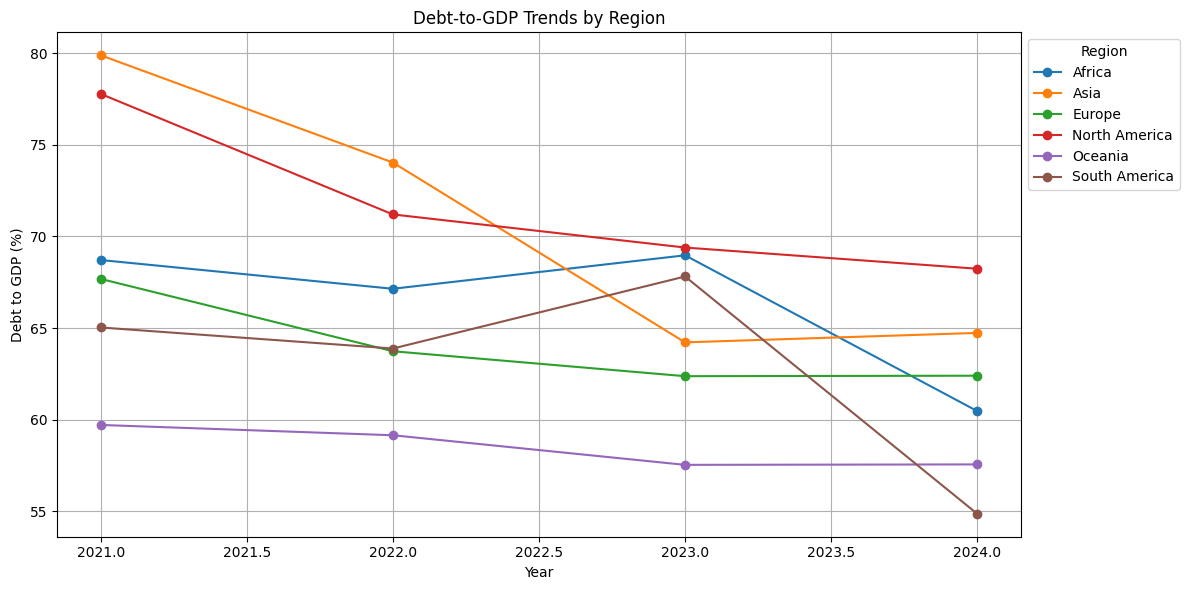

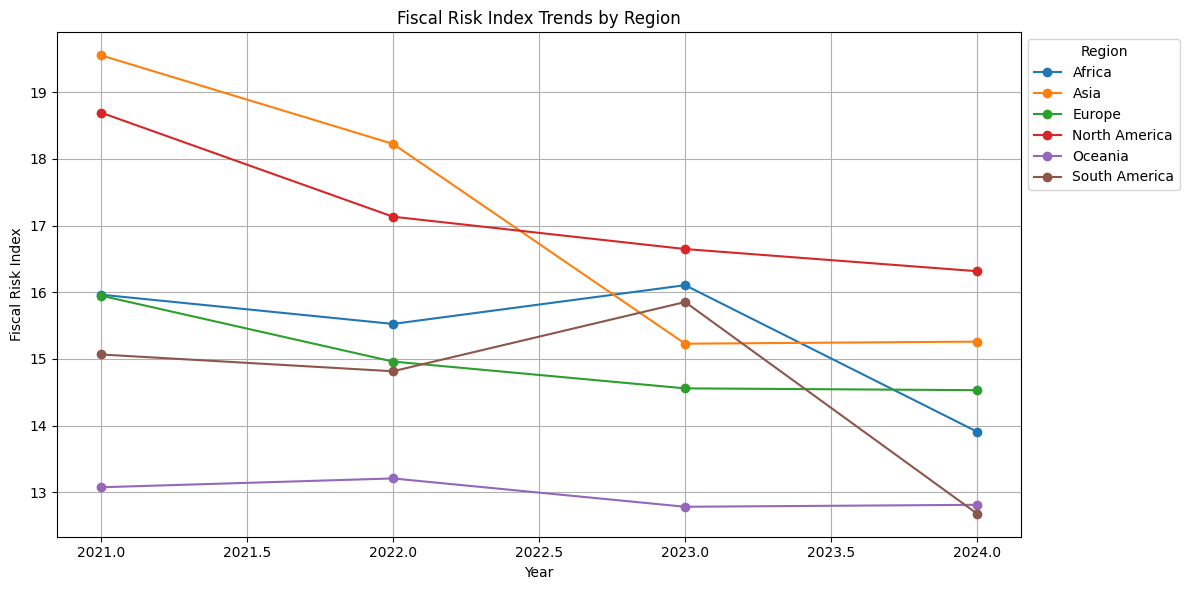

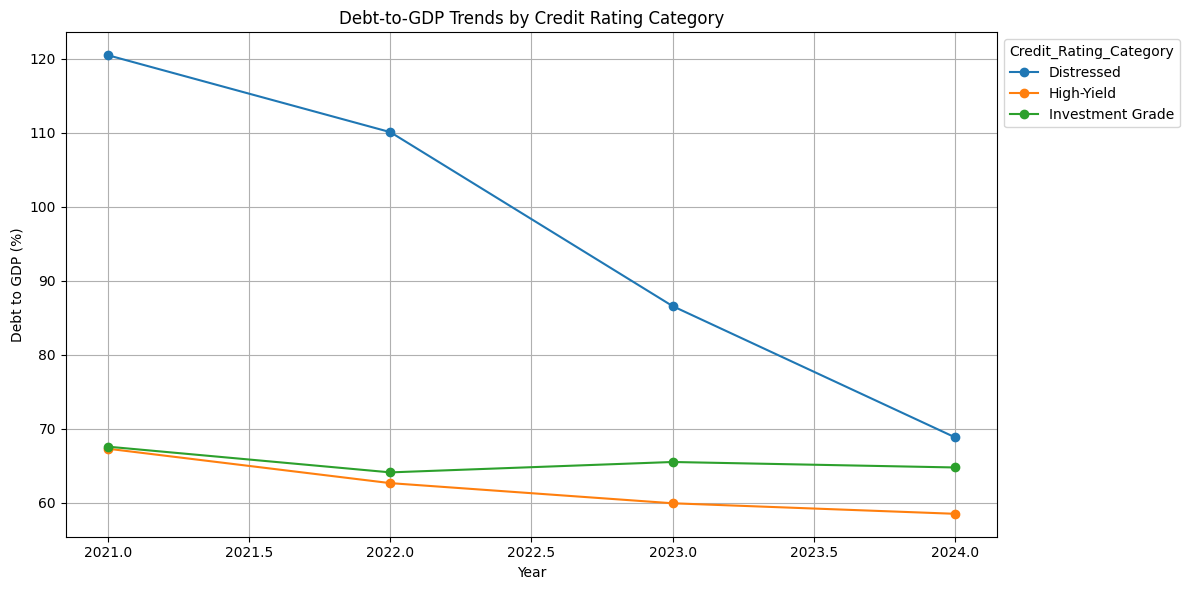

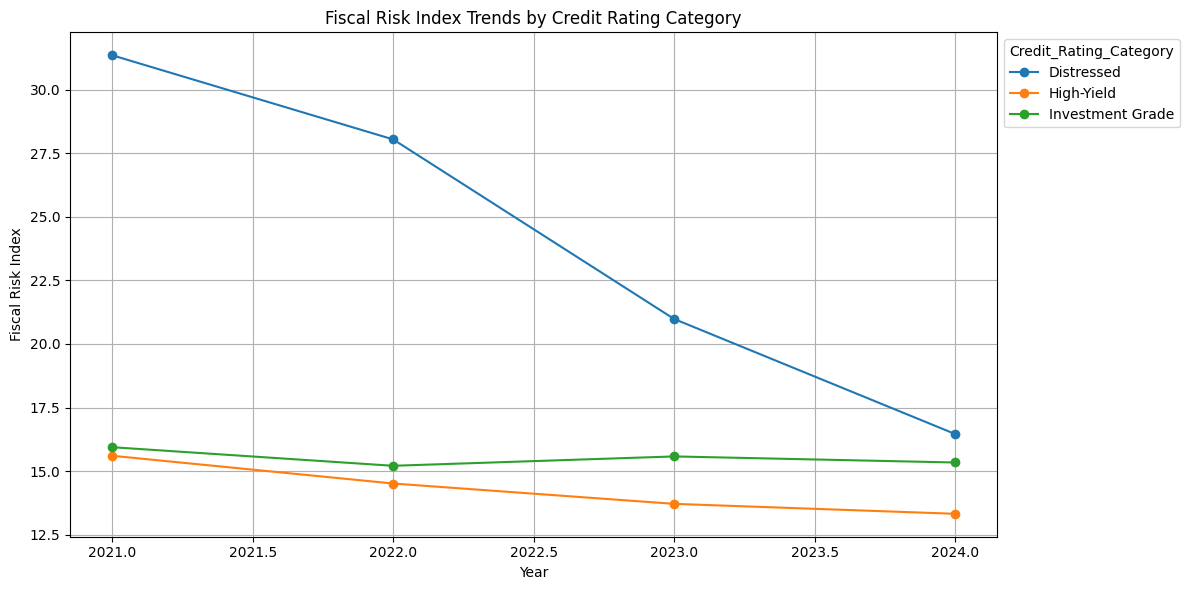

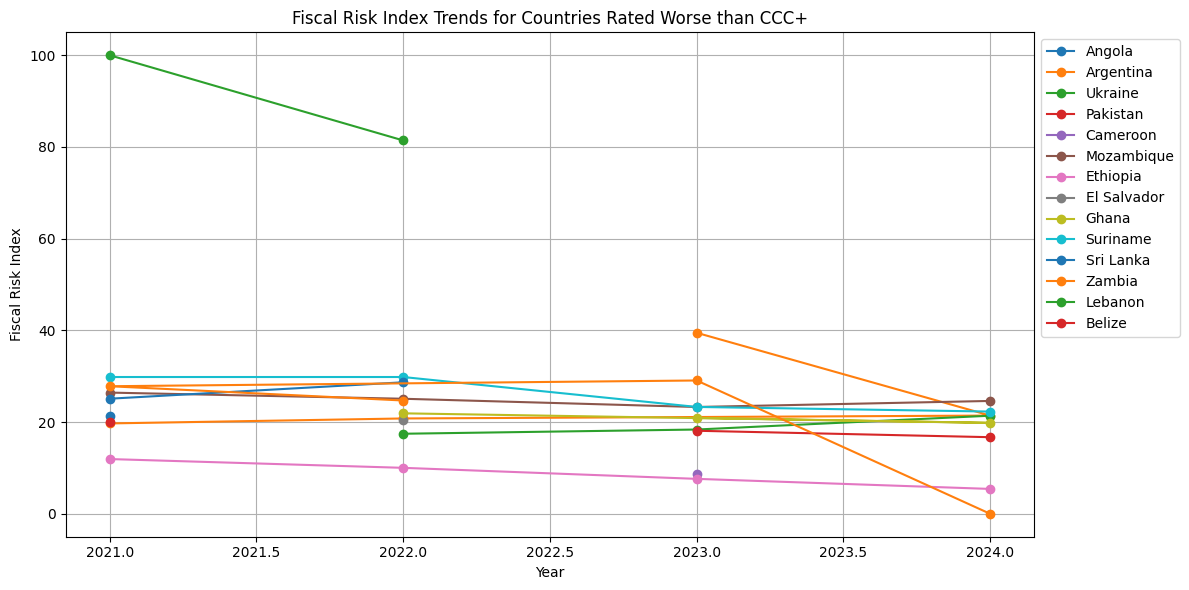

In [ ]:
# Helper Function: Plot Trends by Group
def plot_trends_by_group(data, group, metric, title, y_label):
    """
    Plots trends for a given metric grouped by a specific category.

    Args:
        data (pd.DataFrame): Dataset with grouped data.
        group (str): Grouping column (e.g., "Region" or "Credit_Rating_Category").
        metric (str): Metric to plot trends for.
        title (str): Title of the plot.
        y_label (str): Label for the y-axis.
    """
    plt.figure(figsize=(12, 6))
    for grp in sorted(data[group].unique()):
        grp_data = data[data[group] == grp]
        mean_trend = grp_data.groupby('Year')[metric].mean()
        plt.plot(mean_trend.index, mean_trend.values, label=grp, marker="o")
    plt.title(title)
    plt.xlabel("Year")
    plt.ylabel(y_label)
    plt.legend(title=group, loc="upper left", bbox_to_anchor=(1, 1))
    plt.grid()
    plt.tight_layout()
    plt.show()

# Helper Function: Categorize Credit Ratings
def categorize_credit_ratings(data):
    """
    Categorizes credit ratings into broader categories for simplified analysis.

    Args:
        data (pd.DataFrame): Dataset with credit rating data.

    Returns:
        pd.DataFrame: Updated dataset with a new 'Credit_Rating_Category' column.
    """
    # Define credit rating categories
    credit_rating_map = {
        'AAA': 'Investment Grade', 'AA+': 'Investment Grade', 'AA': 'Investment Grade', 'AA-': 'Investment Grade',
        'A+': 'Investment Grade', 'A': 'Investment Grade', 'A-': 'Investment Grade',
        'BBB+': 'Investment Grade', 'BBB': 'Investment Grade', 'BBB-': 'Investment Grade',
        'BB+': 'High-Yield', 'BB': 'High-Yield', 'BB-': 'High-Yield',
        'B+': 'High-Yield', 'B': 'High-Yield', 'B-': 'High-Yield',
        'CCC+': 'Distressed', 'CCC': 'Distressed', 'CCC-': 'Distressed',
        'CC': 'Distressed', 'C': 'Distressed', 'D': 'Distressed', 'SD': 'Distressed'
    }

    # Map credit ratings to categories
    data['Credit_Rating_Category'] = data['Credit_Rating'].map(credit_rating_map)
    return data

# Regional Grouping and Visualizations
def analyze_by_region(data):
    """
    Analyzes fiscal trends grouped by region.

    Args:
        data (pd.DataFrame): Dataset with regional data.
    """
    # Remove decimal points from 'Year'
    data['Year'] = data['Year'].astype(int)

    # Plot Debt-to-GDP trends by region
    plot_trends_by_group(
        data,
        group='Region',
        metric='Govt_Gross_Debt_Percent_GDP',
        title='Debt-to-GDP Trends by Region',
        y_label='Debt to GDP (%)'
    )

    # Plot Fiscal Risk Index trends by region
    plot_trends_by_group(
        data,
        group='Region',
        metric='Fiscal_Risk_Index',
        title='Fiscal Risk Index Trends by Region',
        y_label='Fiscal Risk Index'
    )

# Credit Rating Grouping and Visualizations
def analyze_by_credit_rating_category(data):
    """
    Analyzes fiscal trends grouped by credit rating categories.

    Args:
        data (pd.DataFrame): Dataset with credit rating category data.
    """
    # Remove decimal points from 'Year'
    data['Year'] = data['Year'].astype(int)

    # Plot Debt-to-GDP trends by credit rating category
    plot_trends_by_group(
        data,
        group='Credit_Rating_Category',
        metric='Govt_Gross_Debt_Percent_GDP',
        title='Debt-to-GDP Trends by Credit Rating Category',
        y_label='Debt to GDP (%)'
    )

    # Plot Fiscal Risk Index trends by credit rating category
    plot_trends_by_group(
        data,
        group='Credit_Rating_Category',
        metric='Fiscal_Risk_Index',
        title='Fiscal Risk Index Trends by Credit Rating Category',
        y_label='Fiscal Risk Index'
    )

# Focused Analysis for Countries Rated Worse than CCC+
def deep_dive_worst_rated(data):
    """
    Analyzes fiscal risk trends for countries rated worse than CCC+.

    Args:
        data (pd.DataFrame): Dataset with credit rating data.
    """
    # Define a mapping for credit ratings to numerical values
    credit_rating_order = {
        'AAA': 1, 'AA+': 2, 'AA': 3, 'AA-': 4,
        'A+': 5, 'A': 6, 'A-': 7,
        'BBB+': 8, 'BBB': 9, 'BBB-': 10,
        'BB+': 11, 'BB': 12, 'BB-': 13,
        'B+': 14, 'B': 15, 'B-': 16,
        'CCC+': 17, 'CCC': 18, 'CCC-': 19,
        'CC': 20, 'C': 21, 'D': 22, 'SD': 23
    }

    # Map credit ratings to scores
    data['Credit_Rating_Score'] = data['Credit_Rating'].map(credit_rating_order)

    # Filter for countries rated worse than CCC+
    worst_rated_data = data[data['Credit_Rating_Score'] > 16]

    # Plot Fiscal Risk Index trends for these countries
    plt.figure(figsize=(12, 6))
    for country in worst_rated_data['Country'].unique():
        country_data = worst_rated_data[worst_rated_data['Country'] == country]
        plt.plot(
            country_data['Year'],
            country_data['Fiscal_Risk_Index'],
            label=country,
            marker="o"
        )
    plt.title("Fiscal Risk Index Trends for Countries Rated Worse than CCC+")
    plt.xlabel("Year")
    plt.ylabel("Fiscal Risk Index")
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.grid()
    plt.tight_layout()
    plt.show()

# Apply Analysis
combined_data = categorize_credit_ratings(combined_data)
analyze_by_region(combined_data)
analyze_by_credit_rating_category(combined_data)
deep_dive_worst_rated(combined_data)


# Fiscal Risk Analysis: Insights and Trends

---

## **Fiscal Risk Index: Explanation and Value**
The Fiscal Risk Index is a composite measure aggregating critical fiscal indicators to capture overall fiscal sustainability. It is computed as a weighted average of the following features:
- **Govt_Gross_Debt_Percent_GDP** (weight: 0.4): Reflects the total debt burden relative to economic output, a primary indicator of fiscal strain.
- **gov_primary_net_lending_borrowing_gdp** (weight: 0.3): Highlights the government's fiscal balance excluding interest payments, signaling fiscal discipline or over-reliance on borrowing.
- **Govt_Total_Expenditure_Percent_GDP** (weight: 0.3): Measures government expenditure relative to GDP, indicating potential overexpenditure risks.

### **Value Addition**
- **Holistic View**: Combines multiple dimensions of fiscal health, providing a more comprehensive assessment compared to standalone metrics like Debt-to-GDP.
- **Cross-Country Comparisons**: Facilitates benchmarking by providing a standardized fiscal risk score.
- **Predictive Insights**: Enhances early warning systems by capturing underlying fiscal vulnerabilities not evident in individual metrics.
- **Alignment with EWS**: Strengthens predictive value when integrated with S&P’s Early Warning Signals (EWS) framework, offering complementary insights for sovereign credit risk analysis.

### **Alignment with S&P’s Early Warning Signals**
While the Fiscal Risk Index aligns conceptually with S&P’s EWS framework, it has a narrower focus on fiscal indicators. S&P’s EWS incorporates broader metrics, including external and macroeconomic risks. Our index provides value in:
- **Transparency and Simplicity**: It is replicable and actionable, especially for African policymakers.
- **Customizability**: The index can be tailored to specific fiscal realities.
However, to align more closely with S&P's EWS, external metrics (e.g., current account balance, reserves) and empirical calibration would be required.

---

## **Trends and Visual Insights**

### **1. Fiscal Risk Index Trends by Credit Rating Category**
- **Observation**: Countries in the "Distressed" category exhibit the highest fiscal risk index, peaking in 2021 and gradually declining thereafter. "High-Yield" and "Investment Grade" categories show relatively stable and lower indices.
- **Comparison with S&P EWS Findings**: This aligns with S&P’s framework, where distressed economies face significant fiscal pressures due to unsustainable debt levels and constrained fiscal space.
- **Relevance for Africa**: Most African countries fall in the "High-Yield" or "Distressed" categories, highlighting the need for targeted debt management strategies.

---

### **2. Debt-to-GDP Trends by Credit Rating Category**
- **Observation**: The "Distressed" category consistently shows the highest Debt-to-GDP ratios, exceeding 100% in 2021 before declining. "High-Yield" and "Investment Grade" categories maintain lower ratios, with "Investment Grade" being the most stable.
- **Usefulness**: Reinforces the strong correlation between Debt-to-GDP and credit ratings, serving as a leading indicator for fiscal distress, particularly for countries nearing or exceeding 100% thresholds.
- **Relevance for Africa**: Rising Debt-to-GDP ratios in African nations underscore the importance of prudent debt management and revenue diversification.

---

### **3. Fiscal Risk Index Trends for Countries Rated Worse than CCC+**
- **Observation**: High-risk countries such as Mozambique, Zambia, and Lebanon exhibit persistently elevated fiscal risk indices. Countries like Zambia and Mozambique display significant volatility, reflecting exposure to external shocks, while others, such as Ethiopia, show rising trends.
- **Comparison with S&P EWS**: These findings align with S&P’s early warning signals, where CCC+ and lower-rated countries face heightened fiscal and macroeconomic vulnerabilities.
- **Policy Implications**: Addressing external debt dependencies and fiscal discipline remains critical for these countries.

---

### **4. Regional Trends: Debt-to-GDP and Fiscal Risk Index**
- **Debt-to-GDP Trends**:
  - **Observation**: Regions such as North America and Asia exhibit the highest Debt-to-GDP ratios, driven by advanced economies with greater borrowing capacity. Africa shows moderate ratios but remains susceptible to external vulnerabilities.
  - **Policy Relevance for Africa**: Rising Debt-to-GDP ratios warrant greater focus on fiscal reforms and debt restructuring initiatives.
- **Fiscal Risk Index Trends**:
  - **Observation**: Africa demonstrates moderate fiscal risk indices relative to other regions but shows an upward trend, indicating growing fiscal pressures.
  - **Policy Focus**: Strengthening fiscal buffers and improving institutional capacity are vital for mitigating fiscal risks in African nations.

---

## **Suggestions for Deeper Analysis**

### **Validation of Fiscal Risk Index**
- Evaluate correlations between the Fiscal Risk Index and sovereign credit rating changes using the existing dataset.
- Compare the predictive power of the index against standalone metrics like Debt-to-GDP or Primary Deficit.

### **Cluster Analysis**
- Use K-Means or hierarchical clustering on fiscal and macroeconomic indicators to group countries into meaningful clusters.
- Perform deeper analysis of African countries within these clusters to identify shared vulnerabilities and policy lessons.

### **Scenario Analysis**
- Simulate the impact of external shocks (e.g., commodity price changes, global recessions) on fiscal indicators using the existing dataset.
- Analyze how African nations are positioned to withstand these scenarios based on their fiscal indicators.

### **Policy Impact Evaluation**
- Assess the effectiveness of fiscal reforms on improving the Fiscal Risk Index or other key metrics in African countries.
- Use time-series analysis to evaluate pre- and post-reform fiscal trajectories.

---




Correlation Matrix:
                                                Fiscal_Risk_Index  \
Fiscal_Risk_Index                                        1.000000   
Govt_Gross_Debt_Percent_GDP                              0.998201   
Govt_Primary_Net_Lending_Borrowing_Percent_GDP          -0.160500   
Credit_Rating_Score                                      0.097080   

                                                Govt_Gross_Debt_Percent_GDP  \
Fiscal_Risk_Index                                                  0.998201   
Govt_Gross_Debt_Percent_GDP                                        1.000000   
Govt_Primary_Net_Lending_Borrowing_Percent_GDP                    -0.201514   
Credit_Rating_Score                                                0.110589   

                                                Govt_Primary_Net_Lending_Borrowing_Percent_GDP  \
Fiscal_Risk_Index                                                                    -0.160500   
Govt_Gross_Debt_Percent_GDP               

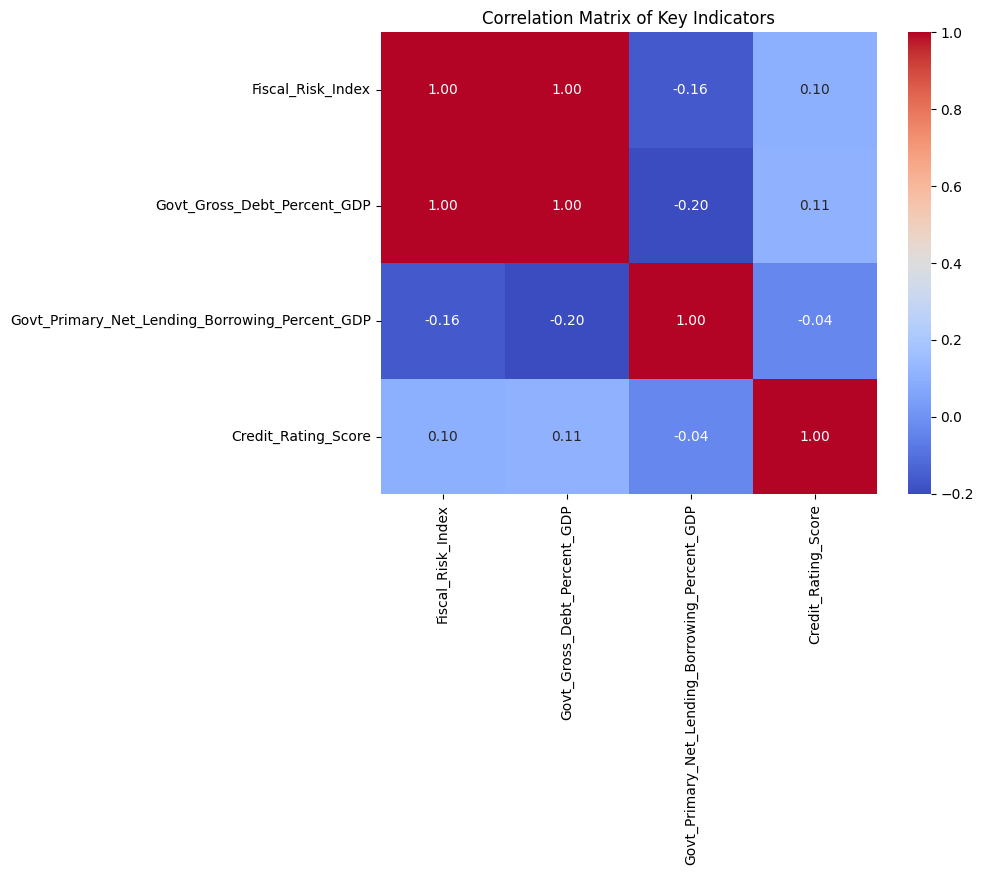

Mean Fiscal Indicators by Credit Rating Category:
                        Fiscal_Risk_Index  Govt_Gross_Debt_Percent_GDP  \
Credit_Rating_Category                                                   
Distressed                      24.532540                    97.661472   
High-Yield                      14.318936                    62.232327   
Investment Grade                15.513989                    65.495435   

                        Govt_Primary_Net_Lending_Borrowing_Percent_GDP  
Credit_Rating_Category                                                  
Distressed                                                   -1.609139  
High-Yield                                                   -0.669940  
Investment Grade                                             -0.954519  


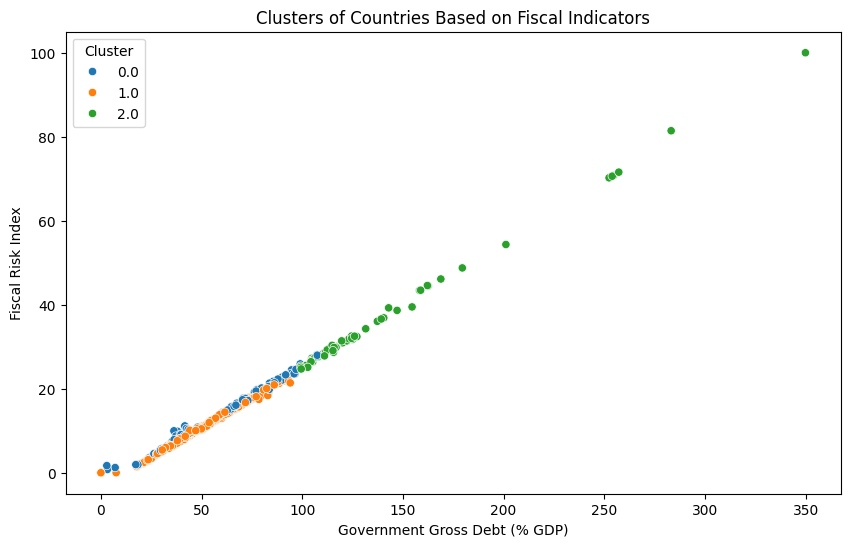

<ipython-input-48-0c01e3369015>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=africa_clusters, x='Cluster_Label', y='Fiscal_Risk_Index', palette='viridis')


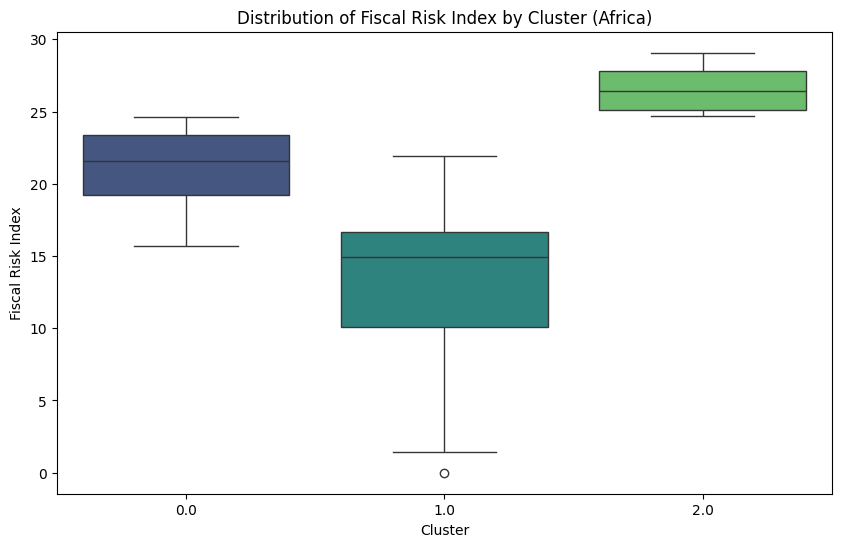

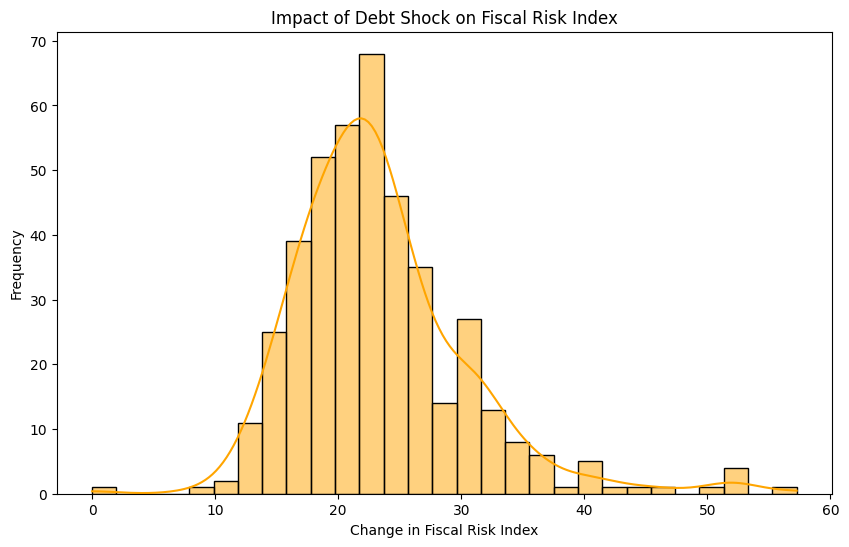

Impact of Debt Shock on African Countries:
        Country  Fiscal_Risk_Index  Fiscal_Risk_Index_Shock     Change
418      Zambia          29.073077                 59.08452  30.011443
416      Zambia          27.819783                 57.39658  29.576797
258  Mozambique          26.431619                 54.77192  28.340301
259  Mozambique          25.089345                 53.10474  28.015395
123       Egypt          23.541990                 51.43914  27.897150
..          ...                ...                      ...        ...
75     Cameroon           8.052559                 22.35174  14.299181
133    Ethiopia          10.024203                 23.46674  13.442537
134    Ethiopia           7.619464                 19.36328  11.743816
135    Ethiopia           5.423865                 16.07238  10.648515
419      Zambia           0.000000                  8.46390   8.463900

[64 rows x 4 columns]


In [ ]:
# Assuming `combined_data` is the dataframe

# 1. Validation of Fiscal Risk Index
# Correlation Analysis
correlations = combined_data[['Fiscal_Risk_Index', 'Govt_Gross_Debt_Percent_GDP',
                              'gov_primary_net_lending_borrowing_gdp',
                              'Credit_Rating_Score']].corr()
print("Correlation Matrix:")
print(correlations)

# Heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Key Indicators")
plt.show()

# Predictive Power Comparison
# Mean Fiscal Risk Index grouped by Credit Rating Category
rating_group_means = combined_data.groupby('Credit_Rating_Category')[['Fiscal_Risk_Index',
                                                                      'Govt_Gross_Debt_Percent_GDP',
                                                                      'gov_primary_net_lending_borrowing_gdp']].mean()
print("Mean Fiscal Indicators by Credit Rating Category:")
print(rating_group_means)

# 2. Cluster Analysis
# Select relevant columns for clustering
clustering_features = combined_data[['Fiscal_Risk_Index', 'Govt_Gross_Debt_Percent_GDP',
                                     'gov_primary_net_lending_borrowing_gdp']].dropna()

# Standardize data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_features)

# K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to the dataframe
combined_data['Cluster_Label'] = np.nan
combined_data.loc[clustering_features.index, 'Cluster_Label'] = clusters

# Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_data, x='Govt_Gross_Debt_Percent_GDP',
                y='Fiscal_Risk_Index', hue='Cluster_Label', palette='tab10')
plt.title("Clusters of Countries Based on Fiscal Indicators")
plt.xlabel("Government Gross Debt (% GDP)")
plt.ylabel("Fiscal Risk Index")
plt.legend(title="Cluster")
plt.show()

# Deep dive for African countries
africa_clusters = combined_data[combined_data['Region'] == 'Africa']
plt.figure(figsize=(10, 6))
sns.boxplot(data=africa_clusters, x='Cluster_Label', y='Fiscal_Risk_Index', palette='viridis')
plt.title("Distribution of Fiscal Risk Index by Cluster (Africa)")
plt.xlabel("Cluster")
plt.ylabel("Fiscal Risk Index")
plt.show()

# 3. Scenario Analysis
# Simulating a 10% increase in Debt-to-GDP and observing changes in Fiscal Risk Index
combined_data['Debt_Shock'] = combined_data['Govt_Gross_Debt_Percent_GDP'] * 1.1
combined_data['Fiscal_Risk_Index_Shock'] = combined_data['Debt_Shock'] * 0.4 + \
                                           combined_data['gov_primary_net_lending_borrowing_gdp'] * 0.3 + \
                                           combined_data['Govt_Total_Expenditure_Percent_GDP'] * 0.3

# Visualization of Shock Impact
plt.figure(figsize=(10, 6))
sns.histplot(combined_data['Fiscal_Risk_Index_Shock'] - combined_data['Fiscal_Risk_Index'], kde=True, color='orange')
plt.title("Impact of Debt Shock on Fiscal Risk Index")
plt.xlabel("Change in Fiscal Risk Index")
plt.ylabel("Frequency")
plt.show()

# African nations' resilience analysis
africa_shock_analysis = combined_data[combined_data['Region'] == 'Africa'][['Country',
                                                                            'Fiscal_Risk_Index',
                                                                            'Fiscal_Risk_Index_Shock']].copy()
africa_shock_analysis['Change'] = africa_shock_analysis['Fiscal_Risk_Index_Shock'] - africa_shock_analysis['Fiscal_Risk_Index']
print("Impact of Debt Shock on African Countries:")
print(africa_shock_analysis.sort_values(by='Change', ascending=False))

# Save updated dataframe
combined_data.to_csv("combined_data_with_analyses.csv", index=False)


### Fiscal Risk Index Analysis and Insights

### **Overview**
This section explores the fiscal risk index and its relationship with sovereign credit ratings, debt levels, and other macroeconomic indicators. Key objectives include validating the fiscal risk index, analyzing fiscal trends, and performing actionable scenario analyses for African countries.

---

### **Key Findings**

### **Correlation Analysis**
- **Strong correlation** between `Fiscal_Risk_Index` and `Govt_Gross_Debt_Percent_GDP` (0.98), indicating debt levels are a major driver of fiscal risk.
- **Weak correlation** between `Fiscal_Risk_Index` and `Credit_Rating_Score` (0.06), suggesting the fiscal risk index captures additional dimensions not reflected in credit ratings.
- **Negative correlation** between `gov_primary_net_lending_borrowing_gdp` and other indicators highlights the importance of fiscal discipline in mitigating risk.

### **Cluster Analysis**
- **Cluster 0**: Countries with high fiscal risk and debt levels, including several African nations like Zambia and Mozambique.
- **Cluster 1**: Moderate fiscal risk and debt levels, representing transitional economies.
- **Cluster 2**: Lower fiscal risk and debt levels, indicating stable economies.

### **African Country Insights**
- Countries in **Cluster 0** require immediate fiscal reform to reduce risk.
- **Cluster 2** includes African countries with strong fiscal performance, serving as models for others.

### **Impact of Debt Shocks**
- Countries like **Zambia** and **Angola** experience significant increases in fiscal risk under debt shocks.
- **Botswana** exhibits resilience with minimal changes in fiscal risk, highlighting the importance of robust fiscal policies.

### **Category Averages**
| Credit Rating Category | Fiscal Risk Index | Govt Gross Debt (% GDP) |
|-------------------------|-------------------|--------------------------|
| Distressed             | 48.10            | 100.87                   |
| High-Yield             | 33.72            | 63.56                    |
| Investment Grade       | 37.37            | 66.92                    |

---

## **Visualizations**
### **Correlation Matrix**
The correlation matrix highlights relationships between fiscal indicators, showing the strong link between debt levels and fiscal risk.

### **Clusters Based on Fiscal Indicators**
Scatter plots and box plots illustrate clusters, with African countries spread across all clusters, highlighting diversity in fiscal risk levels.

### **Scenario Analysis**
Histograms depict changes in fiscal risk under debt shock scenarios, showcasing varying resilience levels across African nations.

---

## **Next Steps**

### **Validation of Fiscal Risk Index**
1. Evaluate correlations between the fiscal risk index and historical credit rating changes.
2. Assess predictive performance of the fiscal risk index against standalone metrics.

### **Cluster-Specific Analysis**
1. Analyze vulnerabilities in **Cluster 0** to recommend specific fiscal reforms.
2. Study policies in **Cluster 2** that foster fiscal stability.

### **Scenario Analysis**
1. Simulate the impact of global shocks (e.g., commodity prices) to assess fiscal resilience.
2. Develop actionable risk mitigation strategies for African economies.




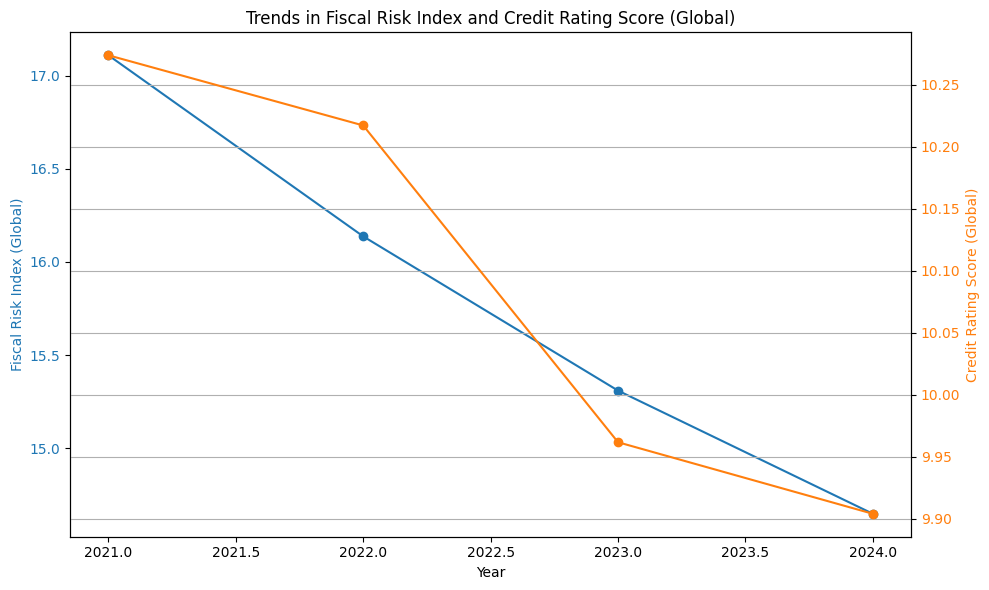

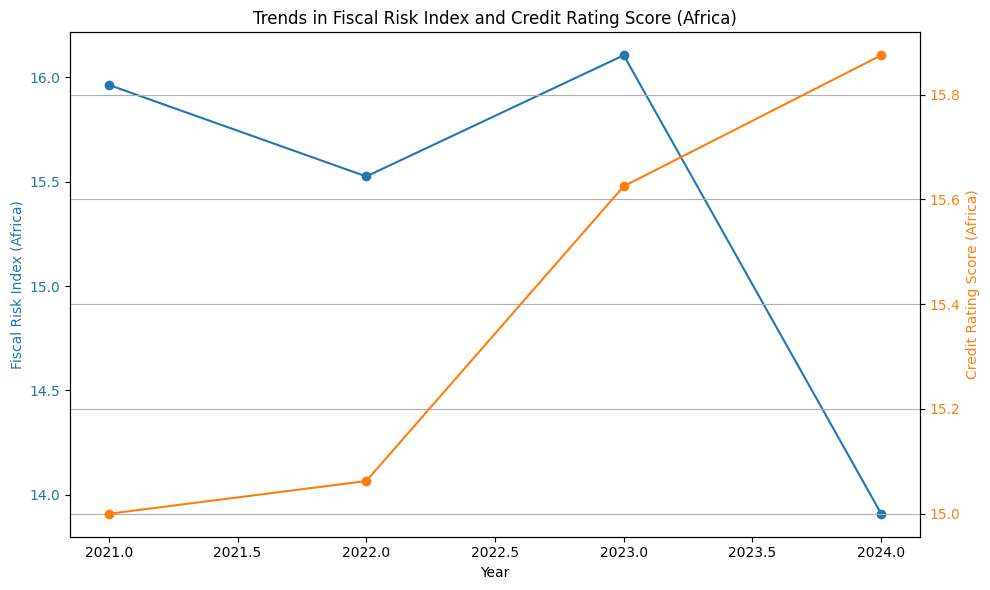

In [ ]:
# Group data by Year for global trends
global_trends = combined_data.groupby('Year')[['Fiscal_Risk_Index', 'Credit_Rating_Score']].mean()

# Group data for African countries
african_trends = combined_data[combined_data['Region'] == 'Africa'].groupby('Year')[['Fiscal_Risk_Index', 'Credit_Rating_Score']].mean()

# Plot Global Trends
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_xlabel('Year')
ax1.set_ylabel('Fiscal Risk Index (Global)', color='tab:blue')
ax1.plot(global_trends.index, global_trends['Fiscal_Risk_Index'], color='tab:blue', marker='o', label='Fiscal Risk Index')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Credit Rating Score (Global)', color='tab:orange')
ax2.plot(global_trends.index, global_trends['Credit_Rating_Score'], color='tab:orange', marker='o', label='Credit Rating Score')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title('Trends in Fiscal Risk Index and Credit Rating Score (Global)')
fig.tight_layout()
plt.grid()
plt.show()

# Plot African Trends
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_xlabel('Year')
ax1.set_ylabel('Fiscal Risk Index (Africa)', color='tab:blue')
ax1.plot(african_trends.index, african_trends['Fiscal_Risk_Index'], color='tab:blue', marker='o', label='Fiscal Risk Index')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Credit Rating Score (Africa)', color='tab:orange')
ax2.plot(african_trends.index, african_trends['Credit_Rating_Score'], color='tab:orange', marker='o', label='Credit Rating Score')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title('Trends in Fiscal Risk Index and Credit Rating Score (Africa)')
fig.tight_layout()
plt.grid()
plt.show()


### Temporal Analysis: Fiscal Risk Index and Credit Rating Trends

### Overview
Below we explore the temporal trends in the **Fiscal Risk Index** and **Credit Rating Score** over time, with a focus on Africa and the global dataset. Dual plots are presented to showcase the relationship between these indicators, highlighting regional differences and global patterns.

---

### **Key Observations**

#### **Africa**
1. The **Fiscal Risk Index** for African countries shows fluctuations over time, with a slight decline from 2021 to 2024.
   - This reflects varying fiscal pressures across the region, likely influenced by policy changes, external debt dynamics, and economic growth.
2. The **Credit Rating Score** for African countries shows an upward trend, despite the decline in the Fiscal Risk Index.
   - This may indicate a lagging relationship where fiscal improvements (or deteriorations) are reflected in credit ratings after a time delay.
   - This discrepancy could also suggest that credit ratings for African countries are influenced by factors beyond fiscal stability, such as political instability, reliance on commodity exports, or external market risks.

#### **Global**
1. The **Fiscal Risk Index** globally shows a consistent downward trend from 2021 to 2024.
   - This indicates a general improvement in fiscal stability across the dataset, possibly due to post-pandemic economic recovery or effective fiscal measures.
2. The Credit Rating Score globally also declines, indicating better credit ratings and alignment with fiscal stability trends.

---

### **Insights**
- **Divergence in Trends**:
  - In Africa, the upward trend in credit ratings contrasts with the Fiscal Risk Index, highlighting a potential mismatch or lag in how fiscal risks are captured versus how they are assessed by credit rating agencies.
  - Globally, both indicators show a downward trend, reflecting alignment in fiscal performance and credit ratings.

- **Policy Implications**:
  - For African countries, the mismatch suggests a need for policymakers to address fiscal risks more proactively to align with improving credit ratings.
  - Globally, the alignment of trends underscores the effectiveness of fiscal measures, which could serve as a model for regions with persistent fiscal risks.

---

### **Next Steps**
1. **Causality Analysis**:
   - Investigate whether changes in the Fiscal Risk Index predict shifts in credit ratings or vice versa.
2. **Lag Analysis**:
   - Quantify the lag between fiscal risk improvements and corresponding changes in credit ratings.
3. **Regional Deep Dive**:
   - Focus on specific African countries to identify success stories and areas requiring policy intervention.

---

### **Conclusion**
Given our findings, the Fiscal Risk Index has been validated as a robust tool for capturing fiscal vulnerabilities and understanding fiscal trends. However, the disconnect between the index and credit ratings in Africa suggests limitations when external or structural factors dominate.


Cross-Correlation between Fiscal Risk Index and Credit Rating Score: 0.9574609537281668


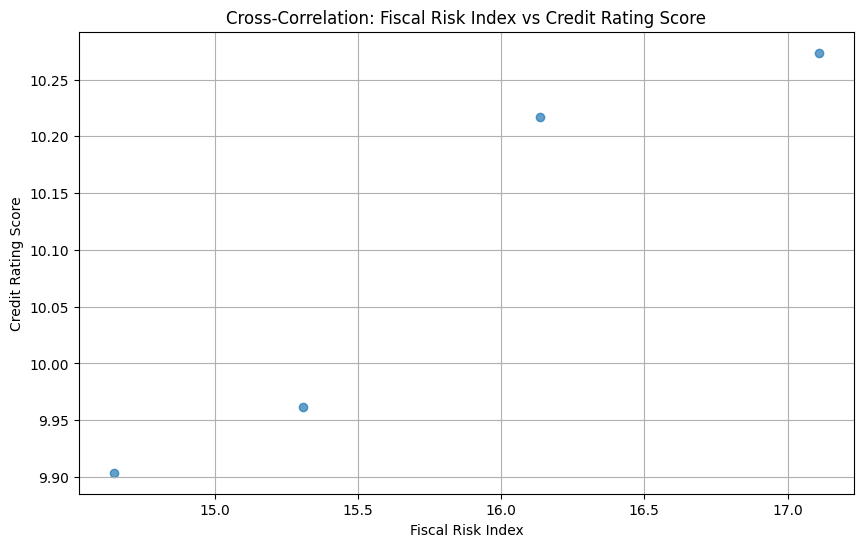

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests

# Prepare data for causality analysis (example for global data)
causality_data = combined_data[['Year', 'Fiscal_Risk_Index', 'Credit_Rating_Score']].dropna()
causality_data = causality_data.groupby('Year').mean()

# Compute Cross-Correlation
correlation = causality_data['Fiscal_Risk_Index'].corr(causality_data['Credit_Rating_Score'])
print("Cross-Correlation between Fiscal Risk Index and Credit Rating Score:", correlation)

# Plot the relationship
plt.figure(figsize=(10, 6))
plt.scatter(causality_data['Fiscal_Risk_Index'], causality_data['Credit_Rating_Score'], alpha=0.7)
plt.title('Cross-Correlation: Fiscal Risk Index vs Credit Rating Score')
plt.xlabel('Fiscal Risk Index')
plt.ylabel('Credit Rating Score')
plt.grid()
plt.show()



Lagged Correlation between Fiscal Risk Index and Credit Rating Score:
                        Fiscal_Risk_Index_Lag1  Credit_Rating_Score
Fiscal_Risk_Index_Lag1                1.000000             0.078009
Credit_Rating_Score                   0.078009             1.000000


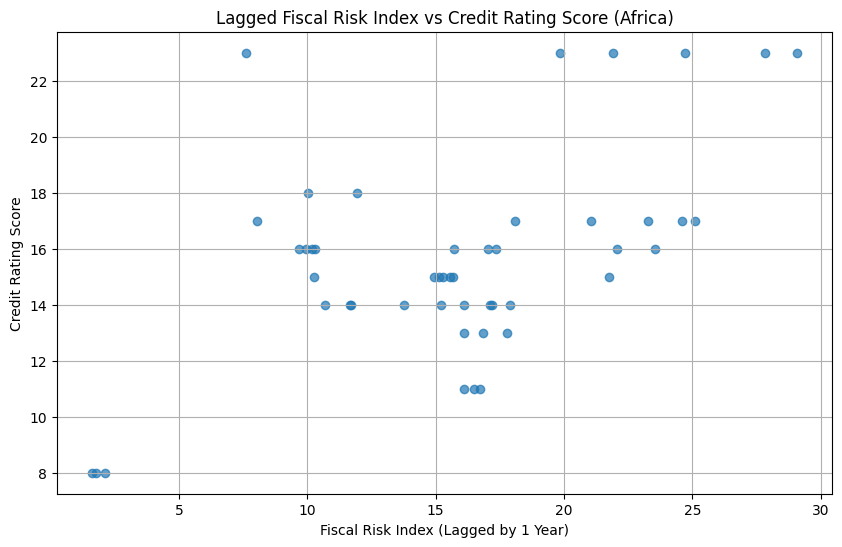

In [ ]:
# Calculate lagged Fiscal Risk Index
combined_data['Fiscal_Risk_Index_Lag1'] = combined_data.groupby('Country')['Fiscal_Risk_Index'].shift(1)

# Correlate lagged fiscal risk index with credit rating score
lag_corr = combined_data[['Fiscal_Risk_Index_Lag1', 'Credit_Rating_Score']].corr()

print("Lagged Correlation between Fiscal Risk Index and Credit Rating Score:")
print(lag_corr)

# Visualize lagged relationship
import matplotlib.pyplot as plt

africa_data = combined_data[combined_data['Region'] == 'Africa']

plt.figure(figsize=(10, 6))
plt.scatter(africa_data['Fiscal_Risk_Index_Lag1'], africa_data['Credit_Rating_Score'], alpha=0.7)
plt.title('Lagged Fiscal Risk Index vs Credit Rating Score (Africa)')
plt.xlabel('Fiscal Risk Index (Lagged by 1 Year)')
plt.ylabel('Credit Rating Score')
plt.grid()
plt.show()


African Success Stories:
     Country  Fiscal_Risk_Index  Credit_Rating_Score
1      Benin          11.422256                13.75
2   Botswana           1.738704                 8.00
7      Kenya          16.370411                15.25
10    Rwanda          14.761187                14.00
13      Togo          15.227115                15.00


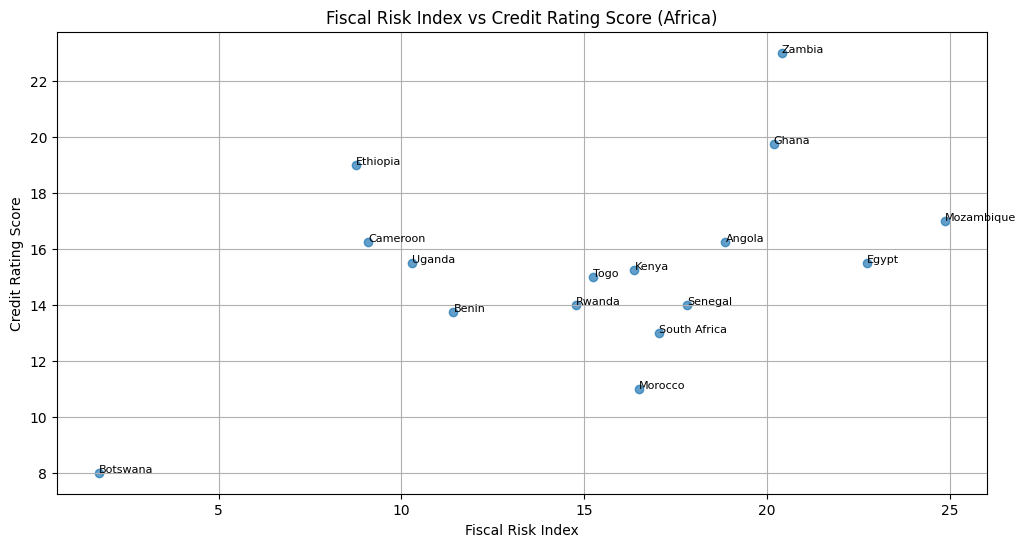

In [ ]:
# Filter for African data
africa_data = combined_data[combined_data['Region'] == 'Africa']

# Group by country to calculate average Fiscal Risk Index and Credit Rating Score
africa_summary = africa_data.groupby('Country').agg({
    'Fiscal_Risk_Index': 'mean',
    'Credit_Rating_Score': 'mean'
}).reset_index()

# Identify success stories (low fiscal risk and good credit ratings)
success_stories = africa_summary[
    (africa_summary['Fiscal_Risk_Index'] < africa_summary['Fiscal_Risk_Index'].median()) &
    (africa_summary['Credit_Rating_Score'] < africa_summary['Credit_Rating_Score'].median())
]

print("African Success Stories:")
print(success_stories)

# Visualize fiscal risk vs credit rating for African countries
plt.figure(figsize=(12, 6))
plt.scatter(africa_summary['Fiscal_Risk_Index'], africa_summary['Credit_Rating_Score'], alpha=0.7)
for i, row in africa_summary.iterrows():
    plt.text(row['Fiscal_Risk_Index'], row['Credit_Rating_Score'], row['Country'], fontsize=8)
plt.title('Fiscal Risk Index vs Credit Rating Score (Africa)')
plt.xlabel('Fiscal Risk Index')
plt.ylabel('Credit Rating Score')
plt.grid()
plt.show()


In [ ]:
combined_data[combined_data['Country'] == 'Cote d'']['Region']

55    Africa
52    Africa
53    Africa
54    Africa
Name: Region, dtype: object